### Pre-process email-Eu-core datasets  
Goal : make input files suitable for the algorithm.

In [1]:
import pandas as pd
import networkx as nx
import numpy as np  

import matplotlib.pyplot as plt
# import wget

In [2]:
%matplotlib notebook

In [3]:
def reciprocal_edges(G):
    N=G.number_of_nodes()
    nodes=list(G.nodes())
    edges=G.edges()
    unique_edges=[]
    reciprocal_list=[]
    for idxi in range(N):
        i=nodes[idxi]
        for idxj in range(idxi+1,N):
            j=nodes[idxj]
            if (i,j) in edges or (j,i) in edges: 
                unique_edges.append((i,j))
                if (i,j) in edges and (j,i) in edges: 
                    reciprocal_list.append((i,j))

    unique_edges = list(set(unique_edges))
    reciprocal = len(reciprocal_list)
 
    print("reciprocal:", reciprocal,len(unique_edges),"reciprocity:",reciprocal/float(len(unique_edges)),reciprocal/float(len(unique_edges)+reciprocal)) 
    return  unique_edges, reciprocal_list


In [4]:
def read_graph(df_adj, ego='source', alter='target', noselfloop=True,binary=False):
    """
        Create the graph by adding edges and nodes.
        It assumes that columns of layers are from l+2 (included) onwards.

        Return the list MultiDiGraph NetworkX objects.

        Parameters
        ----------
        df_adj : DataFrame
                 Pandas DataFrame object containing the edges of the graph.
        ego : str
              Name of the column to consider as source of the edge.
        alter : str
                Name of the column to consider as target of the edge.
        noselfloop : bool
                     If set to True, the algorithm removes the self-loops.

        Returns
        -------
        A : list
            List of MultiDiGraph NetworkX objects.
    """

    # build nodes
    egoID = df_adj[ego].unique()
    alterID = df_adj[alter].unique()
    nodes = list(set(egoID).union(set(alterID)))
    nodes.sort()

    L = df_adj.shape[1] - 2  # number of layers 
    # build the NetworkX graph: create a list of graphs, as many graphs as there are layers
    A = [nx.MultiDiGraph() for _ in range(L)] 
    # set the same set of nodes and order over all layers
    for l in range(L):
        A[l].add_nodes_from(nodes)

    for index, row in df_adj.iterrows():
        v1 = row[ego]
        v2 = row[alter]
        for l in range(L):
            if row[l + 2] > 0:
                if A[l].has_edge(v1, v2):
                    if binary == True:
                        A[l][v1][v2][0]['weight'] = max(int(row[l + 2]),1)
                    else:
                        A[l][v1][v2][0]['weight'] += int(row[l + 2])  # the edge already exists -> no parallel edge created 
                else:
                    if binary == True:
                        A[l].add_edge(v1, v2, weight=max(int(row[l + 2]),1))
                    else:
                        A[l].add_edge(v1, v2, weight=int(row[l + 2]))

    # remove self-loops
    if noselfloop:
        for l in range(L):
            A[l].remove_edges_from(list(nx.selfloop_edges(A[l])))

    return A[0]

In [5]:
!pwd

/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/data/input


In [6]:
outnet='RD/'
net = 'email-Eu-core'
input_data = pd.read_csv(outnet+net+'.txt', header=None, skiprows=0, sep='\s+', comment='#')

In [7]:
df = pd.DataFrame(input_data)
df.head(n=5)

0  1
0  0  1
1  2  3
2  2  4
3  5  6
4  5  7

In [8]:
df[2] = 1
df.head(n=5)

0  1  2
0  0  1  1
1  2  3  1
2  2  4  1
3  5  6  1
4  5  7  1

### Remove 'E' from first column

In [9]:
df[2].unique(), len(df)

(array([1]), 25571)

In [10]:
dict = {0: 'source',
        1: 'target',
        2: 'w'}
   
df.rename(columns=dict,
          inplace=True)

In [11]:
df.head(n=5)

source  target  w
0       0       1  1
1       2       3  1
2       2       4  1
3       5       6  1
4       5       7  1

In [12]:
input_lable = pd.read_csv('email-Eu-core/email-Eu-core-department-labels.txt', header=None, skiprows=0, sep='\s+', comment='#')
input_lable.head(5)

0   1
0  0   1
1  1   1
2  2  21
3  3  21
4  4  21

In [13]:
# df['lab'] = input_lable[1] 
# df.head(n=5)

### Remove nodes that have few out- or in-coming edges

In [14]:
# outdegree = [ d[1] for d in list(G.out_degree())]
# indegree = [ d[1] for d in list(G.in_degree())]

# np.percentile(outdegree,50)

In [15]:
G = read_graph(df)

In [16]:
for idx, ndx in enumerate(G.nodes()):
    G.nodes[ndx]['com'] = input_lable[1][ndx]
G.nodes(data=True)
    

NodeDataView({0: {'com': 1}, 1: {'com': 1}, 2: {'com': 21}, 3: {'com': 21}, 4: {'com': 21}, 5: {'com': 25}, 6: {'com': 25}, 7: {'com': 14}, 8: {'com': 14}, 9: {'com': 14}, 10: {'com': 9}, 11: {'com': 14}, 12: {'com': 14}, 13: {'com': 26}, 14: {'com': 4}, 15: {'com': 17}, 16: {'com': 34}, 17: {'com': 1}, 18: {'com': 1}, 19: {'com': 14}, 20: {'com': 9}, 21: {'com': 9}, 22: {'com': 9}, 23: {'com': 11}, 24: {'com': 11}, 25: {'com': 11}, 26: {'com': 11}, 27: {'com': 11}, 28: {'com': 11}, 29: {'com': 11}, 30: {'com': 11}, 31: {'com': 11}, 32: {'com': 11}, 33: {'com': 11}, 34: {'com': 11}, 35: {'com': 11}, 36: {'com': 11}, 37: {'com': 11}, 38: {'com': 11}, 39: {'com': 11}, 40: {'com': 11}, 41: {'com': 5}, 42: {'com': 34}, 43: {'com': 14}, 44: {'com': 14}, 45: {'com': 17}, 46: {'com': 17}, 47: {'com': 10}, 48: {'com': 10}, 49: {'com': 36}, 50: {'com': 37}, 51: {'com': 5}, 52: {'com': 7}, 53: {'com': 4}, 54: {'com': 22}, 55: {'com': 22}, 56: {'com': 21}, 57: {'com': 21}, 58: {'com': 21}, 59: {'

In [17]:
# G.edges(data=True)

In [18]:
G.number_of_nodes(),G.number_of_edges()

(1005, 24929)

In [19]:
G1=nx.DiGraph(G)

In [20]:
threshold=3

Gnodes = list(G1.nodes())
nodes_to_remove=[n for n in Gnodes if G1.out_degree(n)<threshold]
nodes_to_remove.extend([n for n in Gnodes if G1.in_degree(n)<threshold])
nodes_to_remove=list(set(nodes_to_remove))
len(nodes_to_remove),len(Gnodes)

G1.remove_nodes_from(list(nodes_to_remove))
print(len(nodes_to_remove))

297


In [21]:
G1.remove_edges_from(list(nx.selfloop_edges(G1)))

In [22]:
G1.number_of_nodes(),G1.number_of_edges()

(708, 23467)

In [23]:
ncc = nx.number_weakly_connected_components(G1)
cc = list(nx.weakly_connected_components(G))
for c in range(ncc):
    print(c,len(cc[c]))

0 986


In [24]:
Gc = max(nx.weakly_connected_components(G1), key=len) 
nodes_to_remove=set(G1.nodes()).difference(Gc) 
print("removed" ,len(nodes_to_remove),' nodes')
G1.remove_nodes_from(list(nodes_to_remove))
print(G1.number_of_nodes(),G1.number_of_edges())

removed 0  nodes
708 23467


In [25]:
G1.number_of_nodes(),G1.number_of_edges()

(708, 23467)

In [28]:
unique_edges, reciprocal_list = reciprocal_edges(G1)

reciprocal: 8777 14690 reciprocity: 0.5974812797821647 0.3740145736566242


In [29]:
N = len(list(G1.nodes()))
K = 42

gt_com = list(G1.nodes('com')) 

theta_gt = np.zeros((N,K))
theta_gt.shape
for idx, nod in enumerate(gt_com):
    theta_gt[idx,nod[1]] = 1

<IPython.core.display.Javascript object>


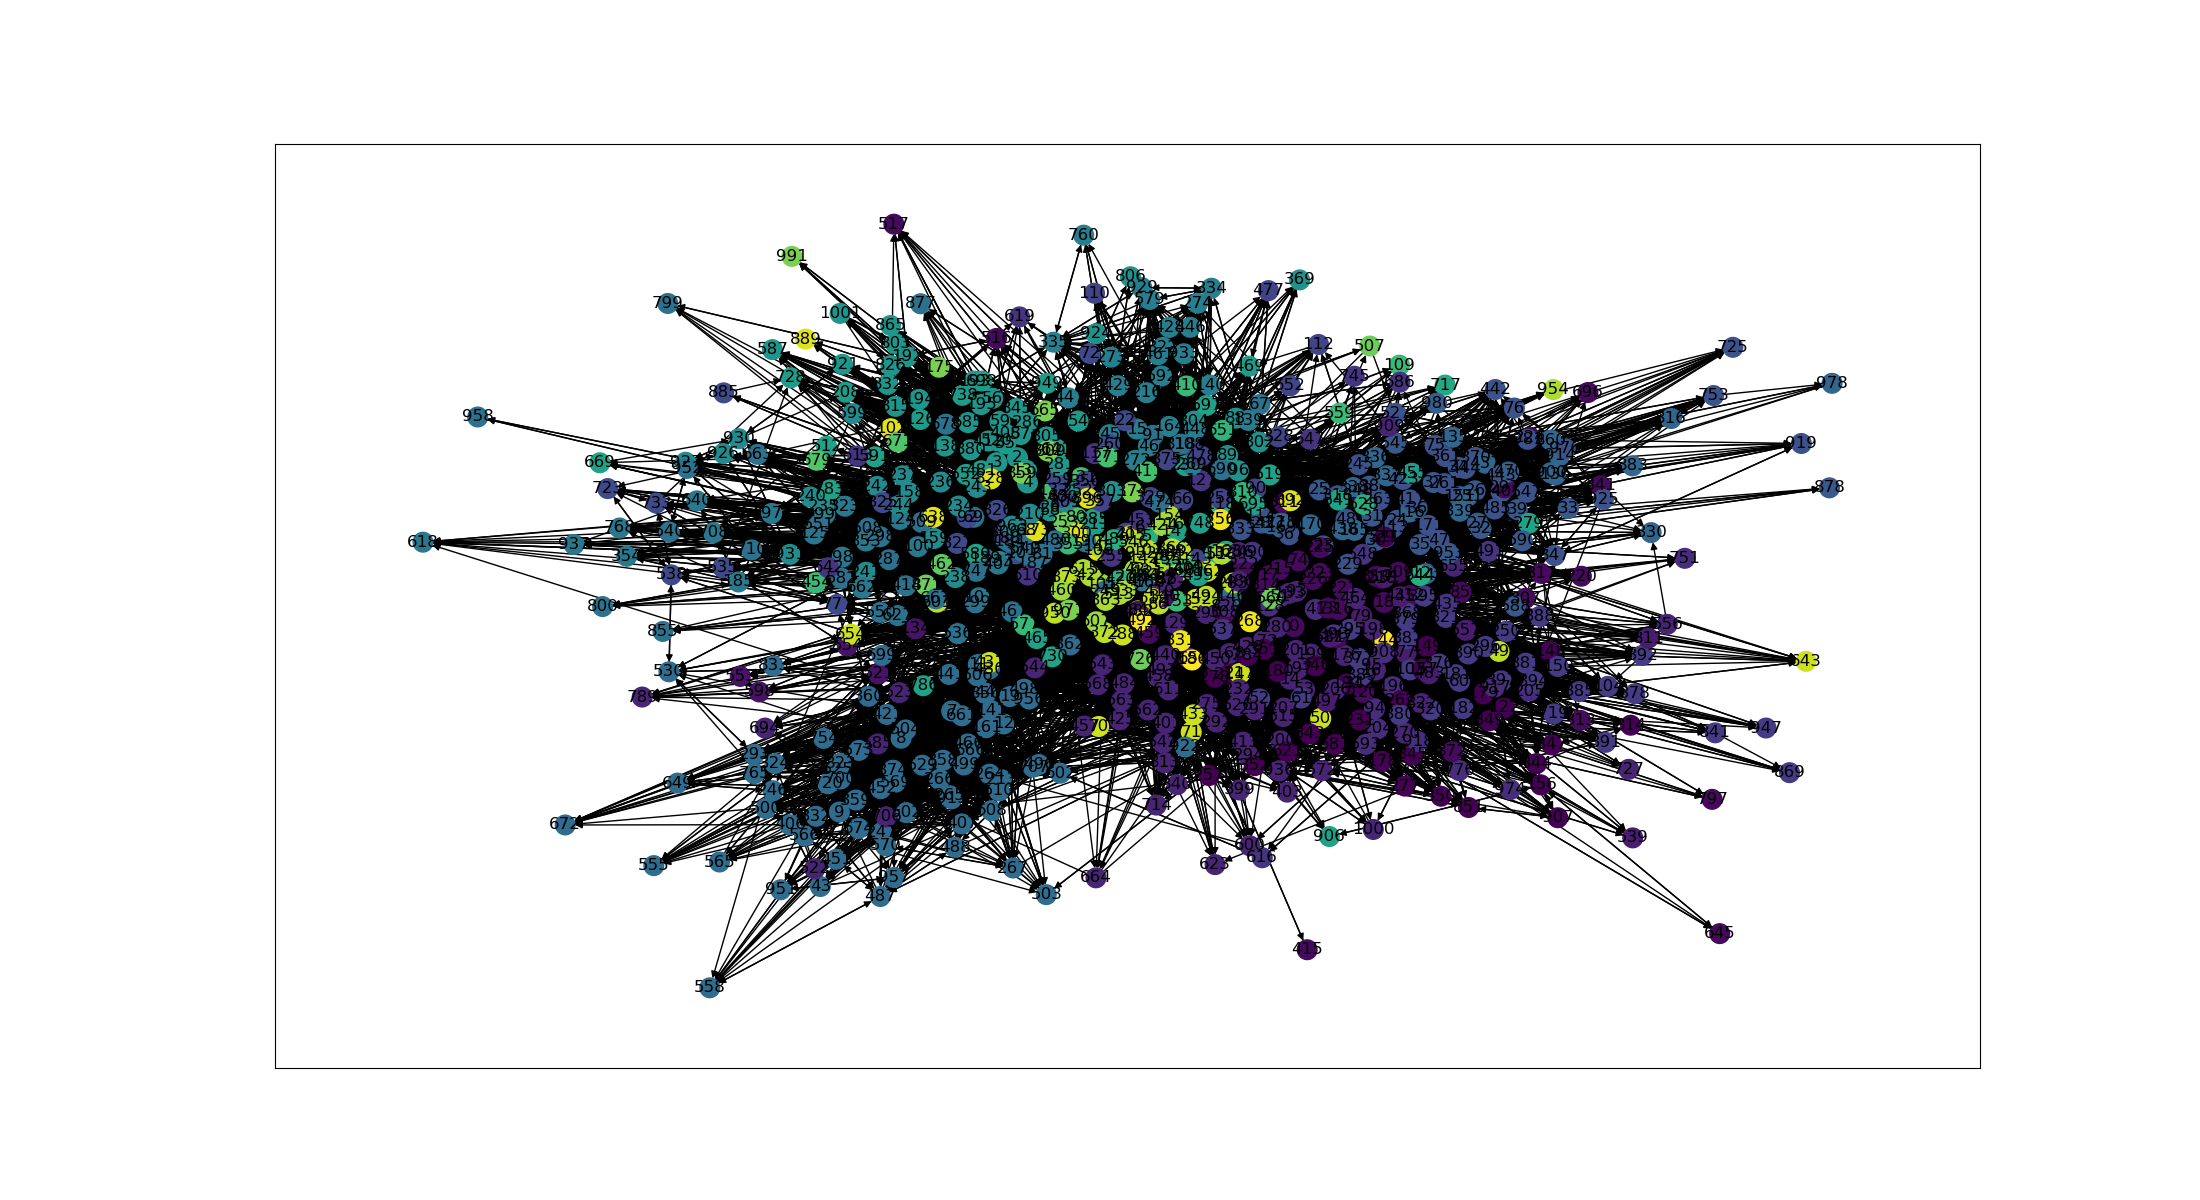

In [30]:
G1nodes = list(G1.nodes())
pos = nx.spring_layout(G1)
umax=np.argmax(theta_gt,1)
# subG = np.random.choice(G1nodes,400)
# k = G1.subgraph(subG)  
k =G1
plt.show()
fig = plt.figure(figsize=(22,12))
nx.draw_networkx(k, pos=pos,node_color = umax,with_labels=True,node_size=200)
fig.savefig(net+'.png', dpi=300)

In [24]:

# nx.draw(G1)

### Output on file

In [31]:
def output_adjacency(G, outfile = None):
    """
        Output the adjacency matrix. Default format is space-separated .csv
        with 3 columns: node1 node2 weight
        INPUT
        ----------
        G: Digraph
           DiGraph NetworkX object.
        outfile: str
                 Name of the adjacency matrix.
    """
#     folder = '../data/input/RD/' 
    outfile = outfile 
    edges = list(G.edges(data=True)) 
    try:
        data = [[u, v, d['weight']] for u, v, d in edges]
    except:
        data = [[u, v, 1] for u, v, d in edges] 
    df = pd.DataFrame(data, columns=['source', 'target', 'w'], index=None)
    df.to_csv('RD/'+outfile, index=False, sep=' ') 

In [32]:
outfile = net+'.dat'
# nx.write_weighted_edgelist(G, '../data/input/'+outnet+'.dat')
# nx.write_weighted_edgelist(G1, outfile)
output_adjacency(G1, outfile= outfile)
print(outfile)

email-Eu-core.dat


In [46]:
G2=nx.DiGraph(G1)

In [47]:
# print([val for (node, val) in G2.degree()])

In [48]:
degree_sort = sorted(G2.degree, key=lambda x: x[1], reverse=False)

In [49]:
degree_sort

[(415, 2),
 (958, 4),
 (645, 5),
 (507, 6),
 (522, 6),
 (727, 6),
 (878, 6),
 (885, 6),
 (978, 6),
 (512, 7),
 (745, 7),
 (760, 7),
 (797, 7),
 (799, 7),
 (855, 7),
 (889, 7),
 (906, 7),
 (991, 7),
 (109, 8),
 (669, 8),
 (751, 8),
 (800, 8),
 (814, 8),
 (539, 9),
 (616, 9),
 (806, 9),
 (869, 9),
 (623, 10),
 (786, 10),
 (811, 10),
 (833, 10),
 (937, 10),
 (954, 10),
 (72, 11),
 (369, 11),
 (559, 11),
 (652, 11),
 (664, 11),
 (694, 11),
 (696, 11),
 (717, 11),
 (877, 11),
 (909, 11),
 (1000, 11),
 (110, 12),
 (591, 12),
 (783, 12),
 (789, 12),
 (947, 12),
 (952, 12),
 (980, 12),
 (330, 13),
 (435, 13),
 (553, 13),
 (556, 13),
 (598, 13),
 (600, 13),
 (613, 13),
 (618, 13),
 (619, 13),
 (649, 13),
 (706, 13),
 (841, 13),
 (974, 13),
 (1001, 13),
 (224, 14),
 (279, 14),
 (454, 14),
 (517, 14),
 (530, 14),
 (540, 14),
 (558, 14),
 (585, 14),
 (672, 14),
 (686, 14),
 (919, 14),
 (67, 15),
 (565, 15),
 (725, 15),
 (951, 15),
 (43, 16),
 (175, 16),
 (354, 16),
 (477, 16),
 (503, 16),
 (577, 1

In [50]:
list_num  = int(len(G1.nodes())*0.009)
print(list_num)
print('='*30)
anomalous_nodes = [] 
for i in range(list_num): 
    anomalous_nodes.append(degree_sort[i][0])
print(anomalous_nodes)

6
[415, 958, 645, 507, 522, 727]


In [51]:
# node_list = [2266, 12012, 16685, 5, 24]

In [52]:
###  add edges randomely
# import random
# num_edge = 1000
# for rn_node in node_list:
#     set_difference = set(G2.nodes()) - set([rn_node])
#     list_difference = list(set_difference)
#     rn_list = random.sample(set_difference, num_edge)
#     l = [rn_node] * len(rn_list)
#     rn_edge  = list(zip(l,rn_list))
#     rn_edger = list(zip(rn_list,l))
#     G2.add_edges_from(rn_edge)
#     G2.add_edges_from(rn_edger)
# #     print(len(G2.edges()))

In [53]:
import random 
anomalous_edges = []
num_edge = 100
for rn_node in anomalous_nodes:
    set_difference = set(G2.nodes()) - set([rn_node])
    set_difference = set_difference  - set(list(G2.neighbors(rn_node)))
    
    list_difference = list(set_difference)
    rn_list = random.sample(set_difference, num_edge)
    l = [rn_node] * len(rn_list)
    rn_edge  = list(zip(l,rn_list))
    rn_edger = list(zip(rn_list,l))
    
    G2.add_edges_from(rn_edge, weight=1) 
    
    anomalous_edges.extend(rn_edge)
#     all_added_edges.extend(rn_edger)

In [54]:
np.savetxt('RD/'+net+'_anomalous_edges.dat', anomalous_edges, delimiter=" ")

In [55]:
restart = False
if restart:
    df_anomalous_edges = pd.read_csv('RD/'+net+'_anomalous_edges.dat', sep='\s+', header=None) 

    a_edgelist = df_anomalous_edges.values.astype(int)
    # G3 = nx.Graph()

    # G3.add_nodes_from(np.unique(a_edgelist))
    G2.add_edges_from(list(zip(a_edgelist[:,0], a_edgelist[:,1])))
    print('len(G2.edges())-len(G1.edges()):', len(G2.edges())-len(G1.edges()))
    print('G2.number_of_nodes(),G2.number_of_edges()', G2.number_of_nodes(),G2.number_of_edges())
    anomalous_edges = list(zip(a_edgelist[:,0], a_edgelist[:,1]))

In [56]:
anomalous_edges

[(415, 490),
 (415, 907),
 (415, 47),
 (415, 343),
 (415, 320),
 (415, 140),
 (415, 178),
 (415, 431),
 (415, 530),
 (415, 49),
 (415, 553),
 (415, 799),
 (415, 513),
 (415, 125),
 (415, 156),
 (415, 529),
 (415, 13),
 (415, 525),
 (415, 173),
 (415, 108),
 (415, 245),
 (415, 241),
 (415, 14),
 (415, 357),
 (415, 63),
 (415, 329),
 (415, 511),
 (415, 162),
 (415, 151),
 (415, 65),
 (415, 726),
 (415, 889),
 (415, 538),
 (415, 918),
 (415, 487),
 (415, 260),
 (415, 654),
 (415, 400),
 (415, 832),
 (415, 53),
 (415, 255),
 (415, 325),
 (415, 551),
 (415, 66),
 (415, 237),
 (415, 523),
 (415, 34),
 (415, 358),
 (415, 37),
 (415, 244),
 (415, 951),
 (415, 50),
 (415, 213),
 (415, 872),
 (415, 929),
 (415, 250),
 (415, 667),
 (415, 82),
 (415, 516),
 (415, 760),
 (415, 519),
 (415, 424),
 (415, 122),
 (415, 953),
 (415, 883),
 (415, 11),
 (415, 165),
 (415, 512),
 (415, 748),
 (415, 550),
 (415, 229),
 (415, 950),
 (415, 388),
 (415, 278),
 (415, 243),
 (415, 855),
 (415, 17),
 (415, 172),


In [57]:
len(G2.edges())-len(G1.edges())

600

In [58]:
G2.number_of_nodes(),G2.number_of_edges()

(708, 24067)

In [59]:
unique_edges, reciprocal_list = reciprocal_edges(G2)

reciprocal: 8778 15289 reciprocity: 0.5741382693439728 0.36473179041841525


In [60]:
unique_edges, reciprocal_list = reciprocal_edges(G1)

reciprocal: 8777 14690 reciprocity: 0.5974812797821647 0.3740145736566242


In [61]:
outfile = net + '_injected.dat'
# nx.write_weighted_edgelist(G, '../data/input/'+outnet+'.dat')
# nx.write_weighted_edgelist(G1, outfile)
output_adjacency(G2, outfile = outfile)
print(outfile)

email-Eu-core_injected.dat


# Inference Task

In [194]:
import sys  
sys.path.insert(0, '../../code/')
# import file

In [104]:
import numpy as np
import pandas as pd

import tools as tl
# import AnomalyDetection as adet
import cv_functions as cvfun

import matplotlib.pyplot as plt
import networkx as nx
import importlib
import sktensor as skt
from sklearn import metrics
from sklearn.metrics import f1_score

import importlib
# import time_glob as gl
%matplotlib inline

In [105]:
pwd!

'/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/data/input'

In [106]:
cmap = 'PuBuGn'

def expected_Aija(U,V,W):
    if W.ndim==1:
        M=np.einsum('ik,jk->ijk',U,V)
        M=np.einsum('ijk,k->ij',M,W)
    else:    
        M=np.einsum('ik,jq->ijkq',U,V)
        M=np.einsum('ijkq,kq->ij',M,W)
    return M


../output/5-fold_cv/RDall/edge_anomalies/theta_inf_True_email-Eu-core_injected.dat_0K42.npz
RD/email-Eu-core_injected.dat shape: (25729, 3)
Number of nodes = 986
Number of layers = 1
Number of edges and average degree in each layer:
E[0] = 25729 - <k> = 52.189
M[0] = 25729 - <k_weighted> = 52.189
Reciprocity (networkX) = 0.689
Reciprocity (intended as the proportion of bi-directional edges over the unordered pairs) = 0.526
Reciprocity (considering the weights of the edges) = 0.689
986


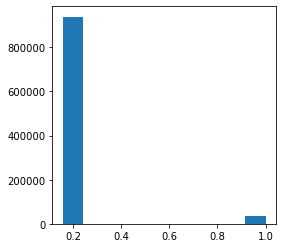

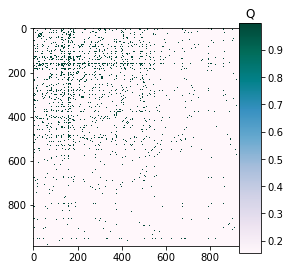

0.9999998318138449 0.15490790744525126


In [108]:
# gl.timer.verbose = True
# gl.timer.color = 'green'
# gl.timer.print_details = False
# gl.timer.print_sub = True
# gl.printer.verboseness = True
# gl.parallelize = False

# label = net+'.dat' 
# flag_anomaly = 'False'


flag_anomaly = 'True'
label = net+'_injected.dat' 

dir0 = '../output/5-fold_cv/'
dir1 = dir0 + 'RDall/edge_anomalies/'



# # original parameters
theta = np.load(dir1+'theta_inf_'+flag_anomaly+'_'+label+'_0K42.npz',allow_pickle=True)
print(dir1+'theta_inf_'+flag_anomaly+'_'+label+'_0K42.npz')
# # define some support files
# np.savetxt("../data/input/u.dat", theta['u'], delimiter=" ")
# np.savetxt("../data/input/v.dat", theta['v'], delimiter=" ")
# np.savetxt("../data/input/z.dat", theta['z'], delimiter=" ") 
theta['mupr'],theta['pibr'],theta['u'].shape 


importlib.reload(tl) 
network = 'RD/'+label

A, B, B_T, data_T_vals = tl.import_data(network,header=0)
nodes = A[0].nodes()
pos = nx.spring_layout(A[0]) 
N = len(nodes)
L = B.shape[0]
K = theta['u'].shape[-1]
print(N)


# node_col =[]
# for idx,node in enumerate(G2.nodes()):
# #     print(idx,node)

#     # if the node has the attribute group1
# #     print(np.argmax(theta['u'][idx], axis=-1))
#     if np.argmax(theta['u'][idx], axis=-1) == 0:
#         node_col.append('red')

#     # if the node has the attribute group1
#     if np.argmax(theta['u'][idx], axis=-1) == 1:
#         node_col.append('green') 
        
        
importlib.reload(cvfun)
flag_anomaly = True
M0 = cvfun._lambda0_full(theta['u'], theta['v'], theta['w'])
if flag_anomaly == False:
    Q = np.zeros_like(M0)
else:
    Q = cvfun.calculate_Q_dense(B,M0,theta['pibr'], theta['mupr'])
M = cvfun.calculate_expectation(theta['u'],theta['v'],theta['w'],Q[0],theta['pibr'])

Q = cvfun.calculate_Q_dense(B,M0,theta['pibr'], theta['mupr'])


plt.figure(figsize=(4,4))
plt.hist(Q.flatten())
plt.show()


plt.figure(figsize=(4,4)) 
plt.imshow(Q[0], cmap=cmap, interpolation='nearest')
# plt.colorbar(fraction=0.046)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.title('Q')
plt.show()

print(np.max(Q[0]), np.min(Q[0])) 

In [132]:
threshold = 1.0  # 1.*np.max(Q[0])/2.
tnum = []
for idx,ndi in enumerate(A[0].nodes()):
    for jdx,ndj in enumerate(A[0].nodes()):
        if Q[0,idx,jdx] == threshold:
            tnum.append(Q[0,idx,jdx])
print(len(tnum))
# print(tnum)

29380


In [58]:
threshold = 0.99  # 1.*np.max(Q[0])/2.
count = []
nodes = []
edges = []
idn = 0
for idx,ndi in enumerate(A[0].nodes()):
    for jdx,ndj in enumerate(A[0].nodes()):
        if Q[0,idx,jdx] > threshold:
            if B[0,idx,jdx] == 1:
                edges.append((ndi,ndj))
                nodes.append(ndi)
                nodes.append(ndj) 
                count.append(Q[0,idx,jdx]) 
                print(Q[0,idx,jdx], idx, jdx, ndi,ndj)
                idn = idn+1
            elif B[0,jdx,idx] == 1:
                nodes.append(ndi)
                nodes.append(ndj)
                edges.append((ndj,ndi))
                count.append(Q[0,jdx,idx])
                print(Q[0,jdx,idx], jdx, idx, ndj,ndi)
                idn = idn+1
# print((len(count)/(N*N))*100)

0.9999999910940862 0 4 0 5
0.9999999911026941 0 5 0 6
0.9999999910972636 0 16 0 17
0.9999999911052176 0 17 0 18
0.9998952989072493 0 63 0 64
0.9998953763765619 64 0 65 0
0.9999999911087404 0 72 0 73
0.9999999911044694 0 73 0 74
0.9999999911070904 0 86 0 88
0.9998954488223801 0 99 0 101
0.9999999911038692 0 101 0 103
0.999895483073935 116 0 120 0
0.9999999911067158 0 141 0 146
0.999895463940676 0 143 0 148
0.9999999910843227 0 161 0 166
0.9999999911060067 0 172 0 177
0.9999999911077428 0 173 0 178
0.9999999911013769 0 208 0 215
0.9999999911019685 0 211 0 218
0.999999991104105 0 213 0 221
0.9999999911016646 0 214 0 222
0.9999999911047537 0 215 0 223
0.9998954197995609 0 218 0 226
0.999999991107561 0 228 0 238
0.999999991106485 0 237 0 248
0.9999999911070678 0 239 0 250
0.9998954593443882 0 255 0 266
0.9998954478822031 0 257 0 268
0.9999999910986573 0 271 0 283
0.9998954527471116 0 284 0 297
0.9999999911059116 0 296 0 309
0.9998954364947908 0 300 0 313
0.9999999911045843 0 302 0 316
0.999

0.9998953473206664 4 528 5 581
0.9998953397917106 4 547 5 611
0.999895437676003 553 4 619 5
0.9999999910958177 4 562 5 644
0.9998953558778853 4 577 5 669
0.9998954360758208 583 4 681 5
0.9999999910950057 4 586 5 690
0.9999999910946082 4 603 5 726
0.9998953327995684 4 605 5 728
0.9999999910968393 4 606 5 730
0.9998953358558578 4 608 5 738
0.9999999910956991 4 623 5 789
0.999999991094625 4 629 5 809
0.9999999910964705 4 635 5 815
0.9999999910866738 4 638 5 820
0.9998953448661525 4 642 5 828
0.9999999910971863 4 644 5 833
0.9998953463283174 4 645 5 840
0.9998953421205435 4 652 5 859
0.9999999910942176 4 665 5 900
0.9999999910960284 4 683 5 931
0.9998953006227979 697 4 958 5
0.9999999910964196 4 703 5 980
0.9999999911026941 5 0 6 0
0.9999999910997872 5 1 6 2
0.9999999911007287 5 2 6 3
0.9999999911000436 5 3 6 4
0.9999999910896773 5 4 6 5
0.9999999910967139 5 20 6 21
0.9999999911034645 5 53 6 54
0.9999999911026931 5 54 6 55
0.9999999911026023 5 55 6 56
0.9999999911020068 5 56 6 57
0.9999999

0.9999999911003423 11 43 12 44
0.9999999910930675 11 61 12 62
0.9999999910826596 11 80 12 82
0.9999999910880335 11 84 12 86
0.9999999910886409 11 117 12 121
0.9999999911017516 11 136 12 141
0.9999999910707826 11 155 12 160
0.9999999911035451 11 156 12 161
0.9998953322302465 161 11 166 12
0.9999999910974464 11 178 12 183
0.9998954610857059 11 206 12 213
0.9998954512944751 11 236 12 247
0.9998953168327075 238 11 249 12
0.999999991106472 11 253 12 264
0.999999991106892 11 254 12 265
0.9999999911065854 11 255 12 266
0.9999999911070913 11 256 12 267
0.9998954592204791 11 280 12 293
0.9998953810359615 287 11 300 12
0.9999999911049926 11 342 12 358
0.9999999911022546 11 346 12 362
0.9998954025783868 392 11 419 12
0.9999999910935173 11 393 12 420
0.9999999911042703 11 403 12 430
0.9999999911002008 11 411 12 441
0.999895459406453 11 421 12 452
0.9998954444195376 11 433 12 466
0.9998953728250902 456 11 494 12
0.9999999911023586 11 460 12 498
0.9999999911070456 11 470 12 510
0.9999999911026438 11

0.9998953870493847 44 15 45 16
0.9998953943793696 45 15 46 16
0.9999999910979172 15 62 16 63
0.9998953079120385 15 63 16 64
0.9999999911003492 15 67 16 68
0.9999999910982184 15 78 16 80
0.9999999910933755 15 79 16 81
0.999895316436403 91 15 93 16
0.9999999910893399 15 103 16 105
0.9999999910908727 15 104 16 106
0.9999999910866249 15 105 16 107
0.9999999910917773 15 112 16 115
0.9998954217966985 15 117 16 121
0.9999999910922479 15 124 16 128
0.9999999911007519 15 127 16 132
0.9998953315190526 148 15 153 16
0.9998954496151745 15 152 16 157
0.9999999911010921 15 159 16 164
0.9998953506132908 164 15 169 16
0.9999999910976509 15 165 16 170
0.9999999910988947 15 169 16 174
0.999999991092499 15 178 16 183
0.9998953724342837 182 15 187 16
0.9998953967143878 185 15 190 16
0.9998953833196961 191 15 196 16
0.9999999910977824 15 202 16 209
0.9999999910964801 15 203 16 210
0.9998953478019028 204 15 211 16
0.9999999910981902 15 213 16 221
0.9998954063684609 15 214 16 222
0.9998952507926668 238 15 24

0.9998953745731278 493 19 537 20
0.9998953761121713 516 19 560 20
0.9998954211258805 586 19 690 20
0.9998954071935955 588 19 695 20
0.9999999911032386 19 605 20 728
0.9999999911058358 19 661 20 885
0.9998954305376748 19 684 20 932
0.9998952292824015 699 19 971 20
0.9999999910881001 20 4 21 5
0.9999999910967139 20 5 21 6
0.9999999910995847 20 9 21 10
0.9999999910999265 20 10 21 11
0.9999999910739469 20 12 21 13
0.9999999910912796 20 16 21 17
0.9999999910967129 20 19 21 20
0.9999999911042905 20 21 21 22
0.9999999910953303 20 27 21 28
0.9999999910991478 20 28 21 29
0.9999999910980232 20 35 21 36
0.9998953743360862 20 40 21 41
0.9998954007039217 20 41 21 42
0.9998953533126453 20 43 21 44
0.9999999910966656 20 45 21 46
0.9999999910880532 20 61 21 62
0.9999999910807785 20 63 21 64
0.9999999911002847 20 67 21 68
0.9999999911039618 20 71 21 72
0.9999999910984904 20 73 21 74
0.9999999910981539 20 78 21 80
0.9999999910933111 20 79 21 81
0.9999999910776393 20 80 21 82
0.9998953542706158 20 81 21 

0.9999999910992944 27 34 28 35
0.9999999910982155 27 35 28 36
0.9999999911002847 27 36 28 37
0.999999991099382 27 37 28 38
0.9999999910993527 27 38 28 39
0.999999991100249 27 39 28 40
0.9998953508515095 40 27 41 28
0.9998954009630209 27 43 28 44
0.9998954019613217 27 45 28 46
0.9999999910979508 27 50 28 51
0.9999999910882456 27 61 28 62
0.999999991098045 27 62 28 63
0.9999999910983461 27 78 28 80
0.9999999910935032 27 79 28 81
0.9998951421986448 80 27 82 28
0.9999999910832089 27 84 28 86
0.9999999910928878 27 85 28 87
0.9998953212829854 91 27 93 28
0.9999999910962071 27 94 28 96
0.9999999910894679 27 103 28 105
0.9998953744076817 104 27 106 28
0.9999999910867529 27 105 28 107
0.9999999910972849 27 110 28 113
0.99999999109291 27 111 28 114
0.9999999910919051 27 112 28 115
0.9999999910968881 27 113 28 116
0.999895229498165 117 27 121 28
0.9999999910923759 27 124 28 128
0.9999999910909891 27 125 28 129
0.999999991091941 27 128 28 133
0.9998952976163947 137 27 142 28
0.9999999911000566 27 

0.9999999911082225 34 658 35 878
0.9998954399222856 693 34 953 35
0.9999999911024685 35 9 36 10
0.999895111650999 12 35 13 36
0.9999999910980232 35 20 36 21
0.9999999910999028 35 22 36 23
0.9998954009763953 23 35 24 36
0.999999991103229 35 24 36 25
0.9998954031074266 26 35 27 36
0.9999999910982155 35 27 36 28
0.9999999911020316 35 28 36 29
0.9999999911016179 35 29 36 30
0.9999999911028895 35 30 36 31
0.9998954098459764 33 35 34 36
0.999895411576379 34 35 35 36
0.9998953927757365 36 35 37 36
0.9999999911019881 35 47 36 48
0.9998954110490059 74 35 75 36
0.9998951553119673 80 35 82 36
0.9998952486246704 84 35 86 36
0.9998953343739145 91 35 93 36
0.9998952927439966 105 35 107 36
0.9999999910999772 35 110 36 113
0.9998953412430098 111 35 114 36
0.9999999910865129 35 117 36 121
0.9998954049068394 123 35 127 36
0.9998953955608062 124 35 128 36
0.9998954065678888 35 125 36 129
0.999895053859445 155 35 160 36
0.9999999910960607 35 160 36 165
0.9999999910979217 35 164 36 169
0.9998953958305504 1

0.9999999910778337 43 80 44 82
0.9998952759741992 81 43 83 44
0.9999999910832107 43 84 44 86
0.9999999910894696 43 103 44 105
0.9999999910910023 43 104 44 106
0.9999999910867546 43 105 44 107
0.9998953363715706 111 43 114 44
0.9999999910838183 43 117 44 121
0.9999999910923776 43 124 44 128
0.9999999910909909 43 125 44 129
0.9999999910919427 43 128 44 133
0.9999999910969363 43 136 44 141
0.999895305837423 137 43 142 44
0.9999999910949545 43 150 44 155
0.9999999910659505 43 155 44 160
0.9999999910987306 43 156 44 161
0.9999999910785246 43 161 44 166
0.9999999910926286 43 178 44 183
0.9999999910961507 43 204 44 211
0.9999999910953493 43 205 44 212
0.999999991100945 43 206 44 213
0.9999999911025339 43 235 44 246
0.999999991087567 43 238 44 249
0.9998952748344568 243 43 254 44
0.9999999910928684 43 271 44 283
0.9999999911027209 43 280 44 293
0.9998953281023468 287 43 300 44
0.9999999911015575 43 309 44 324
0.9998954139728017 316 43 331 44
0.9999999911013986 43 317 44 332
0.999999991100179 4

0.9998954210027298 673 50 918 51
0.9998954576740924 51 52 52 53
0.9999999911064498 51 60 52 61
0.9998954347455052 51 101 52 103
0.999999991100227 51 124 52 128
0.9998953973191023 128 51 133 52
0.9999999911087741 51 141 52 146
0.9998954595535652 51 152 52 157
0.9999999911095632 51 180 52 185
0.9999999911088249 51 192 52 197
0.9999999911061638 51 213 52 221
0.9999999911070608 51 222 52 232
0.9999999910977087 51 288 52 301
0.9999999911073902 51 301 52 314
0.9999999911090629 51 350 52 368
0.9999999911028921 51 359 52 377
0.9999999911094998 51 374 52 397
0.9999999911058771 51 493 52 537
0.9999999911118808 51 599 52 719
0.9998954810681084 51 622 52 786
0.9999999911120173 51 634 52 814
0.9999999911017549 51 638 52 820
0.9998953349173706 4 52 5 53
0.9998951503239075 12 52 13 53
0.9999999911002319 52 13 53 14
0.999895420873733 52 17 53 18
0.9998954576740924 51 52 52 53
0.9998954351557807 52 60 53 61
0.999895354353905 64 52 65 53
0.9999999910810448 52 80 53 82
0.9998954284892437 52 83 53 85
0.99

0.9998954435218296 58 273 59 285
0.9999999911071238 58 274 59 286
0.9999999911016876 58 290 59 303
0.9999999911065517 58 292 59 305
0.9999999911062694 58 383 59 408
0.9999999911068354 58 387 59 412
0.9999999911075673 58 443 59 481
0.999999991107385 58 479 59 520
0.9999999911081795 58 546 59 610
0.9998954802091246 58 553 59 619
0.9999999911070341 58 584 59 685
0.9999999911086055 58 590 59 698
0.9999999911070514 58 608 59 738
0.9998954710841859 627 58 803 59
0.999999991107454 58 629 59 809
0.9999999911046692 58 632 59 812
0.9998954674202557 641 58 826 59
0.9998954645547243 643 58 832 59
0.9999999911078176 58 647 59 845
0.9999999911046282 58 652 59 859
0.9999999911101757 58 654 59 865
0.99989546102385 659 58 880 59
0.9998954564925215 689 58 949 59
0.9998954703607205 58 699 59 971
0.9999999911029548 59 60 60 61
0.9999999911048724 59 93 60 95
0.9999999911024331 59 101 60 103
0.9998954138662949 59 102 60 104
0.9998953718400275 59 103 60 105
0.9999999911074644 59 118 60 122
0.999999991096295 

0.9999999910998876 62 223 63 233
0.9999999911022284 62 226 63 236
0.9999999911031614 62 232 63 243
0.9999999910900897 62 238 63 249
0.9999999910956338 62 241 63 252
0.999895314302096 243 62 254 63
0.9999999910985123 62 244 63 255
0.999895240169796 62 245 63 256
0.9999999910990108 62 258 63 269
0.9999999911011247 62 260 63 271
0.9999999911030205 62 261 63 272
0.999895408511384 62 266 63 278
0.9999999911032812 62 269 63 281
0.9999999910953897 62 271 63 283
0.9999999911001529 62 273 63 285
0.9999999911040401 62 274 63 286
0.9999999910923791 62 288 63 301
0.9999999910986023 62 290 63 303
0.9999999911034678 62 292 63 305
0.9999999911040764 62 309 63 324
0.9999999910989489 62 314 63 329
0.9999999911017423 62 339 63 355
0.9999999910997904 62 347 63 363
0.9999999910954855 62 348 63 366
0.999999991097921 62 353 63 371
0.9999999911032529 62 361 63 379
0.9999999910940032 62 380 63 405
0.9999999911031855 62 383 63 408
0.9999999910981846 62 386 63 411
0.9999999911037517 62 387 63 412
0.999999991097

0.9999999910895304 68 105 69 107
0.9999999911048248 68 106 69 108
0.9998953899903265 68 136 69 141
0.9999999910687327 68 155 69 160
0.9998953393775497 161 68 166 69
0.9999999910982874 68 168 69 173
0.9999999910954024 68 178 69 183
0.9999999911004736 68 179 69 184
0.999895445537697 182 68 187 69
0.9998954415466835 183 68 188 69
0.9999999910950021 68 184 69 189
0.9999999911039856 68 185 69 190
0.9999999910981223 68 205 69 212
0.9998954269994574 68 209 69 216
0.9999999911047995 68 248 69 259
0.9999999911056784 68 249 69 260
0.9998953717102254 68 270 69 282
0.9999999911049577 68 275 69 287
0.9998954249464844 68 286 69 299
0.9999999911006664 68 293 69 306
0.9998954040791005 68 298 69 311
0.9999999911039582 68 310 69 325
0.9999999910992012 68 314 69 329
0.9998954232024915 68 337 69 353
0.9999999911015748 68 340 69 356
0.9999999911002118 68 346 69 362
0.9999999911029663 68 376 69 400
0.9999999910936079 68 384 69 409
0.9999999911042867 68 391 69 418
0.9999999910914726 68 393 69 420
0.999999991

0.9999999911000343 79 106 81 108
0.9999999910908902 79 111 81 114
0.9999999910817945 79 117 81 121
0.9999999910903558 79 124 81 128
0.9999999910889688 79 125 81 129
0.999999991096799 79 132 81 137
0.9998953891812212 136 79 141 81
0.9999999910863941 79 137 81 142
0.9998954017056974 79 140 81 145
0.9998953935150983 141 79 146 81
0.9999999910929331 79 150 81 155
0.9999999910639227 79 155 81 160
0.9998953915207214 79 156 81 161
0.9998953724365243 79 157 81 162
0.9999999910764996 79 161 81 166
0.9999999910932094 79 164 81 169
0.9998953927756125 79 165 81 170
0.9999999910906068 79 178 81 183
0.9999999910956807 79 179 81 184
0.9998954161173433 79 183 81 188
0.9999999910902062 79 184 81 189
0.9999999910941297 79 204 81 211
0.9999999910933282 79 205 81 212
0.9999999910935686 79 208 81 215
0.9999999910938567 79 214 81 222
0.999895409666787 79 217 81 225
0.999999991085544 79 238 81 249
0.9998953270451335 241 79 252 81
0.9998952793873745 243 79 254 81
0.9999999910810871 79 245 81 256
0.99989539584

0.9999999910927252 81 432 83 465
0.999895298219619 81 439 83 474
0.9998953309381499 81 441 83 478
0.9999999910921107 81 443 83 481
0.9999999910933083 81 446 83 484
0.9999999910911955 81 454 83 492
0.9999999910800063 81 456 83 494
0.9999999910861825 81 457 83 495
0.9998953328059522 81 458 83 496
0.9998953964633235 466 81 506 83
0.9998952904861523 81 473 83 513
0.9998952553383381 81 477 83 518
0.999895235493343 81 490 83 533
0.999895418867144 492 81 536 83
0.9998952766606607 81 502 83 546
0.9999999910930994 81 513 83 557
0.9998953359459535 81 527 83 579
0.9998954041285677 533 81 589 83
0.9998954224025703 535 81 591 83
0.9998952816667598 81 542 83 601
0.9998952685715392 81 548 83 612
0.9998953141874867 81 550 83 615
0.9998953140385185 81 560 83 642
0.9998952596241242 81 568 83 654
0.9998954256698471 604 81 727 83
0.9999999910893834 81 610 83 747
0.9999999910892076 81 632 83 812
0.9998953143767771 81 638 83 820
0.999999991087838 81 651 83 856
0.9999999910811604 81 684 83 932
0.999999991092

0.9999999910945762 85 22 87 23
0.9999999910928878 85 27 87 28
0.99999999109181 85 40 87 41
0.9999999910935043 85 41 87 42
0.9998953846246417 85 44 87 45
0.9999999911006647 85 48 87 49
0.9999999911006187 85 49 87 50
0.9999999910926228 85 57 87 58
0.9998953495842308 61 85 62 87
0.9998954057715539 62 85 63 87
0.9998953411268743 63 85 64 87
0.9998953881102837 68 85 69 87
0.9999999910960486 85 73 87 74
0.9998953901572827 85 76 87 77
0.999999991090868 85 79 87 81
0.9999999910751919 85 80 87 82
0.9999999910830253 85 81 87 83
0.9999999910826639 85 82 87 84
0.9998952666001576 84 85 86 87
0.9999999910868312 85 103 87 105
0.9999999910883646 85 104 87 106
0.9999999910841154 85 105 87 107
0.9998953592026051 111 85 114 87
0.9999999910892693 85 112 87 115
0.999895260577092 117 85 121 87
0.9999999910897401 85 124 87 128
0.999999991088353 85 125 87 129
0.9999999910972183 85 126 87 131
0.9999999910982464 85 127 87 132
0.9999999910961839 85 132 87 137
0.9999999910936385 85 140 87 145
0.9998954114520759 1

0.9999999911009597 91 564 93 647
0.9998954562640664 573 91 664 93
0.9998953560862118 91 597 93 714
0.9998953825838327 91 623 93 789
0.9998954193994372 633 91 813 93
0.9998953733462094 638 91 820 93
0.9999999911026344 91 660 93 883
0.9998952523237169 699 91 971 93
0.9998951501897786 12 92 13 94
0.9999999910994904 92 40 94 41
0.9998953616252493 63 92 64 94
0.9998953542200372 64 92 65 94
0.9999999910882605 92 84 94 86
0.9999999911055645 92 93 94 95
0.9999999911080604 92 116 94 120
0.9999999910974224 92 124 94 128
0.9998954218684286 162 92 167 94
0.9998954508743922 171 92 176 94
0.9999999911052629 92 172 94 177
0.9998954396781354 191 92 196 94
0.9998954230050061 193 92 198 94
0.9999999911057503 92 194 94 199
0.9999999911057682 92 195 94 200
0.9999999911048716 92 196 94 201
0.999999991103676 92 197 94 204
0.9999999911047199 92 198 94 205
0.9999999911051043 92 199 94 206
0.9998954402139036 92 200 94 207
0.9999999911047059 92 207 94 214
0.9998954440046596 92 211 94 218
0.9998954656079435 92 2

0.9998953796627007 327 101 342 103
0.9998954504686304 101 336 103 352
0.9999999911037772 101 350 103 368
0.9998954122759754 358 101 376 103
0.9999999910976027 101 359 103 377
0.9999999911030698 101 360 103 378
0.9998954069406873 361 101 379 103
0.999895429880321 362 101 380 103
0.9999999911047427 101 364 103 385
0.9999999911012646 101 367 103 389
0.9999999911026373 101 368 103 390
0.9998954430915293 101 370 103 392
0.999999991101167 101 371 103 393
0.9999999911052132 101 372 103 394
0.9998954350716931 101 373 103 395
0.9998954356090365 374 101 397 103
0.9999999911002015 101 484 103 526
0.9998953801227873 493 101 537 103
0.9998954029966669 101 502 103 546
0.999895468211228 101 529 103 582
0.9999999911044907 102 17 104 18
0.9998954138662949 59 102 60 104
0.9999999911036639 102 60 104 61
0.9998951788634292 80 102 82 104
0.9999999911031421 102 101 104 103
0.9998954378728618 145 102 150 104
0.9998953890585253 150 102 155 104
0.9998954062658327 152 102 157 104
0.9998950774336939 155 102 160 

0.9999999910933063 104 516 106 560
0.9999999910985007 104 529 106 582
0.9999999910974334 104 533 106 589
0.9999999910960427 104 544 106 607
0.9998953195517856 550 104 615 106
0.9999999910980129 104 559 106 641
0.9999999910970119 104 560 106 642
0.9999999910942261 104 578 106 671
0.9999999910977118 104 586 106 690
0.9998953492519634 588 104 695 106
0.9999999910991476 104 598 106 717
0.9998953581227806 603 104 726 106
0.9998953332918029 610 104 747 106
0.9998953509144113 611 104 748 106
0.9999999910983651 104 615 106 756
0.9999999910893823 104 638 106 820
0.9999999910961342 104 642 106 828
0.9999999910999371 104 661 106 885
0.9998952603624481 684 104 932 106
0.9999999910896372 105 1 107 2
0.9999999910905797 105 2 107 3
0.9999999910898938 105 3 107 4
0.9998953376277663 105 7 107 8
0.9999999910866249 105 15 107 16
0.9999999910826982 105 16 107 17
0.9999999910906655 105 17 107 18
0.9999999910897907 105 18 107 19
0.9999999910865605 105 20 107 21
0.9999999910884424 105 22 107 23
0.99999999108

0.9999999910953388 111 50 114 51
0.9999999910856309 111 61 114 62
0.9999999910954332 111 62 114 63
0.9998953851076303 111 75 114 76
0.9999999910957346 111 78 114 80
0.9999999910908902 111 79 114 81
0.9999999910752143 111 80 114 82
0.9999999910830475 111 81 114 83
0.9998952694617346 84 111 86 114
0.9998953592026051 111 85 114 87
0.9999999910933399 111 87 114 89
0.9998953551939234 91 111 93 114
0.9999999910935948 111 94 114 96
0.9999999910868536 111 103 114 105
0.9999999910883868 111 104 114 106
0.9999999910841378 111 105 114 107
0.9999999910946729 111 110 114 113
0.9999999910892915 111 112 114 115
0.999999991094276 111 113 114 116
0.9999999910812005 111 117 114 121
0.9999999910897623 111 124 114 128
0.9999999910883753 111 125 114 129
0.9999999910893275 111 128 114 133
0.9998953639390703 111 132 114 137
0.9999999910936607 111 140 114 145
0.9999999910941286 111 147 114 152
0.9998954055751313 149 111 154 114
0.99999999109234 111 150 114 155
0.9998953877555263 111 153 114 158
0.999999991063

0.9999999910990922 115 124 118 128
0.9998954622804289 115 127 118 132
0.99989542612705 115 178 118 183
0.9998954571374845 115 202 118 209
0.9999999911110707 115 267 118 279
0.9999999911012464 115 287 118 300
0.9999999910965734 115 288 118 301
0.9999999911059481 115 311 118 326
0.9999999911066945 115 365 118 387
0.9999999910975493 115 384 118 409
0.9999999910954148 115 393 118 420
0.9998954755470196 429 115 461 118
0.9999999911027554 115 457 118 495
0.9998954454930266 115 471 118 511
0.9999999911014338 115 505 118 549
0.9999999911097502 115 538 118 597
0.9998954740700327 544 115 607 118
0.9999999911090305 115 566 118 651
0.99989542786377 115 576 118 667
0.9998954579359927 115 611 118 748
0.9999999911095917 115 615 118 756
0.999895483073935 116 0 120 0
0.9999999910957958 116 4 120 5
0.9999999910989725 116 16 120 17
0.9999999911069252 116 17 120 18
0.999895452613917 73 116 74 120
0.9999999911081057 116 77 120 79
0.9999999911080604 116 92 120 94
0.999999991109564 116 99 120 101
0.999895441

0.9998953084119788 84 121 86 125
0.9999999911101235 121 95 125 97
0.9999999911089611 121 96 125 98
0.9998954506773339 121 97 125 99
0.9999999911093409 121 98 125 100
0.9999999911084064 121 99 125 101
0.9998953023913175 117 121 121 125
0.9999999911064608 121 120 125 124
0.999999991094759 121 137 125 142
0.9998953165338996 121 161 125 166
0.9998954622813498 180 121 185 125
0.9999999910992073 121 271 125 283
0.9999999911089437 121 308 125 323
0.9999999911077588 121 337 125 353
0.9998954693474177 121 338 125 354
0.9998954046419457 121 353 125 371
0.9999999911039912 121 379 125 404
0.9999999910941976 121 397 125 424
0.9998954499602375 121 552 125 618
0.999895452019946 121 558 125 640
0.9999999911088423 121 595 125 708
0.9999999911093757 121 618 125 768
0.9999999911102544 121 687 125 937
0.9998954532070156 122 1 126 2
0.9998954287434644 3 122 4 126
0.999999991102921 122 5 126 6
0.9999999910801698 122 12 126 13
0.9999999911080933 122 53 126 54
0.9999999911073224 122 54 126 55
0.99999999110723

0.9999999910881514 126 117 131 121
0.9999999911058647 126 122 131 126
0.9999999911052061 126 127 131 132
0.9998953504434097 137 126 142 131
0.9999999910702922 126 155 131 160
0.999895444007813 126 158 131 163
0.9998953566136138 126 201 131 208
0.9998954130631095 202 126 209 131
0.9999999911004778 126 204 131 211
0.9999999910996767 126 205 131 212
0.9999999910918981 126 238 131 249
0.999999991097441 126 241 131 252
0.9999999911029308 126 260 131 271
0.9998954352700047 269 126 281 131
0.9999999910951238 126 270 131 282
0.999999991097197 126 271 131 283
0.9999999911019593 126 273 131 285
0.9999999911052735 126 292 131 305
0.9999999910972928 126 348 131 366
0.9999999911025914 126 355 131 373
0.9999999910999912 126 386 131 411
0.9999999910995018 126 392 131 419
0.9999999911036855 126 395 131 422
0.999895434343119 424 126 455 131
0.9999999911062892 126 443 131 481
0.9999999911037976 126 508 131 552
0.9998953916394065 126 548 131 612
0.9999999911073276 126 590 131 698
0.9998954605342674 126 5

0.9998954443218558 153 132 158 137
0.9999999910692547 132 155 137 160
0.9999999911045125 132 159 137 164
0.9999999910818241 132 161 137 166
0.9998953912350874 164 132 169 137
0.9999999911023162 132 169 137 174
0.9999999911071453 132 170 137 175
0.9999999910959229 132 178 137 183
0.9999999911045573 132 189 137 194
0.9999999910976509 132 201 137 208
0.9998953960428537 202 132 209 137
0.9999999910999023 132 203 137 210
0.9999999910994437 132 204 137 211
0.9998952914532064 238 132 249 137
0.9999999910964066 132 241 137 252
0.9998953024181633 243 132 254 137
0.999895406643563 244 132 255 137
0.9998954165134718 260 132 271 137
0.9999999911037928 132 261 137 272
0.9999999911040535 132 269 137 281
0.9998953937673817 271 132 283 137
0.9999999911009254 132 273 137 285
0.9999999911048122 132 274 137 286
0.9999999911058463 132 285 137 298
0.9999999910931523 132 288 137 301
0.9999999910993748 132 290 137 303
0.99999999110424 132 292 137 305
0.9999999910997215 132 314 137 329
0.9998954215170546 339 

0.9999999910970608 138 128 143 133
0.9998954139297417 138 137 143 142
0.999895091476717 155 138 160 143
0.9999999910836502 138 161 143 166
0.9999999911010278 138 167 143 172
0.9998954387385163 191 138 196 143
0.9999999911060959 138 192 143 197
0.9999999911049445 138 196 143 201
0.9998954555324825 219 138 229 143
0.9998954092588129 247 138 258 143
0.999999991102373 138 277 143 290
0.9999999911062997 138 310 143 325
0.9999999911043524 138 311 143 326
0.9999999911078549 138 313 143 328
0.999999991101544 138 314 143 329
0.9999999910981042 138 325 143 340
0.9999999911067756 138 341 143 357
0.9999999911047853 138 357 143 375
0.9999999910965998 138 380 143 405
0.9999999911073943 138 388 143 413
0.9999999911002907 138 392 143 419
0.9998953840931177 393 138 420 143
0.9999999911083427 138 435 143 469
0.9999999911004667 138 439 143 474
0.9999999911053309 138 441 143 478
0.9999999911042631 138 442 143 480
0.9999999911061692 138 444 143 482
0.999999991108273 138 446 143 484
0.9999999911049774 138 5

0.9998954005804948 124 147 128 152
0.999999991102097 147 127 152 132
0.999895315734043 137 147 142 152
0.9999999911011608 147 142 152 147
0.9999999910971575 147 148 152 153
0.9998954171163462 147 149 152 154
0.9999999910671709 147 155 152 160
0.999895311056529 147 161 152 166
0.9999999910938452 147 178 152 183
0.9998954066618415 181 147 186 152
0.999999991100859 147 182 152 187
0.9998953707551601 204 147 211 152
0.9999999910965657 147 205 152 212
0.9998954009826033 215 147 223 152
0.9998952737671987 238 147 249 152
0.9998952847340071 243 147 254 152
0.9998953889770095 244 147 255 152
0.999999991084329 147 245 152 256
0.9998953767763064 247 147 258 152
0.9998954137709273 147 258 152 269
0.9999999910998209 147 260 152 271
0.9999999910940851 147 271 152 283
0.999999991101944 147 276 152 288
0.9999999910928665 147 318 152 333
0.9998953726870662 147 325 152 340
0.9998954261947632 330 147 345 152
0.9999999911004384 147 339 152 355
0.99989538964046 347 147 363 152
0.9999999910941808 147 348 1

0.9998953952364963 178 154 183 159
0.99999999110495 154 202 159 209
0.9999999911036486 154 203 159 210
0.9999999911026297 154 208 159 215
0.9999999911044061 154 223 159 233
0.9999999911063518 154 224 159 234
0.9999999911089203 154 225 159 235
0.9999999911067456 154 226 159 236
0.999999991109085 154 227 159 237
0.9999999911088129 154 228 159 238
0.9999999911104294 154 229 159 240
0.9999999911099421 154 230 159 241
0.999999991108597 154 231 159 242
0.9999999911076781 154 232 159 243
0.9998954713305624 154 233 159 244
0.9998953217056615 238 154 249 159
0.9998953803009648 241 154 252 159
0.9999999910969014 154 288 159 301
0.9999999911031213 154 290 159 303
0.9998953421986266 389 154 415 159
0.9999999910946958 154 406 159 434
0.9999999911084771 154 410 159 440
0.9999999911048205 154 428 159 460
0.999999991100948 154 638 159 820
0.9999999911108202 154 679 159 926
0.9999999911110982 154 680 159 927
0.9999999911102876 154 683 159 931
0.9999999911095331 154 698 159 963
0.9999999910688399 155 1 

0.9998953551522325 287 156 300 161
0.9999999911027503 156 301 161 314
0.9998954178614736 335 156 351 161
0.9999999911033818 156 342 161 358
0.9999999911004743 156 347 161 363
0.9998954163251591 353 156 371 161
0.9999999910946875 156 380 161 405
0.9998953766999867 392 156 419 161
0.9998953489254221 406 156 434 161
0.9998954203408121 411 156 441 161
0.9998954394761304 420 156 451 161
0.9999999911043279 156 421 161 452
0.9998954601429652 156 458 161 496
0.9998954498148193 156 465 161 504
0.9998954510715881 488 156 530 161
0.9998954419502798 156 511 161 555
0.9999999911041644 156 522 161 569
0.9998954415414778 523 156 570 161
0.9999999911044705 156 570 161 661
0.9999999911049007 156 575 161 666
0.9998954455393436 576 156 667 161
0.9998954276915973 156 594 161 707
0.9998954485493623 156 614 161 754
0.9999999910990608 157 1 162 2
0.999895383579953 3 157 4 162
0.9999999910998786 157 14 162 15
0.9998953043836989 16 157 17 162
0.9999999911008545 157 30 162 31
0.999895408059905 44 157 45 162
0.9

0.9998953319484539 139 161 144 166
0.9998952781982077 140 161 145 166
0.9998953028483082 141 161 146 166
0.999999991082952 161 142 166 147
0.9998953097343344 161 145 166 150
0.999895311056529 147 161 152 166
0.9998952584275551 148 161 153 166
0.9998953363635277 161 151 166 156
0.9998953306839254 161 153 166 158
0.9999999910855778 161 154 166 159
0.9999999910488925 161 155 166 160
0.99999999108153 161 158 166 163
0.9999999910763633 161 160 166 165
0.9999999910805619 161 163 166 168
0.9998952897550408 167 161 172 166
0.999999991078513 161 168 166 173
0.9998953107962534 161 169 166 174
0.9998953109862819 172 161 177 166
0.9998953321689606 161 173 166 178
0.9998953043661148 175 161 180 166
0.9998953291002854 161 176 166 181
0.9999999910807039 161 179 166 184
0.9999999910826496 161 182 166 187
0.9998953103224316 186 161 191 166
0.9998953198770918 161 189 166 194
0.9998953045807617 196 161 201 166
0.999999991080915 161 202 166 209
0.9998952870108153 161 203 166 210
0.9999999910783475 161 205

0.9999999911015495 165 34 170 35
0.9998953958305504 165 35 170 36
0.9999999911016371 165 37 170 38
0.9999999911025039 165 39 170 40
0.9999999910905034 165 61 170 62
0.9999999910832309 165 63 170 64
0.9998953927756125 79 165 81 170
0.9998951787851273 80 165 82 170
0.9998952720769416 84 165 86 170
0.9999999910984629 165 94 170 96
0.9999999910917253 165 103 170 105
0.9999999910890112 165 105 170 107
0.9999999910951668 165 111 170 114
0.9999999910941622 165 112 170 115
0.9999999910991436 165 113 170 116
0.9999999911045299 165 114 170 117
0.9999999911041889 165 119 170 123
0.9999999910941979 165 128 170 133
0.9998954241238002 165 130 170 135
0.9999999911038605 165 131 170 136
0.9999999910985288 165 140 170 145
0.9998954230650509 165 146 170 151
0.9999999910682125 165 155 170 160
0.9999999911007794 165 158 170 163
0.9999999911034744 165 159 170 164
0.9999999910956239 165 160 170 165
0.999999991097485 165 164 170 169
0.9999999910948837 165 178 170 183
0.9999999911012155 165 183 170 188
0.9999

0.9999999910949812 169 380 174 405
0.9998954640127157 169 383 174 408
0.999999991099162 169 386 174 411
0.9999999910921983 169 393 174 420
0.9999999910913562 169 397 174 424
0.9999999910942095 169 438 174 473
0.9999999911052784 169 479 174 520
0.9999999911051036 169 574 174 665
0.9999999911049274 169 584 174 685
0.9999999911053473 169 629 174 809
0.9998954573374123 169 632 174 812
0.9999999911071906 169 635 174 815
0.999999991102521 169 652 174 859
0.9999999911045703 169 659 174 880
0.9998953349024734 684 169 932 174
0.9998952458456649 699 169 971 174
0.9999999911076729 170 2 175 3
0.9998954524690462 170 14 175 15
0.9999999911035886 170 57 175 58
0.9998954524013578 62 170 63 175
0.9999999911071453 170 132 175 137
0.9999999911073502 170 169 175 174
0.9999999911014439 170 241 175 252
0.9998954736102206 170 276 175 288
0.9999999911099312 170 574 175 665
0.9998954668131017 584 170 685 175
0.9998953749760338 64 171 65 176
0.9998954455297923 171 91 176 93
0.9998954508743922 171 92 176 94
0.9

0.99999999109515 178 62 183 63
0.9999999910780705 178 63 183 64
0.9999999910975828 178 67 183 68
0.9999999910954024 178 68 183 69
0.9999999910954512 178 78 183 80
0.9999999910906068 178 79 183 81
0.9999999910749303 178 80 183 82
0.9999999910899913 178 85 183 87
0.9999999910984113 178 86 183 88
0.9999999910930565 178 87 183 89
0.9999999910989215 178 88 183 90
0.9999999911010619 178 89 183 91
0.999999991090475 178 91 183 93
0.9999999910976284 178 93 183 95
0.9998953565881465 103 178 105 183
0.9999999910881033 178 104 183 106
0.9999999910838542 178 105 183 107
0.9999999910991586 178 106 183 108
0.9999999910943896 178 110 183 113
0.9999999910900135 178 111 183 114
0.9999999910939926 178 113 183 116
0.99989542612705 115 178 118 183
0.999999991080917 178 117 183 121
0.9999999910894789 178 124 183 128
0.9999999910880918 178 125 183 129
0.999999991089044 178 128 183 133
0.9999999910959229 178 132 183 137
0.999999991085517 178 137 183 142
0.9998953746731516 178 140 183 145
0.9998954102525839 14

0.9998954564025719 707 189 1001 194
0.9999999911050249 190 1 195 2
0.9999999911059657 190 2 195 3
0.999999991105281 190 3 195 4
0.9999999910949209 190 4 195 5
0.999999991103528 190 5 195 6
0.9999999911072431 190 56 195 57
0.9999999911018808 190 57 195 58
0.9999999911077493 190 58 195 59
0.999999991104666 190 62 195 63
0.9999999910725936 190 155 195 160
0.9999999911028019 190 157 195 162
0.9999999911056427 190 169 195 174
0.9999999911097786 190 187 195 192
0.9999999911101298 190 188 195 193
0.9999999911078831 190 189 195 194
0.9999999911009794 190 201 195 208
0.9998954243921232 204 190 211 195
0.9999999910997354 190 241 195 252
0.9998954542104405 269 190 281 195
0.9998954531949209 190 274 195 286
0.9999999911075659 190 292 195 305
0.99989542153849 386 190 411 195
0.9999999911078495 190 387 195 412
0.9999999911111443 190 475 195 516
0.999895459951541 190 476 195 517
0.9998954629362998 190 479 195 520
0.999895366613743 190 490 195 533
0.9998954343286622 190 508 195 552
0.9999999911080656 

0.9999999911050198 199 221 206 231
0.9999999911037533 199 222 206 232
0.9999999911070439 199 265 206 277
0.9999999910991159 199 268 206 280
0.9999999911075653 199 272 206 284
0.9999999911017948 199 277 206 290
0.9999999911068626 199 278 206 291
0.9998954238643243 199 279 206 292
0.9999999911074182 199 281 206 294
0.9999999911055361 199 294 206 307
0.9998954363979575 199 327 206 342
0.9999999911068164 199 331 206 346
0.9999999911056995 199 336 206 352
0.9999999911040898 199 399 206 426
0.9999999911059766 199 410 206 440
0.9999999911037089 199 474 206 515
0.999895388655043 199 502 206 546
0.9999999911064662 199 532 206 588
0.9998954122747319 199 537 206 593
0.9998954523506852 199 612 206 751
0.9998954335401652 199 619 206 776
0.9999999911074805 199 622 206 786
0.9999999910984454 199 638 206 820
0.9999999911063986 199 668 206 908
0.9999999911068634 199 672 206 917
0.9999999911061658 199 673 206 918
0.9998954422813966 686 199 936 206
0.9999999911089212 199 706 206 1000
0.99999999109366 200

0.9998953534670808 204 548 211 612
0.999895344526918 204 568 211 654
0.9999999911018921 204 570 211 661
0.9999999911016478 204 588 211 695
0.999999991103628 204 590 211 698
0.9998954575278579 606 204 730 211
0.9999999911020729 204 608 211 738
0.9999999911015116 204 614 211 754
0.9999999911024757 204 629 211 809
0.9999999911028397 204 647 211 845
0.9999999910996485 204 652 211 859
0.9998954219988804 204 677 211 924
0.9999999910916518 204 684 211 932
0.9999999911032534 204 689 211 949
0.9999999910974533 205 6 212 7
0.9999999910912969 205 16 212 17
0.9999999910951552 205 20 212 21
0.999895412582179 22 205 23 212
0.9999999910953477 205 27 212 28
0.99999999109427 205 40 212 41
0.9998953748252837 41 205 42 212
0.9999999910953493 205 43 212 44
0.9999999910991214 205 47 212 48
0.9999999910950826 205 57 212 58
0.9998953489843346 61 205 62 212
0.9999999910978699 205 62 212 63
0.9998952720435548 205 63 212 64
0.9999999911003019 205 67 212 68
0.9999999910981223 205 68 212 69
0.9999999911023105 205

0.9999999911096995 210 70 217 71
0.9999999910912737 210 82 217 84
0.9999999910897895 210 117 217 121
0.9998954606132879 127 210 132 217
0.999895403863415 210 137 217 142
0.9998953968426745 210 155 217 160
0.9998954083951034 210 157 217 162
0.9998954068640603 210 270 217 282
0.9999999911066886 210 276 217 288
0.9998954498102048 325 210 340 217
0.9998953922381085 210 348 217 366
0.9999999911036177 210 379 217 404
0.9999999911071931 210 404 217 431
0.9999999911086329 210 405 217 433
0.9998954830129558 480 210 521 217
0.9999999911013946 210 548 217 612
0.9998954476201237 210 561 217 643
0.9998953841109043 210 568 217 654
0.9998954417535594 632 210 812 217
0.9999999911019685 211 0 218 0
0.9999999910889505 211 4 218 5
0.9999999910921297 211 16 218 17
0.9999999911000885 211 17 218 18
0.9998953700322355 211 35 218 36
0.9998954348210358 211 72 218 73
0.9999999910993397 211 73 218 74
0.9998953996073913 211 80 218 82
0.9998954066851817 211 83 218 85
0.9999999910838671 211 84 218 86
0.999895444004

0.9998953415160753 380 218 405 226
0.9998954206559584 218 392 226 419
0.9999999910887923 218 406 226 434
0.9999999911025828 218 410 226 440
0.9999999910998313 218 413 226 443
0.9999999910959307 218 427 226 459
0.9999999911002905 218 445 226 483
0.9998953443970159 456 218 494 226
0.999999991097272 218 473 226 513
0.9999999910959523 218 477 226 518
0.999895341244879 218 490 226 533
0.9998953741633297 502 218 546 226
0.9998954430738015 218 589 226 696
0.9999999911026752 218 663 226 892
0.99989544907169 22 219 23 229
0.9999999911022588 219 27 229 28
0.9998954574758564 28 219 29 229
0.9998954536614182 219 29 229 30
0.9999999911069306 219 30 229 31
0.9999999911070173 219 36 229 37
0.9998954329361057 219 38 229 39
0.9999999911060299 219 47 229 48
0.9999999910877181 219 63 229 64
0.9999999910920454 219 82 229 84
0.9998953025404321 84 219 86 229
0.9999999910996482 219 111 229 114
0.999999991098644 219 112 229 115
0.9998954555324825 219 138 229 143
0.9999999911001051 219 160 229 165
0.9998954223

0.9999999910943848 227 397 237 424
0.999895463087193 227 531 237 587
0.9999999911103048 227 679 237 926
0.9999999911105829 227 680 237 927
0.9998954443428244 227 684 237 932
0.9999999911090176 227 698 237 963
0.999999991107561 228 0 238 0
0.9999999911046556 228 1 238 2
0.9998951641629225 12 228 13 238
0.9999999910945041 228 61 238 62
0.9999999910872347 228 63 238 64
0.999999991089471 228 84 238 86
0.9998954237990243 228 87 238 89
0.9999999911082357 228 90 238 92
0.9999999911081882 228 153 238 158
0.9999999911088129 228 154 238 159
0.9999999911084851 228 171 238 176
0.9999999911075139 228 189 238 194
0.9999999911041619 228 202 238 209
0.9998954167053921 228 203 238 210
0.9999999911024019 228 204 238 211
0.9998954334756759 223 228 233 238
0.999999991105564 228 224 238 234
0.9998954682102741 225 228 235 238
0.9999999911059578 228 226 238 236
0.9999999911082974 228 227 238 237
0.9999999911091545 228 230 238 241
0.9999999911078092 228 231 238 242
0.9999999911068904 228 232 238 243
0.9999999

0.9999999910933755 238 297 249 310
0.9999999910950275 238 312 249 327
0.9999999910884702 238 314 249 329
0.9999999910836871 238 318 249 333
0.9999999910850252 238 325 249 340
0.9998954261958751 335 238 351 249
0.999999991093472 238 337 249 353
0.9999999910912668 238 339 249 355
0.9998952817773716 238 340 249 356
0.9998953177613381 238 341 249 357
0.99989527649343 238 346 249 362
0.9999999910893127 238 347 249 363
0.9998952556524614 238 348 249 366
0.9998952801046401 238 349 249 367
0.999999991087441 238 353 249 371
0.9999999910870854 238 359 249 377
0.9999999910934666 238 366 249 388
0.9999999910906537 238 371 249 393
0.9999999910927271 238 377 249 401
0.9999999910896984 238 379 249 404
0.9999999910835187 238 380 249 405
0.9998952982889739 238 382 249 407
0.999999991087215 238 392 249 419
0.9999999910807321 238 393 249 420
0.9998952378290453 238 394 249 421
0.9999999910798889 238 397 249 424
0.9999999910913643 238 400 249 427
0.9999999910915006 238 403 249 430
0.9998953015533348 238 40

0.9998952021019156 243 283 254 296
0.99989530000942 243 290 254 303
0.9998952842512301 243 314 254 329
0.9998952503242836 243 325 254 340
0.9998953257839899 243 330 254 345
0.9998953171082151 243 339 254 355
0.9998952666211666 243 348 254 366
0.999895291070785 243 349 254 367
0.9998952768373693 243 353 254 371
0.9998953189815946 243 371 254 393
0.9999999910929616 243 379 254 404
0.9998952456634899 243 393 254 420
0.999895313574206 243 400 254 427
0.9998953346719531 243 405 254 433
0.9998952726308133 243 411 254 441
0.999895317046263 243 415 254 445
0.9998953278574958 243 422 254 453
0.9999999910957845 243 426 254 458
0.9998953148498635 243 430 254 462
0.9999999910906552 243 439 254 474
0.9998952965462194 243 452 254 490
0.9999999910963584 243 454 254 492
0.9999999910921492 243 455 254 493
0.9998953093654035 243 457 254 495
0.9998952541983712 243 477 254 518
0.9998952897284203 243 489 254 531
0.9998953128991904 243 560 254 642
0.999895346882283 563 243 645 254
0.9999999910976316 243 566

0.9998953306910253 318 250 333 261
0.9998953920633011 324 250 339 261
0.9998954370020736 345 250 361 261
0.9999999910997462 250 349 261 367
0.9998953789122487 386 250 411 261
0.9999999911026418 250 400 261 427
0.9998954082730506 408 250 437 261
0.9999999911046775 250 409 261 438
0.9998954090051607 413 250 443 261
0.9999999911020651 250 424 261 455
0.9999999911059729 250 436 261 470
0.9998953628313688 448 250 486 261
0.9999999910931993 250 456 261 494
0.9999999911046287 250 569 261 655
0.9998954601487864 250 613 261 753
0.9999999911069649 250 703 261 980
0.9999999910958219 251 61 262 62
0.9999999911105714 251 98 262 100
0.999895481808803 251 118 262 122
0.9999999911110474 251 143 262 148
0.9999999910735441 251 155 262 160
0.9999999911074852 251 174 262 179
0.9999999911057315 251 175 262 180
0.9999999911083699 251 186 262 191
0.9998954348685613 251 208 262 215
0.9999999911080488 251 221 262 231
0.9999999911048826 251 266 262 278
0.9999999910974303 251 288 262 301
0.9998954214147404 327 2

0.9998954262534523 260 9 271 10
0.9999999910772275 260 12 271 13
0.9998954340075131 19 260 20 271
0.9999999911031124 260 44 271 45
0.9998953899582372 260 45 271 46
0.9999999911051602 260 53 271 54
0.9999999911043891 260 54 271 55
0.9999999911042983 260 55 271 56
0.9999999911037027 260 56 271 57
0.9999999910983384 260 57 271 58
0.9999999911011247 260 62 271 63
0.9999999910840566 260 63 271 64
0.9999999911014258 260 78 271 80
0.9998952837793986 84 260 86 271
0.9998954584775459 86 260 88 271
0.9998954229456325 87 260 89 271
0.9998954502787825 122 260 126 271
0.9999999911029308 260 126 271 131
0.9999999911039583 260 127 271 132
0.9998954165134718 260 132 271 137
0.9999999910914982 260 137 271 142
0.9999999910993532 260 140 271 145
0.9999999910998209 260 147 271 152
0.9999999910957084 260 178 271 183
0.9999999911062393 260 187 271 192
0.99999999110099 260 202 271 209
0.999999991099688 260 203 271 210
0.9999999910992292 260 204 271 211
0.9999999911037193 260 232 271 243
0.9999999910961921 26

0.999999991071204 269 155 281 160
0.9999999911064541 269 159 281 164
0.9999999911042582 269 169 281 174
0.9999999910978663 269 178 281 183
0.9998954312621211 269 189 281 194
0.9998954542104405 269 190 281 195
0.9998953482770364 269 201 281 208
0.9999999911013863 269 204 281 211
0.9999999910983499 269 241 281 252
0.9999999911038392 269 260 281 271
0.9998954482109211 273 269 285 281
0.999895436858361 269 274 281 286
0.9999999910950964 269 288 281 301
0.9998954377294216 290 269 303 281
0.9999999911061817 269 292 281 305
0.9999999910968881 269 318 281 333
0.9999999911058993 269 383 281 408
0.9999999911009 269 386 281 411
0.9999999911064652 269 387 281 412
0.9998953949219704 269 397 281 424
0.9999999911071974 269 443 281 481
0.9999999910951134 269 456 281 494
0.999999991107015 269 479 281 520
0.9999999911047059 269 508 281 552
0.9998954288715995 269 550 281 615
0.9999999911066642 269 584 281 685
0.9998954578773928 269 590 281 698
0.9999999911066815 269 608 281 738
0.9999999911074476 269 647

0.9999999910912487 271 638 283 820
0.9999999910883678 271 684 283 932
0.9999999910958058 272 4 284 5
0.999999991104412 272 5 284 6
0.9999999911045316 272 13 284 14
0.9999999910942673 272 105 284 107
0.9999999910994511 272 128 284 133
0.9999999911105255 272 144 284 149
0.9999999911024602 272 150 284 155
0.9999999911056215 272 152 284 157
0.9999999910734807 272 155 284 160
0.9999999911066635 272 162 284 167
0.9999999911050631 272 163 284 168
0.9999999911065266 272 169 284 174
0.9998954763353353 174 272 179 284
0.9999999911056683 272 175 284 180
0.999999991108307 272 186 284 191
0.9999999911075653 272 199 284 206
0.9999999911071671 272 207 284 214
0.9999999911079858 272 221 284 231
0.9999999911067196 272 222 284 232
0.9999999911034968 272 244 284 255
0.9999999911104748 272 246 284 257
0.999999991110009 272 265 284 277
0.9999999911048196 272 266 284 278
0.9999999911020838 272 268 284 280
0.9999999911079728 272 279 284 292
0.999895345073484 272 283 284 296
0.9999999910973671 272 288 284 301

0.99989526225645 82 282 84 295
0.9999999910849693 282 84 295 86
0.9999999910998396 282 101 295 103
0.9999999911023413 282 102 295 104
0.9999999910927597 282 104 295 106
0.9999999910885126 282 105 295 107
0.9998954379242881 124 282 128 295
0.999895369579729 282 137 295 142
0.9999999911012971 282 145 295 150
0.999999991099874 282 152 295 157
0.9999999910979375 282 157 295 162
0.9999999910976682 282 167 295 172
0.999999991101676 282 174 295 179
0.9999999911015642 282 176 295 181
0.9999999911016049 282 177 295 182
0.9998953738891961 282 203 295 210
0.999999991097346 282 208 295 215
0.9998954109428833 282 239 295 250
0.9999999910977481 282 244 295 255
0.9999999911032045 282 257 295 268
0.9999999910946252 282 271 295 283
0.9999999911024838 282 276 295 288
0.999999991099014 282 277 295 290
0.9998954020592334 282 279 295 292
0.9999999910930703 282 283 295 296
0.9999999911015065 282 295 295 308
0.9998954049499632 282 298 295 311
0.9998954073554855 282 300 295 313
0.9999999911013027 282 301 295 

0.9999999911095949 289 228 302 238
0.9999999911009372 289 241 302 252
0.9999999911054536 289 273 302 285
0.9999999911039038 289 290 302 303
0.9999999911100992 289 291 302 304
0.9999999910994757 289 318 302 333
0.9999999911029972 289 392 302 419
0.9999999911091739 289 409 302 438
0.9999999911065629 289 424 302 455
0.9998952723216679 490 289 533 302
0.9999999911096686 289 629 302 809
0.9999999910999029 290 2 303 3
0.999895428129028 290 3 303 4
0.9999999910888505 290 4 303 5
0.9999999910746984 290 12 303 13
0.9999999910997791 290 14 303 15
0.9999999910958878 290 20 303 21
0.9999999910960801 290 27 303 28
0.9999999910974152 290 45 303 46
0.9999999911017766 290 55 303 56
0.999999991101181 290 56 303 57
0.999999991095815 290 57 303 58
0.9999999911016876 290 58 303 59
0.9999999910888034 290 61 303 62
0.9999999910986023 290 62 303 63
0.9998954057750543 290 78 303 80
0.9999999910940607 290 79 303 81
0.9999999910783904 290 80 303 82
0.9999999910934455 290 85 303 87
0.9999999911018623 290 86 303 

0.9998954378280835 548 298 612 311
0.9998954484942597 581 298 678 311
0.9999999911076186 298 615 311 756
0.9998953393881599 4 299 5 312
0.9998954084642412 13 299 14 312
0.9999999910966038 299 16 312 17
0.9998954348802599 52 299 53 312
0.9999999910933791 299 61 312 62
0.9999999911038101 299 73 312 74
0.999999991106551 299 83 312 85
0.9998950970348 155 299 160 312
0.999895455937999 299 172 312 177
0.9998953707010465 299 184 312 189
0.9998954130775303 211 299 218 312
0.9998954242503174 299 213 312 221
0.999895442737746 214 299 222 312
0.9999999911064767 299 217 312 225
0.999999991104343 299 222 312 232
0.9998954242522949 299 244 312 255
0.9998952623537597 299 245 312 256
0.9998953760347097 287 299 300 312
0.9999999910949878 299 288 312 301
0.9998954321452798 296 299 309 312
0.9998954438831938 299 298 312 311
0.9998954287329999 301 299 314 312
0.999999991107033 299 303 312 317
0.9999999910980933 299 348 312 366
0.999999991100173 299 359 312 377
0.9998953759697259 299 393 312 420
0.99999999

0.9998954491972287 311 310 326 325
0.999999991108636 310 312 325 327
0.999895422055037 325 310 340 325
0.9998954329331806 376 310 400 325
0.9998953095290838 384 310 409 325
0.9998953763541027 393 310 420 325
0.9998954276010855 441 310 478 325
0.9998954362024456 468 310 508 325
0.999999991104627 310 469 325 509
0.9998953624912047 505 310 549 325
0.9998952489885025 699 310 971 325
0.9999999911034896 311 9 326 10
0.9999999910778627 311 12 326 13
0.9999999911006189 311 19 326 20
0.9999999910990447 311 20 326 21
0.9998953181942933 311 63 326 64
0.9998951722887116 80 311 82 326
0.9998952367881044 82 311 84 326
0.9999999910869283 311 84 326 86
0.9999999910966032 311 85 326 87
0.9998954306484308 90 311 92 326
0.9999999910999212 311 94 326 96
0.9998953571100895 103 311 105 326
0.9999999910904709 311 105 326 107
0.9998953581896511 111 311 114 326
0.9999999911059481 311 115 326 118
0.9999999910875358 311 117 326 121
0.9999999911043524 311 138 326 143
0.9998953861495664 140 311 145 326
0.999999991

0.999895454350888 320 263 335 274
0.9999999911104246 320 307 335 322
0.9999999911102609 320 319 335 334
0.9998954730865399 401 320 428 335
0.999999991110453 320 402 335 429
0.9998954732176061 416 320 446 335
0.9999999911102889 320 417 335 447
0.999999991109641 320 418 335 448
0.999895468288418 429 320 461 335
0.9999999910843236 320 490 335 533
0.9998954711545962 527 320 579 335
0.9999999911104764 320 536 335 592
0.99999999111225 320 616 335 760
0.9999999911116042 320 681 335 929
0.9999999911112581 320 685 335 933
0.9998951401465903 12 321 13 336
0.9998954315237263 321 26 336 27
0.9998954255230389 29 321 30 336
0.99999999109895 321 40 336 41
0.9999999910898113 321 82 336 84
0.9999999911064879 321 90 336 92
0.9998953628090046 91 321 93 336
0.9998954054475614 94 321 96 336
0.9999999910964115 321 112 336 115
0.9999999911013917 321 113 336 116
0.9998953598753109 128 321 133 336
0.9999999911049722 321 130 336 135
0.9998954549424147 321 131 336 136
0.9998950823707351 155 321 160 336
0.9999999

0.9998954746649409 329 151 344 156
0.9998954465500769 152 329 157 344
0.9999999911101927 329 171 344 176
0.9999999911081789 329 172 344 177
0.9999999911099144 329 173 344 178
0.9999999911061234 329 175 344 180
0.9999999911087618 329 186 344 191
0.999999991108684 329 195 344 200
0.9998954700117182 329 221 344 231
0.9999999911110483 329 251 344 262
0.9999999911106515 329 333 344 349
0.999999991103006 329 359 344 377
0.9998954788148845 363 329 381 344
0.9998954876076884 329 634 344 814
0.9999999911049391 330 60 345 61
0.9998952014419235 80 330 82 345
0.9998952886921262 117 330 121 345
0.9998954261947632 330 147 345 152
0.9998954733239951 151 330 156 345
0.999999991104452 330 152 345 157
0.9998951000340336 155 330 160 345
0.9999999911082906 330 173 345 178
0.9999999911062529 330 174 345 179
0.9999999911044988 330 175 345 180
0.999895447664032 181 330 186 345
0.9999999911071379 330 186 345 191
0.9999999911059979 330 207 345 214
0.9998953257839899 243 330 254 345
0.9998952735732236 330 245 3

0.9998954313372028 341 578 357 671
0.9999999911022819 342 6 358 7
0.9999999911065409 342 7 358 8
0.9999999911046138 342 8 358 9
0.9999999911047709 342 10 358 11
0.9999999911049926 342 11 358 12
0.999999991107761 342 42 358 43
0.999999991100179 342 43 358 44
0.9998953642379876 64 342 65 358
0.9999999911076071 342 72 358 73
0.9999999910941255 342 103 358 105
0.9998954359404946 104 342 106 358
0.9999999911015883 342 136 358 141
0.9999999911033818 342 156 358 161
0.9999999911055948 342 206 358 213
0.9999999911038683 342 222 358 232
0.9998954489630925 342 236 358 247
0.9999999911063088 342 253 358 264
0.9999999911064221 342 255 358 266
0.9999999911072783 342 316 358 331
0.9999999911060482 342 317 358 332
0.9998954515543058 356 342 374 358
0.9999999911060472 342 381 358 406
0.9999999911048633 342 382 358 407
0.9999999911057751 342 421 358 452
0.9999999910994423 342 427 358 459
0.9999999911034562 342 433 358 466
0.9999999911021952 342 460 358 498
0.9999999911046648 342 461 358 499
0.999895445

0.999895345730009 91 349 93 367
0.9998953883755247 94 349 96 367
0.9999999910903674 349 103 367 105
0.9998953441016456 349 104 367 106
0.9999999910876528 349 105 367 107
0.9999999910981836 349 110 367 113
0.9999999910938094 349 111 367 114
0.9999999910928045 349 112 367 115
0.9999999910977868 349 113 367 116
0.9999999910847167 349 117 367 121
0.9999999910932751 349 124 367 128
0.9999999910918885 349 125 367 129
0.9999999910928402 349 128 367 133
0.999895322068945 137 349 142 367
0.9999999911009552 349 146 367 151
0.999895412454846 349 150 367 155
0.9999999910668508 349 155 367 160
0.9999999910942665 349 160 367 165
0.9999999910961279 349 164 367 169
0.9999999910986775 349 165 367 170
0.9998953536646938 178 349 183 367
0.9999999910962467 349 205 367 212
0.9999999911003535 349 234 367 245
0.9998952801046401 238 349 249 367
0.999895291070785 243 349 254 367
0.9998952443149896 349 245 367 256
0.9999999910997462 349 250 367 261
0.9998953950467845 252 349 263 367
0.9999999910954749 349 268 3

0.999999991097357 358 271 376 283
0.9999999911017688 358 282 376 295
0.9999999910958024 358 283 376 296
0.9998954485506371 294 358 307 376
0.999895419336222 358 295 376 308
0.999895443011476 358 305 376 320
0.9999999911041524 358 306 376 321
0.9998954128764361 327 358 342 376
0.9999999911057058 358 350 376 368
0.9999999910995325 358 359 376 377
0.9998954210902181 358 360 376 378
0.9999999911052184 358 361 376 379
0.9999999911054009 358 362 376 380
0.9998954732728109 364 358 385 376
0.9998954548864589 358 365 376 387
0.9999999911059049 358 366 376 388
0.9999999911031937 358 367 376 389
0.9999999911045659 358 368 376 390
0.9998954408853566 358 369 376 391
0.9998954325573893 358 370 376 392
0.999999991103096 358 371 376 393
0.9999999911071413 358 372 376 394
0.999999991104424 358 373 376 395
0.9999999911061428 358 374 376 397
0.9998953754407872 358 568 376 654
0.9999999911085247 358 599 376 719
0.9999999911088482 358 646 376 841
0.9998954781371933 655 358 869 376
0.9999999911008325 359 0 

0.999895456018018 367 530 389 585
0.9999999911052978 367 547 389 611
0.9998951719805117 12 368 13 390
0.9999999911015818 368 13 390 14
0.9999999911044293 368 59 390 60
0.999999991103159 368 60 390 61
0.9999999910928059 368 61 390 62
0.9999999911026373 368 101 390 103
0.999895409600662 368 102 390 104
0.9998954116644232 368 145 390 150
0.9999999911026718 368 152 390 157
0.9999999911043614 368 176 390 181
0.9999999911044021 368 177 390 182
0.999895405727018 368 218 390 226
0.9998954260113752 368 239 390 250
0.9998954338134387 368 257 390 268
0.9999999910974245 368 271 390 283
0.9999999911018365 368 282 390 295
0.9998953085730293 368 283 390 296
0.9998954087978992 368 295 390 308
0.9998954324755386 368 305 390 320
0.9999999911042199 368 306 390 321
0.9998954188041286 368 350 390 368
0.9999999911045659 368 358 390 376
0.9999999910996 368 359 390 377
0.999895410552072 368 360 390 378
0.9999999911052859 368 361 390 379
0.9999999911054684 368 362 390 380
0.9998954342173869 368 363 390 381
0.9

0.9999999910905482 379 137 404 142
0.9999999910984041 379 140 404 145
0.9999999910988716 379 147 404 152
0.9998953940386329 148 379 153 404
0.9998953882928505 379 149 404 154
0.9999999910680871 379 155 404 160
0.9999999910983106 379 157 404 162
0.9999999910806581 379 161 404 166
0.999999991097644 379 168 404 173
0.9999999911038502 379 180 404 185
0.999999991097479 379 205 404 212
0.9999999911036177 379 210 404 217
0.9999999910994966 379 223 404 233
0.9998954384714749 224 379 234 404
0.9999999910896984 379 238 404 249
0.9998953719604342 241 379 252 404
0.9999999910929616 379 243 404 254
0.9999999910986198 379 258 404 269
0.9999999910929249 379 270 404 282
0.9998953104124986 379 288 404 301
0.9999999911047395 379 308 404 323
0.999895359249673 318 379 333 404
0.9999999911035542 379 337 404 353
0.999895435067432 379 338 404 354
0.9998954221805919 379 341 404 357
0.9998953601336609 379 348 404 366
0.9999999910975298 379 353 404 371
0.9998954217233149 379 354 404 372
0.9998954227264572 379 3

0.9999999910962886 386 204 411 211
0.9998954048454318 205 386 212 411
0.9999999910957277 386 208 411 215
0.9999999911007799 386 232 411 243
0.9999999910932503 386 241 411 252
0.9998953789122487 386 250 411 261
0.9998954151998488 252 386 263 411
0.9999999910987427 386 260 411 271
0.9999999911009 386 269 411 281
0.9999999910909321 386 270 411 282
0.9999999910930063 386 271 411 283
0.9999999910977708 386 273 411 285
0.999999991101659 386 274 411 286
0.9999999910962196 386 290 411 303
0.9998954113934161 386 291 411 304
0.9999999911010866 386 292 411 305
0.9999999910998887 386 295 411 308
0.9998953881128203 386 304 411 318
0.9998954215292057 386 308 411 323
0.9999999910917878 386 318 411 333
0.9998953912448121 386 323 411 338
0.9998954069371725 355 386 373 411
0.9999999910998096 386 357 411 375
0.9999999911003326 386 376 411 400
0.9998953862511522 386 380 411 405
0.9999999911008041 386 383 411 408
0.9999999911013704 386 387 411 412
0.999999991099594 386 403 411 430
0.9999999910877876 386 40

0.9998953822207751 393 29 420 30
0.9999999910919046 393 52 420 53
0.999895400109447 393 59 420 60
0.9999999910912201 393 62 420 63
0.999999991074133 393 63 420 64
0.9999999910936538 393 67 420 68
0.9999999910914726 393 68 420 69
0.9999999910937898 393 77 420 79
0.9999999910866749 393 79 420 81
0.9999999910709914 393 80 420 82
0.9999999910788283 393 81 420 83
0.9998953897734029 393 97 420 99
0.9999999910826363 393 103 420 105
0.9999999910841704 393 104 420 106
0.9998952587029641 105 393 107 420
0.9998953828396291 106 393 108 420
0.9999999910860812 393 111 420 114
0.9998953108872297 112 393 115 420
0.999999991090062 393 113 420 116
0.9999999910954148 393 115 420 118
0.9999999910769807 393 117 420 121
0.9999999910951123 393 119 420 123
0.9999999910855465 393 124 420 128
0.9999999910851112 393 128 420 133
0.9999999910919932 393 132 420 137
0.9998953865109484 133 393 138 420
0.999895385561898 393 134 420 139
0.9999999910901086 393 136 420 141
0.9998953840931177 393 138 420 143
0.99989538717

0.999999991107708 398 425 425 457
0.9998954459433919 455 398 493 425
0.9998954144075777 398 473 425 513
0.999895421929352 398 484 425 526
0.9999999911063194 398 499 425 543
0.9999999911081277 398 517 425 562
0.9999999911079854 398 521 425 568
0.9998954630847221 398 554 425 621
0.9998954528164943 398 573 425 664
0.9999999911059161 398 597 425 714
0.999895343402978 697 398 958 425
0.9998954136019275 5 399 6 426
0.999895412939293 13 399 14 426
0.9999999910922784 399 61 426 62
0.9999999910967953 399 64 426 65
0.9999999910818695 399 80 426 82
0.999999991087244 399 84 426 86
0.999895391373108 85 399 87 426
0.9999999911060135 399 90 426 92
0.9999999910974022 399 91 426 93
0.9999999911013138 399 110 426 113
0.9999999910969409 399 111 426 114
0.9999999910878515 399 117 426 121
0.9999999910950209 399 125 426 129
0.9998954117998957 399 128 426 133
0.9999999910699918 399 155 426 160
0.9999999910825602 399 161 426 166
0.9998954309435613 162 399 167 426
0.9999999911015864 399 163 426 168
0.999999991

0.9999999910875239 406 353 434 371
0.9998953632852656 371 406 393 434
0.9999999910928099 406 377 434 401
0.9999999910897811 406 379 434 404
0.9999999910836015 406 380 434 405
0.9998953698936771 383 406 408 434
0.9999999910877876 406 386 434 411
0.9999999910933612 406 387 434 412
0.9998953707600636 390 406 417 434
0.9999999910872976 406 392 434 419
0.9999999910808149 406 393 434 420
0.9999999910874124 406 394 434 421
0.999999991079972 406 397 434 424
0.999999991091447 406 400 434 427
0.9998953595397801 406 404 434 431
0.9998953953744512 405 406 433 434
0.9999999910935707 406 410 434 440
0.999999991087508 406 411 434 441
0.9999999910907077 406 419 434 450
0.9998953673944214 406 426 434 458
0.999999991086912 406 427 434 459
0.9999999910899078 406 428 434 460
0.9999999910940139 406 434 434 467
0.9999999910949859 406 437 434 471
0.9999999910828287 406 438 434 473
0.9999999910874741 406 439 434 474
0.9999999910923453 406 441 434 478
0.9998953828319228 451 406 489 434
0.9999999910904122 406 4

0.9999999911068334 414 396 444 423
0.9999999911071102 414 409 444 438
0.9998954310194246 414 412 444 442
0.9999999911044456 414 413 444 443
0.9999999911044987 414 424 444 455
0.9999999911055124 414 431 444 464
0.9999999911073162 414 447 444 485
0.9999999911082862 414 485 444 527
0.9998954526199038 414 503 444 547
0.9998954471519321 414 648 444 847
0.9998952700936033 699 414 971 444
0.9998954366114993 701 414 976 444
0.9998954393440008 704 414 981 444
0.9999999910936128 415 4 445 5
0.9999999910794682 415 12 445 13
0.9998954422676432 44 415 45 445
0.9998954450699575 50 415 51 445
0.9998953689419797 61 415 62 445
0.9998953166511504 415 63 445 64
0.9999999911065203 415 76 445 77
0.9999999911059256 415 77 445 79
0.9999999910831583 415 80 445 82
0.9999999910885321 415 84 445 86
0.9999999910976936 415 124 445 128
0.999999991097259 415 128 445 133
0.999895459598079 134 415 139 445
0.999895091277464 155 415 160 445
0.999895317046263 243 415 254 445
0.9998952702952608 415 245 445 256
0.999999991

0.9999999911069305 426 264 458 275
0.9998953957776954 426 268 458 280
0.9998954301264471 273 426 285 458
0.9999999911072757 426 278 458 291
0.9999999910999963 426 359 458 377
0.9999999911066062 426 374 458 397
0.9999999911072296 426 388 458 413
0.9999999910936523 426 393 458 420
0.9999999911045028 426 399 458 426
0.9998953673944214 406 426 434 458
0.9999999911063896 426 410 458 440
0.9999999911035309 426 419 458 450
0.9998953874360582 448 426 486 458
0.999999991101794 426 455 458 493
0.9999999910948281 426 456 458 494
0.9999999911041221 426 474 458 515
0.9998954274580651 426 484 458 526
0.9998952581566032 490 426 533 458
0.9999999911086196 426 498 458 542
0.999895449414545 426 499 458 543
0.9999999911072976 426 521 458 568
0.9998954610829435 426 541 458 600
0.9998954669463755 426 555 458 623
0.9999999911080575 426 564 458 647
0.9998954557957439 569 426 655 458
0.9998954320074455 426 597 458 714
0.9999999911078719 426 623 458 789
0.9999999911057627 426 633 458 813
0.9999999911005767 427

0.9999999910932315 438 62 473 63
0.9998954127420461 67 438 68 473
0.9999999910934839 438 68 473 69
0.9999999910935327 438 78 473 80
0.9999999910886873 438 79 473 81
0.9999999910880716 438 85 473 87
0.9999999910885555 438 91 473 93
0.9998953480702557 103 438 105 473
0.9999999910861833 438 104 473 106
0.9999999910972408 438 106 473 108
0.9999999910924708 438 110 473 113
0.9999999910880938 438 111 473 114
0.9998953336293498 438 112 473 115
0.9998953505833217 438 113 473 116
0.9999999910789953 438 117 473 121
0.9999999910861718 438 125 473 129
0.9998953481256785 438 136 473 141
0.9999999910951308 438 142 473 147
0.9998953538605778 438 145 473 150
0.9998953684179771 438 158 473 163
0.9998952372382274 438 161 473 166
0.9998953517175033 438 165 473 170
0.9999999910942095 438 169 473 174
0.9999999910878103 438 178 473 183
0.9999999910928858 438 179 473 184
0.9998953982653911 182 438 187 473
0.9998953942725733 183 438 188 473
0.9999999910874096 438 184 473 189
0.9998954225395013 185 438 190 473

0.9999999911048917 446 277 484 290
0.9999999911081028 446 279 484 292
0.999999991109707 446 418 484 448
0.9999999910975141 446 456 484 494
0.999999991106805 446 474 484 515
0.9999999911106048 446 518 484 563
0.999999991109096 446 524 484 572
0.9998954812094888 446 587 484 694
0.9999999911098619 446 639 484 822
0.9998954468109743 686 446 936 484
0.9999999911053323 447 47 485 48
0.9998954554767795 72 447 73 485
0.9999999911047187 447 73 485 74
0.9999999911084512 447 75 485 76
0.999895260066291 82 447 84 485
0.9999999910892554 447 84 485 86
0.999999991103322 447 110 485 113
0.9999999910989501 447 111 485 114
0.9998953325484953 447 161 485 166
0.9999999911038153 447 165 485 170
0.9999999911060867 447 193 485 198
0.9998954514773511 213 447 221 485
0.9999999911054904 447 234 485 245
0.9999999911045425 447 252 485 263
0.999895458883566 303 447 317 485
0.9999999911041226 447 304 485 318
0.9999999910976889 447 318 485 333
0.9998954574158923 321 447 336 485
0.9998954491485973 323 447 338 485
0.9

0.9999999910951134 456 269 494 281
0.9998953372489409 270 456 282 494
0.9999999910872146 456 271 494 283
0.9999999910965389 456 275 494 287
0.9999999910916069 456 277 494 290
0.9998952471860663 456 283 494 296
0.9998954133225556 292 456 305 494
0.9999999910941015 456 295 494 308
0.999999991095681 456 297 494 310
0.9998954161248108 298 456 311 494
0.9999999910950048 456 299 494 312
0.9999999910924373 456 304 494 318
0.9999999910970955 456 313 494 328
0.9999999910873331 456 325 494 340
0.9999999910873105 456 348 494 366
0.9998953218893725 456 353 494 371
0.999999991095471 456 354 494 372
0.9999999910940223 456 357 494 375
0.9998953622184746 456 359 494 377
0.9999999910942895 456 373 494 395
0.9998953748267465 379 456 404 494
0.9998954199333042 382 456 407 494
0.999999991093301 456 390 494 417
0.9998953481983465 393 456 420 494
0.9999999910957081 456 409 494 438
0.9998954158603373 418 456 448 494
0.9998953761580756 456 419 494 450
0.9999999910948281 456 426 494 458
0.9999999910941082 456 

0.9999999911053554 465 461 504 499
0.9999999911075728 465 462 504 500
0.9999999911072951 465 463 504 502
0.9999999911043617 465 466 504 506
0.9999999911075728 465 470 504 510
0.9999999911045615 465 483 504 525
0.9999999911062786 465 487 504 529
0.9999999910820936 465 490 504 533
0.9999999911063022 465 522 504 569
0.9998954446859303 580 465 674 504
0.9998954493522905 465 591 504 699
0.9999999911073625 465 617 504 765
0.9999999911030395 465 651 504 856
0.9998952608202001 699 465 971 504
0.9999999911018986 466 1 506 2
0.999999991101123 466 6 506 7
0.9999999911034554 466 8 506 9
0.9999999911036125 466 10 506 11
0.9998951451775808 12 466 13 506
0.9999999911020517 466 18 506 19
0.9999999910990198 466 43 506 44
0.9999999910917439 466 61 506 62
0.9999999910844724 466 63 506 64
0.9998953964633235 466 81 506 83
0.9999999910867092 466 84 506 86
0.9999999910963844 466 85 506 87
0.9998953818485986 466 103 506 105
0.9999999910902517 466 105 506 107
0.9999999911004295 466 136 506 141
0.99999999106945

0.9998953502648699 348 477 366 518
0.99989536867755 353 477 371 518
0.9998953477219561 379 477 404 518
0.9998952963779298 380 477 405 518
0.9999999910986449 477 395 518 422
0.9998954091948344 477 397 518 424
0.9998953670904385 399 477 426 518
0.9999999910869334 477 406 518 434
0.9998953924262327 415 477 445 518
0.9998953758203707 428 477 460 518
0.9998953828933728 452 477 490 518
0.9999999911003354 477 454 518 492
0.999895384162134 469 477 509 518
0.9999999910954148 477 473 518 513
0.9998953720249616 478 477 519 518
0.9999999910760214 477 490 518 533
0.9999999910911985 477 502 518 546
0.9998953912293351 508 477 552 518
0.9998953966363147 513 477 557 518
0.9999999911034404 477 515 518 559
0.9998953405334794 516 477 560 518
0.9998953894983508 526 477 577 518
0.9999999910954884 477 550 518 615
0.9999999911025383 477 554 518 621
0.9998954537478051 477 570 518 661
0.9999999911032076 477 694 518 954
0.9998954075929491 478 19 519 20
0.9998954298017267 478 20 519 21
0.9998954353428235 60 478 6

0.9999999910726776 490 16 533 17
0.9999999910806537 490 17 533 18
0.9999999910797779 490 18 533 19
0.9998952275694406 490 19 533 20
0.9998953128616802 20 490 21 533
0.9998952348387597 490 22 533 23
0.9998952434625406 490 24 533 25
0.9998952043602408 490 27 533 28
0.9998953583379417 28 490 29 533
0.9999999910824633 490 31 533 32
0.9998952429893734 490 34 533 35
0.999999991081473 490 39 533 40
0.9998952125885904 490 43 533 44
0.9998952582986087 490 44 533 45
0.9998952135886888 490 45 533 46
0.9998953685413978 54 490 55 533
0.9999999910764713 490 57 533 58
0.9999999910798246 490 60 533 61
0.9999999910792645 490 62 533 63
0.9998952704162527 64 490 65 533
0.9999999910853404 490 66 533 67
0.9999999910747132 490 79 533 81
0.9998952470840679 490 80 533 82
0.999895235493343 81 490 83 533
0.999895174440269 82 490 84 533
0.9998952032556092 84 490 86 533
0.9999999910740965 490 85 533 87
0.9998952548312785 490 86 533 88
0.9999999910817922 490 92 533 94
0.9999999910850222 490 95 533 97
0.99989529483

0.9998953725103283 91 501 93 545
0.9998953695769066 128 501 133 545
0.9998953957357084 160 501 165 545
0.9999999910978505 501 178 545 183
0.9998954220751138 244 501 255 545
0.9999999911065736 501 409 545 438
0.9998954538244773 412 501 442 545
0.9998954510787665 501 430 545 462
0.9999999910959325 501 438 545 473
0.9998954651501903 532 501 588 545
0.9998954482191117 501 534 545 590
0.9998953843765713 1 502 2 546
0.9998953620387722 6 502 7 546
0.9999999910878605 502 16 546 17
0.9998953718816729 502 22 546 23
0.9999999910953177 502 29 546 30
0.999895359754275 40 502 41 546
0.9998953496606058 502 43 546 44
0.9999999910916477 502 57 546 58
0.9998953274372263 61 502 62 546
0.9998954008429136 502 76 546 77
0.9998953812976926 502 78 546 80
0.9999999910742149 502 80 546 82
0.9998952766606607 81 502 83 546
0.9998952156315754 82 502 84 546
0.9998952444355933 84 502 86 546
0.999999991089277 502 85 546 87
0.9998954029966669 101 502 103 546
0.9998953359778566 103 502 105 546
0.999999991087389 502 104

0.9999999911068483 514 8 558 9
0.9998952650798507 82 514 84 558
0.9998954418259633 206 514 213 558
0.9998954618244045 309 514 324 558
0.9998954382260868 343 514 359 558
0.9998954624886899 420 514 451 558
0.9999999911101815 514 449 558 487
0.9998954677367787 514 487 558 529
0.9998954514917244 522 514 569 558
0.9998954482966215 580 514 674 558
0.9998954640211605 640 514 823 558
0.9998954309563237 651 514 856 558
0.9998954249993248 515 137 559 142
0.9999999910746085 515 155 559 160
0.9999999910871704 515 161 559 166
0.9998954394779306 247 515 258 559
0.9999999910994279 515 270 559 282
0.9998954169242025 515 271 559 283
0.9999999911034404 515 477 559 518
0.9999999911036145 516 0 560 0
0.9999999911026438 516 11 560 12
0.9998953926554901 516 18 560 19
0.9998953761121713 516 19 560 20
0.9998953983276326 516 20 560 21
0.9998953803063368 516 26 560 27
0.9999999911016435 516 28 560 29
0.99989538092062 516 38 560 39
0.9999999911025522 516 39 560 40
0.9999999910984433 516 41 560 42
0.9998954106800

0.9998954583470829 25 532 26 588
0.9998954440801396 26 532 27 588
0.9999999911019298 532 27 588 28
0.9999999911057444 532 28 588 29
0.9998954380800537 29 532 30 588
0.9998954508160501 33 532 34 588
0.9998954525457749 34 532 35 588
0.9999999911046207 532 35 588 36
0.9998954337524962 36 532 37 588
0.9999999911016363 532 164 588 169
0.9999999911064662 532 199 588 206
0.9999999910972031 532 270 588 282
0.9999999911074027 532 294 588 307
0.9999999911077037 532 370 588 392
0.9998953302620682 389 532 415 588
0.9999999911077578 532 409 588 438
0.9999999910962835 532 456 588 494
0.9998954651501903 532 501 588 545
0.99999999110907 532 541 588 600
0.9998954041285677 533 81 589 83
0.9999999910959017 533 103 589 105
0.9999999910974334 533 104 589 106
0.9998953530433724 105 533 107 589
0.9998954065928307 533 137 589 142
0.9998954258117353 150 533 155 589
0.9999999910723996 533 155 589 160
0.9999999911017771 533 205 589 212
0.9999999911020174 533 208 589 215
0.9999999910940004 533 238 589 249
0.99989

0.9998953745659493 548 325 612 340
0.9998954392927529 548 332 612 347
0.9999999910987079 548 340 612 356
0.9999999910985152 548 371 612 393
0.9999999910975607 548 379 612 404
0.9998952910359077 397 548 424 612
0.9999999910992251 548 400 612 427
0.9998953144745113 406 548 434 612
0.9999999910952556 548 439 612 474
0.9999999911009557 548 454 612 492
0.9998953937117835 603 548 726 612
0.9998953688892499 610 548 747 612
0.9998954524192972 548 642 612 828
0.9998954638795823 548 643 612 832
0.999895373505337 651 548 856 612
0.9998953758283043 652 548 859 612
0.9998954163868954 677 548 924 612
0.9998953989808992 698 548 963 612
0.9998954760097399 549 114 613 117
0.9998954696122547 123 549 127 613
0.9998954635487254 549 158 613 163
0.9999999911087569 549 232 613 243
0.9999999911088433 549 276 613 288
0.9999999911061499 549 493 613 537
0.9999999911119893 549 553 613 619
0.9998954786767966 549 610 613 747
0.9998954782136013 615 549 756 613
0.9999999910921519 550 16 615 17
0.99999999109601 550 20

0.9998953761786039 157 568 162 654
0.9998953666902116 158 568 163 654
0.9998953804425995 181 568 186 654
0.999895344526918 204 568 211 654
0.9998953841109043 210 568 217 654
0.999895359894626 223 568 233 654
0.9998953727043446 224 568 234 654
0.9998952475146466 238 568 249 654
0.9998953061514746 241 568 252 654
0.9998953851098226 276 568 288 654
0.999895396181924 308 568 323 654
0.9998952934327193 318 568 333 654
0.999895371092956 325 568 340 654
0.9998953776330668 339 568 355 654
0.9998953754407872 358 568 376 654
0.9998953520039625 379 568 404 654
0.9998953253697537 393 568 420 654
0.9998953746979862 422 568 453 654
0.9998953968485355 517 568 562 654
0.9999999911045878 568 621 654 783
0.9998954732200882 568 623 654 789
0.9998953190274097 638 568 820 654
0.999895157281841 12 569 13 655
0.9998954021008791 569 27 655 28
0.9999999911050751 569 34 655 35
0.9998954710803198 569 36 655 37
0.9998954565496121 74 569 75 655
0.9998954225394641 94 569 96 655
0.9999999910986951 569 111 655 114
0.

0.9999999911095957 584 635 685 815
0.9998954541411094 584 641 685 826
0.9999999911081167 584 647 685 845
0.9999999911049274 584 652 685 859
0.9999999911069761 584 659 685 880
0.999895473273569 689 584 949 685
0.9999999911036834 585 20 686 21
0.9999999911128272 585 21 686 22
0.9998953134221354 84 585 86 686
0.9999999911012655 585 111 686 114
0.9998954498718456 585 234 686 245
0.9999999911068564 585 252 686 263
0.9998953634131929 585 288 686 301
0.999895479744476 363 585 381 686
0.99999999110664 585 489 686 531
0.9999999910950057 586 4 690 5
0.9998954211258805 586 19 690 20
0.9999999911020382 586 20 690 21
0.999999991105388 586 73 690 74
0.9999999910899259 586 84 690 86
0.9999999910977118 586 104 690 106
0.9999999910934672 586 105 690 107
0.9999999910726787 586 155 690 160
0.9998953717696899 586 184 690 189
0.9999999911022955 586 208 690 215
0.9999999911025835 586 214 690 222
0.9998954125948621 586 270 690 282
0.9998953482665257 586 288 690 301
0.999895428142881 586 302 690 316
0.9998953

0.9998954582885529 249 605 260 728
0.9998954165468321 293 605 306 728
0.9999999911093072 605 312 728 327
0.9998954396257278 376 605 400 728
0.9998953993426412 386 605 411 728
0.9998954650882225 491 605 535 728
0.9998954623545429 607 605 733 728
0.999895463289675 661 605 885 728
0.9999999910968393 606 4 730 5
0.9999999910827 606 12 730 13
0.9999999910967924 606 61 730 62
0.9998953219280716 606 63 730 64
0.9999999910863887 606 80 730 82
0.9999999910953011 606 105 730 107
0.999999991074517 606 155 730 160
0.9998954575278579 606 204 730 211
0.9999999911090178 606 221 730 231
0.9998953604076927 606 288 730 301
0.9999999911063183 606 428 730 460
0.9998953876506957 63 607 64 733
0.9999999911061981 607 293 733 306
0.9999999911075413 607 311 733 326
0.999999991111279 607 312 733 327
0.9998953919149285 607 393 733 420
0.9998954776740948 410 607 440 733
0.9999999911126176 607 494 733 538
0.9999999911100667 607 507 733 551
0.9999999911121531 607 601 733 723
0.9998954623545429 607 605 733 728
0.999

0.9998954425512734 632 627 812 803
0.9999999911105831 627 641 803 826
0.9998954464081466 652 627 859 803
0.9998954790154315 707 627 1001 803
0.999999991110441 628 86 806 88
0.9999999911050935 628 87 806 89
0.9999999911067707 628 273 806 285
0.9998954779312659 628 291 806 304
0.9999999911109851 628 629 806 809
0.9999999911047294 629 1 809 2
0.9999999911049855 629 3 809 4
0.999999991094625 629 4 809 5
0.9999999910804821 629 12 809 13
0.9999999911084045 629 53 809 54
0.9999999911076337 629 54 809 55
0.9999999911075428 629 55 809 56
0.9999999911069476 629 56 809 57
0.999999991101585 629 57 809 58
0.999999991107454 629 58 809 59
0.9999999911043704 629 62 809 63
0.9999999911076284 629 86 809 88
0.9999999911022791 629 87 809 89
0.9999999910930865 629 105 809 107
0.9999999911061759 629 126 809 131
0.9999999911072031 629 127 809 132
0.9998954383218686 629 132 809 137
0.9999999911094657 629 133 809 138
0.9999999910722971 629 155 809 160
0.9999999911053473 629 169 809 174
0.9998954633436777 190 6

0.9999999911024956 642 223 828 233
0.9998954424141193 224 642 234 828
0.999999991099663 642 287 828 300
0.9998954575439785 642 337 828 353
0.99999999110393 642 340 828 356
0.999895401646585 642 353 828 371
0.999999991096613 642 380 828 405
0.9998954386104498 642 392 828 419
0.9999999910927834 642 406 828 434
0.9999999910970456 642 502 828 546
0.9998954524192972 548 642 612 828
0.9998954159413085 550 642 615 828
0.9998954726169867 642 662 828 889
0.9998954595492114 642 663 828 892
0.999895463685386 642 664 828 896
0.999999991105949 643 1 832 2
0.9999999911068896 643 2 832 3
0.9999999911062051 643 3 832 4
0.999895471139724 643 56 832 57
0.9999999911028051 643 57 832 58
0.9998954645547243 643 58 832 59
0.9999999911055901 643 62 832 63
0.9999999911102143 643 100 832 102
0.9999999911073953 643 126 832 131
0.9999999911038195 643 140 832 145
0.9998951140241111 155 643 160 832
0.9998954792118082 643 187 832 192
0.9999999911110534 643 188 832 193
0.999999991108807 643 189 832 194
0.999999991109

0.999999991106147 660 113 883 116
0.99999999110263 660 160 883 165
0.9999999911092828 660 321 883 336
0.9999999911108427 660 322 883 337
0.9999999911064605 660 324 883 339
0.9999999911058358 661 19 885 20
0.9998954591341417 661 20 885 21
0.9999999910999371 661 104 885 106
0.999895463289675 661 605 885 728
0.9999999911036971 662 287 889 300
0.9999999911088301 662 357 889 375
0.9999999911006483 662 380 889 405
0.9998954726169867 642 662 828 889
0.99989539523 663 27 892 28
0.9998954034433647 663 43 892 44
0.9998954600092136 44 663 45 892
0.9999999910989218 663 111 892 114
0.9998954550801846 120 663 124 892
0.9998953685410364 663 124 892 128
0.9998951090785845 155 663 160 892
0.9999999911015227 663 168 892 173
0.9999999911026752 663 218 892 226
0.9998954313913754 663 277 892 290
0.9999999911005424 663 287 892 300
0.9998954626083714 663 301 892 314
0.999895378963288 663 325 892 340
0.9998954470005649 349 663 367 892
0.9999999910974925 663 380 892 405
0.9998954606670041 663 396 892 423
0.999

0.9999999910960284 683 4 931 5
0.999999991109663 683 153 931 158
0.9999999911102876 683 154 931 159
0.9999999911043363 683 203 931 210
0.9998954549487811 224 683 234 931
0.9998954748723059 683 228 931 238
0.9999999911111166 683 229 931 240
0.9998954600044426 683 232 931 243
0.9998954745403575 683 281 931 294
0.9999999910975895 683 288 931 301
0.9998954619544157 540 683 599 931
0.9999999911115072 683 679 931 926
0.9999999911117854 683 680 931 927
0.9999999911117171 683 682 931 930
0.9998953502161446 697 683 958 931
0.9999999911102203 683 698 931 963
0.9998953354405734 684 2 932 3
0.9999999910869726 684 16 932 17
0.9998954305376748 19 684 20 932
0.9998953405810138 684 20 932 21
0.9999999910927139 684 22 932 23
0.9999999910910252 684 27 932 28
0.9998953568669001 684 30 932 31
0.9998953244188885 684 40 932 41
0.9999999910910269 684 43 932 44
0.9998953490558342 684 44 932 45
0.9998953043846505 684 45 932 46
0.9998953428422989 684 62 932 63
0.9998953544047777 684 67 932 68
0.9998953580033356

0.9998952489885025 699 310 971 325
0.9998952735117554 699 317 971 332
0.9998952476452984 699 321 971 336
0.9998952715671904 699 328 971 343
0.9998952512072419 699 344 971 360
0.999895237688604 699 345 971 361
0.9998952634976789 699 369 971 391
0.9998952636914438 699 376 971 400
0.9998952610757704 699 377 971 401
0.9998952581536857 699 378 971 403
0.9998952570740902 699 381 971 406
0.9999999910911388 699 387 971 412
0.9998952550008045 699 390 971 417
0.9998952716289009 699 396 971 423
0.9998952593506547 699 403 971 430
0.9998952700936033 699 414 971 444
0.9998952747637907 699 418 971 448
0.9998952773740792 699 421 971 452
0.9998952678949772 699 425 971 457
0.9998952623610706 699 433 971 466
0.9998952681574668 699 434 971 467
0.9998952713117837 699 436 971 470
0.9998952575356449 699 442 971 480
0.999895286462777 699 450 971 488
0.9998952608202001 699 465 971 504
0.9998952526711317 699 466 971 506
0.9999999910916896 699 479 971 520
0.9998952812482299 699 496 971 540
0.9998952809887218 699

In [109]:
threshold = 0.99  # 1.*np.max(Q[0])/2.
count = []
nodes = []
edges = []
idn = 0
for idx,ndi in enumerate(A[0].nodes()):
    for jdx,ndj in enumerate(A[0].nodes()):
        if Q[0,idx,jdx] > threshold:
            if (ndi,ndj) in A[0].edges():
                edges.append((ndi,ndj))
                nodes.append(ndi)
                nodes.append(ndj) 
                count.append(Q[0,idx,jdx]) 
                print(Q[0,idx,jdx], ndi,ndj)
                idn = idn+1
            elif (ndj,ndi) in A[0].edges():
                nodes.append(ndi)
                nodes.append(ndj)
                edges.append((ndj,ndi))
                count.append(Q[0,jdx,idx])
                idn = idn+1
# print((len(count)/(N*N))*100)

0.9990403188669436 0 1
0.9999998311938094 0 5
0.9999998314862234 0 6
0.9999998312716386 0 17
0.9999998315324242 0 18
0.9990399213453338 0 64
0.9999998316573148 0 73
0.999999831478699 0 74
0.9999998316031941 0 88
0.999042180950911 0 101
0.9999998315115343 0 103
0.999999831581345 0 146
0.9990424542940332 0 148
0.9999998308908666 0 166
0.9999998315409909 0 177
0.9999998316255547 0 178
0.9999998314338789 0 215
0.9999998314123534 0 218
0.999999831514663 0 221
0.9999998313951904 0 222
0.999999831492781 0 223
0.9990418367728826 0 226
0.9999998316060861 0 238
0.9999998315980676 0 248
0.9999998316105407 0 250
0.999042395917254 0 266
0.9990422597288955 0 268
0.9999998313368176 0 283
0.999042323811992 0 297
0.999999831551943 0 309
0.9990420193075586 0 313
0.9999998314664793 0 316
0.999042032036578 0 368
0.9999998312378261 0 377
0.9990420786644962 0 380
0.999999831394072 0 459
0.9999998314893451 0 498
0.99999983147112 0 560
0.999999831641967 0 581
0.9999998316177579 0 734
0.9999998313900551 2 3
0.

0.9999998316307578 8 213
0.9999998312425245 8 301
0.9999998315741885 8 358
0.9999998314502299 8 441
0.9999998315442359 8 466
0.9999998315070358 8 498
0.9999998315757995 8 499
0.9999998315852798 8 504
0.9999998316560912 8 510
0.9999998315393238 8 525
0.9999998316327167 8 566
0.9999998316028106 8 569
0.9999998316718215 8 570
0.999999831687136 8 573
0.9999998316319483 8 661
0.9990425555160779 8 672
0.9999998316620736 8 823
0.9999998315223183 8 856
0.999041292890587 8 950
0.9999998315874193 9 8
0.9990418293222505 9 19
0.9999998313673948 9 44
0.999999831568171 9 213
0.9999998315798275 9 264
0.999999831602504 9 265
0.9999998315736874 9 266
0.99904231726296 9 332
0.9999998315115805 9 358
0.9999998315661083 9 359
0.9990420098386622 9 406
0.9990408452337636 9 421
0.9999998315551486 9 452
0.9999998314444027 9 498
0.9999998315131922 9 499
0.9990421493112203 9 500
0.9990422795171018 9 502
0.9999998314847431 9 506
0.9999998315480727 9 529
0.9999998315967142 9 558
0.999999831620245 9 565
0.999999831

0.999999830598876 17 121
0.9999998308541533 17 142
0.9999998312382695 17 146
0.9999998312299012 17 147
0.9990404107773956 17 153
0.9999998311211935 17 154
0.9990400776906557 17 155
0.9999998301191906 17 160
0.9990398324775251 17 162
0.9990403716981986 17 163
0.9990384341971796 17 166
0.999040073829275 17 173
0.9999998311978334 17 177
0.9999998311474491 17 180
0.9990390282646469 17 189
0.9999998311018711 17 212
0.9999998310905032 17 215
0.9999998310689338 17 218
0.9990401023448864 17 219
0.9999998313051983 17 220
0.999999831171452 17 221
0.9999998310517361 17 222
0.9999998311495256 17 223
0.9990405896021829 17 224
0.9999998312609162 17 225
0.999999831109015 17 226
0.999039923999594 17 228
0.9990402686158123 17 233
0.9999998312550263 17 248
0.9999998308353526 17 249
0.9990404260739955 17 252
0.9990404234462454 17 253
0.9990399631326486 17 255
0.9990399426320445 17 269
0.9999998309240743 17 282
0.9990397018898218 17 283
0.9990404658136334 17 295
0.9999998313347375 17 297
0.999999831271996

0.9999998311286843 28 183
0.9999998312588896 28 212
0.99999983144783 28 229
0.9999998309926187 28 249
0.9990391511393689 28 256
0.9999998312845949 28 278
0.9999998310382283 28 301
0.9999998312429824 28 303
0.9999998312604256 28 329
0.9999998313279889 28 338
0.999042120629068 28 339
0.9999998311335827 28 340
0.9999998312744612 28 351
0.9999998312675419 28 363
0.9990386677626397 28 365
0.9999998312651669 28 367
0.9999998310881695 28 405
0.99999983122074 28 419
0.9999998310201241 28 420
0.9999998310070474 28 424
0.9999998309932131 28 434
0.9999998314195372 28 438
0.9999998311016121 28 473
0.9999998314046227 28 545
0.9999998314433002 28 588
0.9999998314263665 28 590
0.999042488439316 28 721
0.9990423992645973 28 722
0.9999998314796833 28 877
0.9999998314595575 28 914
0.9999998310664732 28 932
0.9999998315347417 28 952
0.9999998314539006 28 953
0.9999998311341451 29 5
0.9999998313475263 29 21
0.9999998314084967 29 23
0.9999998315413983 29 24
0.999041850190806 29 25
0.9999998315433515 29 26


0.9990423057128214 44 951
0.9990420822091972 44 956
0.9990421342248156 44 967
0.9999998315012028 45 15
0.9990414255383516 45 16
0.9999998314469855 45 46
0.9999998311195144 45 62
0.9999998310710739 45 107
0.9999998315280086 45 124
0.999999831575665 45 139
0.9999998315445336 45 140
0.9999998311496692 45 142
0.9990416552467687 45 162
0.9999998315489401 45 164
0.9999998316261589 45 216
0.9999998313963819 45 269
0.999999831469987 45 271
0.999999831533681 45 272
0.9999998315869848 45 273
0.9999998315505549 45 274
0.9999998312194679 45 282
0.9999998313377096 45 300
0.9990405721967476 45 301
0.9999998315959091 45 322
0.9999998316034905 45 335
0.9990415859736987 45 371
0.9999998314349443 45 404
0.9999998312263739 45 405
0.999999831358836 45 419
0.9999998311453181 45 424
0.999999831587319 45 428
0.9999998316160534 45 429
0.9990420822902039 45 445
0.999999831601521 45 447
0.9999998315747717 45 448
0.9999998315886015 45 461
0.9990422319287183 45 640
0.9990425980655162 45 838
0.9990424468660112 45 

0.9999998315135201 60 379
0.999041891410593 60 380
0.9999998315754627 60 381
0.999041658236505 60 384
0.999041955507803 60 385
0.9999998315269363 60 387
0.9999998315538028 60 388
0.9999998314945304 60 389
0.9999998315321423 60 390
0.999042005645968 60 391
0.9990418284719221 60 392
0.9999998314629903 60 393
0.999999831629599 60 394
0.9990417630239091 60 395
0.9990417464718568 60 396
0.9990419393830451 60 397
0.999999831662282 60 947
0.9999998313731526 61 14
0.9990416626690022 61 19
0.9999998315640221 61 52
0.9999998314913288 61 60
0.9999998308819822 61 64
0.9999998314696832 61 95
0.9999998314233381 61 103
0.9999998315078003 61 104
0.9999998315368731 61 123
0.9990416581317569 61 150
0.9999998313582191 61 157
0.9999998303757965 61 160
0.9999998312984182 61 172
0.9999998315374181 61 178
0.9999998314599495 61 179
0.9999998314418668 61 181
0.9999998314633658 61 182
0.9999998315249372 61 213
0.9999998314148202 61 232
0.9990419265887913 61 250
0.9999998315365969 61 264
0.9999998315592791 61 26

0.9999998312776897 65 101
0.9990398536237093 65 107
0.9999998309152148 65 129
0.9990392316571738 65 130
0.9999998309611097 65 133
0.9990401504467574 65 135
0.9990401015277351 65 169
0.9999998310364178 65 172
0.9990406806785105 65 176
0.999040351306528 65 177
0.9990405482976298 65 178
0.9999998312358939 65 197
0.9999998312148554 65 199
0.9999998312521913 65 200
0.9990400193027775 65 204
0.9999998311963966 65 206
0.9999998312106422 65 231
0.9999998311530004 65 232
0.9990405639124841 65 257
0.9990407208429148 65 264
0.9999998312517877 65 275
0.9990395291217892 65 280
0.9999998309172792 65 282
0.9999998311104182 65 290
0.9990405080106476 65 291
0.9990405154736796 65 294
0.999040693108758 65 307
0.9990403979848783 65 320
0.9990404326480963 65 324
0.9999998312313981 65 325
0.9990406093366835 65 334
0.9990404695711603 65 352
0.9990405353621847 65 357
0.9990405267312792 65 358
0.9990398510386527 65 362
0.9999998309932173 65 366
0.99903974431363 65 371
0.999999831218568 65 380
0.999999831154167

0.9999998305617226 82 215
0.9990372383190579 82 219
0.9990371463480885 82 221
0.9990368270361883 82 222
0.9990374888824741 82 225
0.9999998305802924 82 226
0.9990371959673419 82 227
0.9990370594421693 82 228
0.9999998307904605 82 230
0.9999998305872507 82 233
0.9999998306551857 82 234
0.999037200848443 82 236
0.9999998306774819 82 245
0.9999998303057732 82 249
0.9999998304648966 82 252
0.9990370986918722 82 255
0.999999830135331 82 256
0.9999998306478189 82 261
0.9999998306498691 82 263
0.9990370781301606 82 269
0.999037673684476 82 277
0.9990372408429155 82 278
0.9999998308420368 82 279
0.9999998304717441 82 280
0.999999830689753 82 281
0.9990368811071693 82 282
0.9999998304641593 82 283
0.9990373799151497 82 285
0.9990377165989777 82 287
0.999037211303404 82 290
0.9990373945638398 82 292
0.9999998305486876 82 295
0.9990356836148577 82 296
0.9999998305571546 82 303
0.999999830771777 82 304
0.9999998307241771 82 310
0.999037773739068 82 314
0.9999998306515252 82 318
0.9999998307098624 

0.9990407865217082 87 269
0.9999998310744311 87 280
0.9999998309977333 87 282
0.9990405459908931 87 283
0.9999998311907804 87 290
0.999039397371616 87 296
0.9999998311161306 87 300
0.9999998311595379 87 303
0.9999998313733974 87 304
0.9990409778996966 87 325
0.9999998312683536 87 326
0.9999998311769897 87 329
0.999999831014644 87 333
0.9999998311910321 87 351
0.9999998312988887 87 353
0.9999998311841096 87 363
0.9990377065423025 87 365
0.9999998311655629 87 371
0.9999998312284851 87 393
0.9999998312134928 87 404
0.9999998313269888 87 412
0.9990412049916886 87 419
0.9999998312741867 87 422
0.9999998309234862 87 424
0.9990413394305038 87 426
0.9999998312850963 87 427
0.9999998309096451 87 434
0.9999998313361798 87 438
0.9999998311627422 87 441
0.9999998313535039 87 448
0.9999998312788779 87 453
0.9990402271019373 87 459
0.9999998310180978 87 473
0.9999998311526931 87 474
0.9999998314077533 87 484
0.9990408322084227 87 490
0.9999998311883158 87 493
0.9999998310908373 87 495
0.999999831260

0.9999998311741989 105 48
0.9999998310551284 105 58
0.9990389720254597 105 64
0.9999998311543588 105 80
0.9999998309673608 105 81
0.9999998303696256 105 82
0.9999998307087978 105 83
0.999999830670813 105 86
0.9999998309726758 105 87
0.9999998312572473 105 92
0.9990397035019412 105 106
0.9999998309487714 105 114
0.9999998309373731 105 115
0.9999998305698928 105 121
0.9999998309153226 105 128
0.9999998308930821 105 129
0.9999998308252139 105 142
0.9999998310853844 105 145
0.999999831201026 105 147
0.9990406638397662 105 152
0.9999998310446652 105 153
0.9999998310922997 105 154
0.9990408708445242 105 155
0.9999998312324933 105 158
0.9990407425031641 105 160
0.9990408693088431 105 161
0.9999998311463226 105 163
0.9990392287077035 105 166
0.9999998310347691 105 169
0.9999998311285219 105 170
0.9999998311185597 105 180
0.9990407613380374 105 183
0.9999998311357665 105 184
0.9999998311927619 105 199
0.9990398645346482 105 203
0.999999831072974 105 212
0.9990407711985653 105 215
0.999999831080

0.9999998312145796 115 30
0.9999998312762016 115 31
0.9990414508977096 115 38
0.9999998310747323 115 41
0.9999998311588105 115 42
0.9999998311223539 115 58
0.9999998308623304 115 62
0.9999998311217656 115 63
0.9999998306645713 115 64
0.9990413231304056 115 79
0.999999830437124 115 82
0.9999998307761614 115 83
0.9999998307181766 115 84
0.9999998310399343 115 87
0.9999998311094255 115 96
0.9999998309373731 115 105
0.9999998308138162 115 107
0.9999998311924362 115 113
0.9999998310160394 115 114
0.9999998311863784 115 116
0.9999998306373116 115 121
0.9999998313203042 115 123
0.9990399343563016 115 128
0.9999998312810049 115 135
0.9999998313154514 115 136
0.999999830892531 115 142
0.999999831152598 115 145
0.9999998311680739 115 152
0.9990409308483693 115 155
0.9999998301577351 115 160
0.9999998312135121 115 163
0.9999998310322328 115 165
0.9999998305848325 115 166
0.9999998311020029 115 169
0.9999998311957183 115 170
0.9990409268696154 115 171
0.9999998310815428 115 172
0.9999998311242078 

0.9990417129816168 128 218
0.9999998313214762 128 220
0.9999998308516758 128 249
0.9999998306817816 128 256
0.9999998310171125 128 280
0.9999998310095523 128 283
0.9999998311335014 128 290
0.9990419994531645 128 295
0.9999998313302889 128 327
0.9999998309927572 128 340
0.9999998313347261 128 343
0.9999998313323608 128 346
0.9999998311613164 128 362
0.9999998311268283 128 363
0.9990383993427355 128 365
0.9999998311244512 128 367
0.9999998311082752 128 371
0.9999998309103685 128 377
0.9999998312643942 128 378
0.9999998312621887 128 388
0.9999998309473063 128 405
0.9999998310799874 128 419
0.999999830879204 128 420
0.9999998312140589 128 430
0.9999998308522705 128 434
0.999999831252712 128 445
0.9999998310954011 128 474
0.9999998310364515 128 486
0.9999998311799256 128 490
0.9999998309269783 128 494
0.9999998311487985 128 526
0.9999998313432771 128 557
0.9990415037879943 128 576
0.9999998312340275 128 593
0.999999831260707 128 607
0.9990418162641584 128 734
0.9999998310133669 128 820
0.99

0.9990400964134057 142 46
0.9999998310103175 142 58
0.9999998307501211 142 62
0.9990384939947963 142 64
0.999999831156485 142 68
0.9999998310617259 142 74
0.9990407601384681 142 77
0.9999998311095741 142 80
0.9999998309225264 142 81
0.999999830324633 142 82
0.9999998306638951 142 83
0.9999998306058717 142 84
0.9999998311918636 142 85
0.9999998306259001 142 86
0.9990405785908947 142 88
0.9999998312449426 142 100
0.9999998308252139 142 105
0.9999998308411847 142 106
0.999999830892531 142 115
0.9999998305249533 142 121
0.999999831159509 142 124
0.9999998312035667 142 125
0.9990393967078673 142 128
0.9990397719538603 142 129
0.999040724255029 142 131
0.9999998308941411 142 133
0.9990407113189971 142 145
0.9999998311562537 142 147
0.9999998311663636 142 151
0.9990401866498128 142 152
0.9999998309998513 142 153
0.9999998300450584 142 160
0.9999998311015359 142 163
0.9999998309201362 142 165
0.9999998304724393 142 166
0.9999998309694793 142 172
0.9990403898973151 142 173
0.9990405211324023 14

0.9999998311091518 158 107
0.9999998309329555 158 121
0.9999998315727814 158 132
0.9990420252981684 158 137
0.9999998316447104 158 159
0.9999998315307179 158 174
0.9999998314648824 158 209
0.9999998314561686 158 210
0.9999998314490113 158 233
0.9999998315166008 158 234
0.9999998316264895 158 235
0.9999998315467135 158 236
0.9999998316249515 158 237
0.9999998315958306 158 238
0.9990422795084338 158 239
0.9999998316665346 158 240
0.9999998316589319 158 241
0.9999998315930014 158 242
0.9999998315776678 158 243
0.999999831648694 158 244
0.9990424146126342 158 319
0.9999998312644168 158 405
0.9999998311695595 158 434
0.9999998316233677 158 599
0.9990425483143538 158 639
0.9999998316851486 158 926
0.9999998316855062 158 927
0.999999831676146 158 930
0.9999998316766959 158 931
0.9999998314099912 158 950
0.9999998316354478 158 963
0.9999998316108731 159 11
0.999999831208287 159 62
0.9999998315134986 159 89
0.9990416628153641 159 105
0.9999998316447104 159 158
0.999999830505133 159 160
0.999999

0.9999998303177164 166 86
0.9999998306202086 166 87
0.999040214649928 166 93
0.9999998303935288 166 107
0.9999998305962544 166 114
0.9999998305848325 166 115
0.9990404127044292 166 127
0.9999998305627359 166 128
0.9999998305404489 166 129
0.9999998308591229 166 132
0.9999998305864457 166 133
0.999999830789312 166 137
0.9990403575437271 166 139
0.9990403563539785 166 140
0.9999998307516035 166 141
0.9999998304724393 166 142
0.9999998308720889 166 143
0.999999830849035 166 147
0.9990400507941931 166 150
0.9990404605297041 166 156
0.9990403454301238 166 158
0.9999998309313567 166 159
0.999999829735818 166 160
0.9999998307942177 166 163
0.999999830612488 166 165
0.9999998307371162 166 168
0.9999998307046916 166 173
0.9990400993373029 166 174
0.9990404935616192 166 178
0.9990403745695703 166 181
0.9999998307836396 166 184
0.9999998308237267 166 187
0.999040263022433 166 194
0.9999998307507665 166 209
0.9990397338913027 166 210
0.9999998307207161 166 212
0.9990399907137137 166 214
0.99999983

0.9999998315648244 176 478
0.9999998313749933 176 486
0.9990420768037942 176 501
0.9999998315563772 176 515
0.9990418078586094 176 576
0.9990419149899359 176 593
0.9999998316472506 176 611
0.9990421675359765 176 656
0.9999998315409909 177 0
0.9990417022318462 177 5
0.9999998311978334 177 17
0.9999998314587333 177 18
0.9999998315058188 177 60
0.9990421218783669 177 61
0.9990398649301215 177 64
0.9999998314049843 177 74
0.9999998309700441 177 86
0.9999998315174519 177 94
0.9999998314236663 177 113
0.9999998315076752 177 146
0.999040121374097 177 166
0.9999998315523074 177 176
0.9999998315519043 177 178
0.9990418996035468 177 200
0.999999831490659 177 214
0.9999998313601445 177 215
0.9999998313386098 177 218
0.999999831574497 177 220
0.999999831440964 177 221
0.9999998314190727 177 223
0.9999998315603089 177 229
0.9999998314868643 177 231
0.9999998314293169 177 232
0.9999998316039891 177 297
0.9999998314782605 177 309
0.9999998314665919 177 321
0.9990423041590193 177 331
0.999999831596697

0.9999998313482507 190 87
0.9990415787478406 190 105
0.9999998312618078 190 106
0.9999998316166163 190 108
0.9999998309463627 190 121
0.9999998304676612 190 160
0.9999998314397929 190 162
0.9999998315109789 190 184
0.9990410420370072 190 189
0.9999998312708938 190 282
0.999040567029901 190 296
0.9999998316556429 190 299
0.9999998315736108 190 311
0.9999998313466731 190 366
0.9999998316378294 190 418
0.9999998312098285 190 420
0.9999998313971753 190 459
0.999041969648988 190 473
0.999999831551853 190 509
0.999999830854672 190 533
0.9999998311320624 191 5
0.9999998314245832 191 6
0.999999830908633 191 64
0.999999831020062 191 83
0.999999830982147 191 86
0.9999998315906208 191 122
0.9990408395245929 191 130
0.9990413774407739 191 142
0.9999998316006237 191 148
0.9999998315970895 191 149
0.9999998314853553 191 150
0.9999998315832108 191 156
0.9999998313847948 191 157
0.999999830402527 191 160
0.9990400246441151 191 166
0.9999998315639654 191 178
0.9999998314865093 191 179
0.999999831429070

0.9990396451206766 211 128
0.9999998309819704 211 129
0.999999831255719 211 131
0.9999998312998141 211 132
0.9999998312301852 211 137
0.9999998313888792 211 138
0.9990404348585488 211 152
0.999999831133474 211 153
0.9999998311008615 211 155
0.9999998311235831 211 169
0.9999998312576824 211 174
0.9999998310314877 211 183
0.9990409005896016 211 194
0.9990412609541578 211 195
0.9999998310885179 211 208
0.99999983119174 211 209
0.9999998311830122 211 210
0.9999998311617679 211 212
0.9999998312810804 211 214
0.99904054224294 211 215
0.9999998312737038 211 236
0.9999998313229007 211 238
0.9999998313937191 211 240
0.9990409364736839 211 243
0.9999998308953438 211 249
0.9999998310539143 211 252
0.9999998311298804 211 255
0.9999998307254936 211 256
0.999999831171448 211 258
0.9999998312349024 211 271
0.9999998312779893 211 281
0.9999998310531796 211 283
0.9999998311669992 211 285
0.9999998313228885 211 286
0.9999998311770967 211 290
0.9999998309409797 211 301
0.9999998311458517 211 303
0.999999

0.9999998311810148 226 366
0.9990412176639881 226 371
0.9990418151554091 226 419
0.9999998310171285 226 434
0.9999998314251027 226 440
0.9999998313782011 226 443
0.9999998312315664 226 459
0.9999998313822661 226 483
0.9999998312859175 226 513
0.9999998312481851 226 518
0.9990406559352965 226 533
0.9990420927903729 226 696
0.999999831460787 226 892
0.9999998311841698 228 377
0.99999983144783 229 28
0.9990422782286974 229 30
0.9999998316003003 229 31
0.9999998315820905 229 37
0.9990420123061383 229 39
0.9999998315655427 229 48
0.9999998309898451 229 64
0.9999998310433471 229 84
0.9999998313406379 229 114
0.9999998313292662 229 115
0.9990421620624802 229 119
0.9990423866015775 229 143
0.9999998313568 229 165
0.9999998315199716 229 170
0.9999998315603089 229 177
0.999999831334506 229 183
0.9999998315744574 229 198
0.9999998315335676 229 338
0.9999998313629097 229 366
0.9999998315814197 229 387
0.9999998311992 229 434
0.9999998316366853 229 489
0.9999998312737546 229 494
0.9990419458773666 

0.9999998311214233 249 236
0.9990400439438747 249 243
0.9990400976114635 249 252
0.9990400949828093 249 253
0.9999998309774702 249 255
0.9999998305727182 249 256
0.9990397762888598 249 278
0.9999998309082653 249 280
0.999999830831492 249 282
0.9999998309007001 249 283
0.9990400517245697 249 286
0.9990382231577233 249 296
0.9990384183329988 249 301
0.9999998309934557 249 303
0.9999998311600481 249 310
0.9999998312216433 249 327
0.9999998310109247 249 329
0.9999998308484193 249 333
0.9999998308838942 249 340
0.9999998311329437 249 353
0.9999998311057635 249 355
0.9990395630483281 249 356
0.9990402256871859 249 357
0.9990395411430025 249 362
0.9999998310180516 249 363
0.999036530263642 249 365
0.9990392826367056 249 366
0.9990395675961651 249 367
0.9999998309994866 249 371
0.9999998308014525 249 377
0.9999998311534992 249 388
0.9999998310624709 249 393
0.9999998310685004 249 401
0.9999998310474637 249 404
0.999999830838414 249 405
0.999039940595798 249 407
0.9999998309711805 249 419
0.999

0.9999998316993355 262 344
0.9999998316509026 262 347
0.9999998316747318 262 349
0.99999983158708 262 376
0.9999998312669075 262 377
0.9990424830962451 262 402
0.9990423490048269 262 656
0.9999998317348381 262 814
0.9990427055487652 262 903
0.9999998317248147 262 907
0.9990411013239936 263 16
0.9990418204918831 263 29
0.9999998314956203 263 47
0.9999998314531129 263 48
0.9999998310745418 263 62
0.9999998315603532 263 76
0.9999998306498691 263 82
0.999999830950559 263 86
0.999999831321327 263 96
0.9999998314042333 263 113
0.999999831228058 263 114
0.9999998312166786 263 115
0.9999998313981834 263 116
0.9999998308498055 263 121
0.999041703618335 263 151
0.9999998303708305 263 160
0.9990414885718081 263 168
0.9999998313139138 263 169
0.9990415719647429 263 171
0.9999998314098846 263 232
0.9999998314559312 263 245
0.9990416389961472 263 274
0.9999998312511393 263 280
0.9999998312435896 263 283
0.9999998313673671 263 290
0.9990402476940525 263 301
0.9990415944089903 263 303
0.99999983143009

0.9990415306436398 277 280
0.9999998316215668 277 284
0.9990424451090089 277 289
0.9990405370728211 277 296
0.9999998315529627 277 515
0.9999998316705181 277 621
0.9999998305507889 278 13
0.9999998312845949 278 28
0.9990404621129376 278 106
0.9999998307989325 278 121
0.9990406327663799 278 128
0.999999831121685 278 129
0.9990408026051596 278 130
0.9990422549023733 278 149
0.9999998313025604 278 157
0.9999998303198135 278 160
0.9999998313176774 278 168
0.9999998314043245 278 179
0.9999998313468577 278 180
0.9999998311711611 278 183
0.999999831409255 278 191
0.9999998314205477 278 214
0.9990388994858461 278 256
0.9999998315104149 278 257
0.9999998314999418 278 262
0.999999831469922 278 284
0.9990418086776937 278 292
0.9990403003603086 278 301
0.9999998312736492 278 342
0.9999998315176563 278 343
0.999042082104792 278 345
0.999041866618605 278 347
0.9999998313169013 278 351
0.9999998313099838 278 363
0.9990384159826491 278 365
0.9999998310626281 278 420
0.9999998312197053 278 486
0.999041

0.9999998315611325 288 217
0.9999998314061269 288 233
0.9999998312843644 288 252
0.9999998312145794 288 282
0.9999998312836305 288 283
0.9999998313677504 288 295
0.9990402979777326 288 296
0.9999998312314682 288 333
0.9999998313821935 288 371
0.9990420160063983 288 431
0.9990422947012924 288 432
0.9999998315840543 288 433
0.999999831126604 288 434
0.9999998313072312 288 549
0.9990417137862201 288 571
0.9999998316119937 288 613
0.9990411682991611 288 654
0.9990425388267058 288 756
0.9990420713585532 288 758
0.9999998313319866 290 6
0.9999998313071157 290 14
0.9999998312937555 290 16
0.9999998310133351 290 62
0.9999998308157529 290 64
0.9999998311104182 290 65
0.9990419910150159 290 79
0.9999998309272432 290 83
0.9999998308893074 290 86
0.9999998311907804 290 87
0.9990419645206967 290 99
0.9990404325487791 290 106
0.9999998309648642 290 107
0.9999998314593967 290 108
0.999999831166907 290 114
0.9999998307885174 290 121
0.9999998311335014 290 128
0.9999998311112896 290 129
0.9990407730514

0.9999998316471016 304 809
0.9999998314317244 305 2
0.9999998314395276 305 4
0.9999998311552557 305 5
0.9999998314477362 305 6
0.9990414094770665 305 16
0.9999998315882279 305 54
0.9999998315684212 305 55
0.9999998315668526 305 56
0.9999998315122051 305 57
0.9999998313889169 305 58
0.9999998315649467 305 59
0.9999998313883295 305 63
0.9999998309318568 305 64
0.9999998309853773 305 84
0.9999998315005421 305 131
0.9999998315445732 305 132
0.9999998314750453 305 137
0.9999998316335091 305 138
0.9999998315676182 305 194
0.9999998316020466 305 195
0.9990406903999612 305 208
0.9999998314279408 305 210
0.9999998312929527 305 211
0.9999998315494604 305 243
0.9999998312990303 305 252
0.9999998314797557 305 271
0.9999998315227803 305 281
0.9999998314119508 305 285
0.9999998315676142 305 286
0.99999983150944 305 408
0.9999998313359325 305 411
0.9999998315580556 305 412
0.9999998311681709 305 420
0.9999998315744395 305 481
0.999042055055764 305 483
0.9999998315789189 305 489
0.9990416243398214 305

0.9999998315273037 323 4
0.9999998312431797 323 5
0.999999831535508 323 6
0.9999998310198972 323 64
0.9999998317320127 323 97
0.9999998317098975 323 98
0.9999998316622386 323 99
0.999999831710697 323 100
0.999999831676695 323 101
0.9999998317102522 323 102
0.9999998316254989 323 124
0.9999998316694353 323 125
0.9999998305141243 323 160
0.9999998314859896 323 162
0.9999998316715071 323 185
0.9999998317184119 323 192
0.9999998315675109 323 271
0.9999998314353101 323 300
0.999999831617723 323 353
0.9999998317377059 323 354
0.9999998314846491 323 371
0.9999998315324883 323 404
0.9999998316989686 323 447
0.9990424711113947 323 618
0.9990424649114543 323 640
0.9990414809295549 323 654
0.9999998317037819 323 662
0.9990425507631843 323 708
0.9999998317126864 323 768
0.9999998315593595 324 10
0.9999998315716363 324 11
0.9990421565983494 324 19
0.9990425725313147 324 43
0.9999998314134492 324 44
0.9999998314279215 324 63
0.9999998315276403 324 466
0.9990422636108944 324 555
0.9990424430574867 32

0.9999998313984766 339 417
0.999999831401027 339 437
0.9999998314681403 339 438
0.9999998314029588 339 443
0.9999998313999214 339 455
0.9990416176396378 339 464
0.999999831513493 339 547
0.9990417876958976 339 725
0.999999831526645 339 818
0.9999998315898483 339 883
0.9990417016237341 339 987
0.9999998312635792 340 10
0.9990411407726064 340 16
0.9999998311335827 340 28
0.9990413184040585 340 46
0.9999998308724906 340 62
0.9990417737400342 340 74
0.9990413731050509 340 78
0.9999998312969365 340 79
0.9999998304473101 340 82
0.9999998307863271 340 83
0.9999998307483596 340 86
0.9990411045994265 340 105
0.9999998308239794 340 107
0.9999998310261905 340 114
0.9999998306474857 340 121
0.9999998309927572 340 128
0.9999998309705268 340 129
0.9999998310164065 340 133
0.9999998313815291 340 134
0.9999998309026896 340 142
0.9999998313013251 340 143
0.9999998301679377 340 160
0.999999831042383 340 165
0.9999998305950096 340 166
0.9999998312166986 340 167
0.9999998311343525 340 173
0.99904164331843

0.9999998316113422 358 573
0.999042042432392 358 602
0.9990421704540557 358 608
0.999041867955272 358 699
0.9999998315143114 358 700
0.999041629851476 358 707
0.9990421058200444 358 729
0.9999998315730361 358 765
0.9990421947283775 358 805
0.9999998314464503 358 856
0.9999998315803524 358 913
0.9999998314754213 359 7
0.9999998315661083 359 9
0.999999831566917 359 11
0.9999998314087254 359 44
0.999999831472348 359 141
0.9999998316094523 359 213
0.9999998316437769 359 265
0.9990420734498159 359 267
0.9999998316012972 359 332
0.9999998316084919 359 360
0.9990408094378775 359 421
0.999999831596433 359 452
0.9999998315229194 359 466
0.9990421530098393 359 496
0.9999998314857145 359 498
0.9990420831380638 359 499
0.9990422437746899 359 502
0.9999998315639683 359 504
0.9999998315180068 359 525
0.999999831589359 359 529
0.9990408668121445 359 533
0.9990420801306583 359 558
0.9999998315815015 359 569
0.9990422903031055 359 570
0.9990422379450772 359 608
0.9990420801179928 359 672
0.999041935467

0.9999998315594821 376 397
0.9990423764679058 376 632
0.9990410269519355 376 654
0.9999998316388271 376 719
0.9999998316480005 376 841
0.9990423787428999 376 985
0.9999998312378261 377 0
0.9990385012727655 377 1
0.9999998312754086 377 52
0.9999998312025906 377 60
0.9999998311494865 377 61
0.9999998307900435 377 62
0.9990404297715298 377 65
0.9999998306658519 377 86
0.9999998312142446 377 94
0.9999998311809081 377 95
0.9999998311344835 377 103
0.9999998312190905 377 104
0.99903883513633 377 106
0.9999998312700794 377 120
0.9990405907466174 377 122
0.9999998311894783 377 127
0.9999998309103685 377 128
0.9999998308881275 377 129
0.999039176205319 377 130
0.9999998309340294 377 133
0.9990405183901612 377 147
0.9999998312854859 377 148
0.9990406309625851 377 149
0.9999998311700017 377 150
0.9999998312680404 377 156
0.999999831069253 377 157
0.999999830085147 377 160
0.9999998311413754 377 163
0.9999998305124271 377 166
0.999999831134419 377 167
0.9999998310093497 377 172
0.9999998311639924 

0.999999831541344 400 11
0.9999998314580245 400 20
0.9999998313778853 400 21
0.9990400134706707 400 64
0.9990422058815356 400 68
0.9999998314770443 400 69
0.9999998314494811 400 74
0.9999998313106011 400 81
0.9999998310146557 400 86
0.9999998315998991 400 92
0.9999998313852833 400 96
0.9999998312135119 400 105
0.9990407441552769 400 106
0.9999998310901567 400 107
0.9999998304351472 400 160
0.9999998314000415 400 173
0.9999998314046533 400 215
0.9999998313659584 400 222
0.9999998316055982 400 259
0.9999998316399884 400 260
0.9999998315227379 400 309
0.9990419666139273 400 325
0.9990424438646673 400 327
0.9999998315334236 400 336
0.9999998313452092 400 411
0.9999998315195469 400 509
0.9990424622699504 400 560
0.9990425089571305 400 678
0.9990421575751216 400 728
0.9990411685191919 401 44
0.9999998311541671 401 65
0.9999998306323927 401 82
0.9999998311550383 401 129
0.9990406785363952 401 130
0.9999998315517697 401 148
0.9999998303533255 401 160
0.9999998312760694 401 172
0.99999983120450

0.9990391475846925 412 256
0.9999998315000966 412 271
0.9999998315431158 412 281
0.9999998314322998 412 285
0.9999998315879443 412 286
0.9999998314111856 412 303
0.9999998315580556 412 305
0.9999998314650599 412 404
0.9999998315297772 412 408
0.9999998313562907 412 411
0.9999998311616652 412 434
0.9999998312699562 412 473
0.9999998315947689 412 481
0.999999831591572 412 520
0.9990419192401665 412 552
0.9990414995862975 412 586
0.9990423437186269 412 587
0.9990423512395482 412 625
0.9999998316020775 412 665
0.9990422617041012 412 683
0.9999998316481619 412 698
0.999999831599249 412 738
0.9999998316522636 412 803
0.9999998316007686 412 809
0.9999998315042747 412 812
0.9999998313224666 412 820
0.9999998316182243 412 826
0.9999998316412648 412 832
0.9990424096119204 412 845
0.9999998315070912 412 859
0.9999998317019186 412 865
0.9990426202880255 412 884
0.9990426202880255 412 888
0.9999998316852999 412 921
0.9999998309891712 412 971
0.9999998316876437 412 991
0.9999998312930509 413 65
0.99

0.999999831618056 428 164
0.999999831695243 428 216
0.9999998314655603 428 269
0.999999831602803 428 272
0.9999998316560851 428 273
0.9990421594070094 428 274
0.9999998312457421 428 301
0.9999998316650056 428 322
0.9990425496822609 428 335
0.9999998316851417 428 429
0.9999998316495124 428 446
0.9999998316706151 428 447
0.9999998316577011 428 461
0.9990425538966059 428 579
0.9999998316694437 428 592
0.9990426027058265 428 651
0.9990426609924037 428 676
0.9999998315358751 429 6
0.9999998315990754 429 15
0.9999998316160534 429 45
0.9999998315448897 429 46
0.9999998317110638 429 100
0.9999998311691966 429 107
0.9999998316258659 429 124
0.9999998316734944 429 139
0.9999998316423814 429 140
0.9999998305144938 429 160
0.9999998316467853 429 164
0.999999830940694 429 166
0.999999831723959 429 216
0.9999998314943157 429 269
0.999999831684808 429 273
0.9990422408123543 429 274
0.999040850383078 429 301
0.9999998316937269 429 322
0.9990427269819703 429 334
0.9999998317013037 429 335
0.99999983168

0.9990424404944676 446 45
0.9999998315092309 446 46
0.9999998316378629 446 139
0.9999998316067431 446 140
0.9999998316883382 446 216
0.999999831458646 446 269
0.9999998315958945 446 272
0.9990408147748323 446 301
0.9990426914433209 446 334
0.9990425955122624 446 335
0.9999998316495124 446 428
0.9999998316782365 446 429
0.9999998316637092 446 447
0.9999998316369698 446 448
0.9999998316507949 446 461
0.9999998316441977 446 579
0.9999998316625378 446 592
0.999999831601521 447 45
0.9999998315303511 447 46
0.9990415882300533 447 62
0.999999831658967 447 139
0.9999998316278512 447 140
0.9999998314797726 447 269
0.9999998316170038 447 272
0.9999998316702814 447 273
0.999999831679201 447 322
0.9999998316989686 447 323
0.9990427293501504 447 334
0.9999998316867785 447 335
0.9999998316706151 447 428
0.9999998316993355 447 429
0.9999998316225133 447 440
0.9999998316637092 447 446
0.9999998316580742 447 448
0.9999998313232736 447 473
0.9999998315244568 447 498
0.9999998316653009 447 579
0.99999983

0.999999831274651 464 183
0.9999998312909679 464 211
0.9999998313038592 464 280
0.9999998316040141 464 331
0.9990423821297889 464 337
0.9990421373424212 464 338
0.999999831279545 464 340
0.9999998311972962 464 377
0.9999998312263536 464 409
0.9999998311531192 464 424
0.9999998315704117 464 444
0.9999998314616803 464 450
0.9999998314970727 464 455
0.9999998313535797 464 459
0.9999998315041704 464 483
0.9999998314175891 464 493
0.9999998312138779 464 494
0.9999998316060741 464 523
0.9999998316565294 464 556
0.9990423958963859 464 611
0.9999998316739306 464 727
0.9999998313001197 464 820
0.9999998315951519 464 847
0.9990422664809073 464 900
0.9999998314948533 465 14
0.9999998315599691 465 61
0.9999998311154037 465 83
0.9990420226902289 465 155
0.9990409753884715 465 189
0.9999998314999566 465 316
0.9990419030648515 465 473
0.9990425259831979 465 519
0.9990424566540714 465 549
0.9990422630927349 465 615
0.9990419912983496 465 667
0.9999998315635104 465 707
0.9999998316523435 465 809
0.9999

0.9999998312475379 492 105
0.999041801604805 492 107
0.9999998313146871 492 115
0.9999998316770794 492 144
0.9999998314778153 492 152
0.9999998304693302 492 160
0.9999998313422235 492 165
0.9990403663081516 492 166
0.999042326103855 492 186
0.9999998314499853 492 212
0.9999998312713664 492 254
0.9990392785293931 492 256
0.9999998313415823 492 283
0.9999998312894378 492 333
0.999042378622269 492 510
0.9999998314154374 492 518
0.99999983143773 492 612
0.9990426051655197 492 678
0.9999998312577867 492 932
0.999041081133255 492 950
0.9999998313046524 493 14
0.9999998312230832 493 41
0.9999998310108678 493 62
0.9999998311079522 493 65
0.9999998305860349 493 82
0.9999998308668406 493 84
0.9999998311883158 493 87
0.9999998311861763 493 93
0.9999998310858447 493 105
0.9999998309623962 493 107
0.9999998307860467 493 121
0.9999998311088238 493 129
0.999999831154666 493 133
0.9999998307336136 493 166
0.9999998313048313 493 168
0.9999998312298878 493 172
0.9999998313340136 493 180
0.99999983115830

0.999999831519908 515 458
0.9999998316075935 515 484
0.9999998313884162 515 493
0.9999998311846697 515 494
0.9990420782755135 515 593
0.9999998315501163 516 2
0.9999998312738417 516 5
0.9999998315661169 516 6
0.9999998317408294 516 102
0.9999998317489874 516 192
0.9999998317203188 516 195
0.9999998316560393 516 305
0.9999998313646608 516 333
0.9999998316277773 516 408
0.9999998314543918 516 411
0.9990424892003528 516 517
0.9999998317940941 516 743
0.9990429861614172 516 762
0.9999998316875203 517 192
0.9999998315662659 517 408
0.9999998313928169 517 411
0.9999998312438543 518 16
0.9999998312028928 518 21
0.9999998312232192 518 58
0.9999998308392863 518 86
0.9999998311408488 518 87
0.9999998310383489 518 105
0.9999998310542997 518 106
0.9999998309148656 518 107
0.9999998307384668 518 121
0.9999998313790287 518 132
0.999999831268912 518 152
0.9999998312603537 518 154
0.9999998311801696 518 155
0.9990403634552314 518 166
0.9999998312250721 518 173
0.9999998313437414 518 187
0.999999831127

0.9999998308242113 533 440
0.9990386483853123 533 441
0.9990394240055044 533 457
0.9990393585841151 533 458
0.9990388954187543 533 473
0.9990391870452883 533 483
0.9990389180836454 533 493
0.9990396208883591 533 498
0.9990393570355152 533 499
0.9999998308042968 533 504
0.9990392407812465 533 508
0.9990390130992931 533 515
0.9999998306466633 533 518
0.9990394381129517 533 520
0.9990390995791626 533 525
0.9990392367534375 533 529
0.9999998309179768 533 530
0.9990396086693358 533 541
0.9999998308790354 533 562
0.9990393414999069 533 572
0.9990389069646065 533 576
0.9999998308790036 533 581
0.9999998309083106 533 582
0.9990391615501566 533 590
0.9990393839060405 533 602
0.9999998308242757 533 607
0.999999830942742 533 616
0.9990392591790119 533 663
0.9990389839288895 533 667
0.9990392577783259 533 679
0.9999998309012877 533 818
0.9999998305762956 533 820
0.9990396089007069 533 822
0.9990392043115949 533 856
0.999039488355541 533 877
0.9990380871635582 533 950
0.9990394800528427 534 256
0.9

0.9990337516408335 561 14
0.9990334309412611 561 15
0.9990334063669679 561 19
0.999033596512021 561 21
0.9990332635144721 561 23
0.9990333149951725 561 25
0.9990337858093992 561 31
0.9990332977194539 561 41
0.9990336558379835 561 45
0.9990337208027621 561 57
0.9990335223422725 561 58
0.9990337178936084 561 61
0.9990334319423889 561 63
0.9990336531324397 561 68
0.9990339020447511 561 69
0.9990335145813545 561 74
0.9990339046777419 561 75
0.9990329748218602 561 83
0.9990339122768708 561 84
0.9990333748056685 561 87
0.9990339369324228 561 91
0.9990338354302756 561 92
0.9990337207080258 561 101
0.9990337462894895 561 108
0.9990334639938585 561 112
0.9990334258262459 561 119
0.9990338642911128 561 120
0.9990332629794066 561 121
0.9990336711243596 561 126
0.9990338135975496 561 132
0.9990336902647815 561 153
0.9990336648132422 561 157
0.9990331761389925 561 165
0.9990338509185107 561 167
0.9990332667299084 561 168
0.9990333508374521 561 171
0.999033206851673 561 172
0.9990334506696713 561 17

0.9990426281251277 585 706
0.999999831519928 587 2
0.9990423857834272 587 3
0.999999831527727 587 4
0.9999998314771427 587 58
0.9999998316557506 587 194
0.999999831606659 587 236
0.9999998317090456 587 832
0.9999998314828615 588 23
0.9999998314433002 588 28
0.9999998315699203 588 29
0.9999998315203442 588 36
0.9999998314219058 588 169
0.9999998315611178 588 206
0.9999998312826033 588 282
0.9999998316297876 588 307
0.9999998316224437 588 392
0.9999998316204793 588 438
0.9999998312692199 588 494
0.9990425559688169 588 545
0.9999998316726159 588 600
0.9990415492686403 589 83
0.9999998312499657 589 105
0.9999998312658966 589 106
0.9990416380251418 589 142
0.9999998304717691 589 160
0.9999998314524102 589 212
0.9999998314410659 589 215
0.9999998311864448 589 249
0.9990391977256978 589 256
0.9990420654369795 589 271
0.9999998312749824 589 282
0.9999998313440089 589 283
0.9999998316435686 589 357
0.999038714372396 589 365
0.999042322103581 589 400
0.9999998312008568 589 424
0.9990412363063687

0.9999998315371397 654 783
0.9990426870597373 654 789
0.9990416272219742 655 28
0.999999831550921 655 35
0.9990425760525521 655 37
0.9999998313097981 655 114
0.9999998316471931 655 149
0.9999998315715996 655 151
0.9999998314999863 655 167
0.9999998315330594 655 171
0.9999998313751877 655 172
0.9999998313036652 655 183
0.9990422903571398 655 223
0.9999998315490629 655 231
0.9999998315080488 655 261
0.9999998313328683 655 280
0.9999998312133028 655 301
0.9999998314400064 655 367
0.9999998313956255 655 419
0.9999998315432113 655 427
0.9999998315942167 655 438
0.9990424338775991 655 458
0.9999998316253181 655 470
0.9990427806429906 655 980
0.9999998314786765 661 7
0.9999998316319483 661 8
0.9999998315701705 661 11
0.9999998315539048 661 12
0.9999998306949418 661 13
0.9999998315174745 661 19
0.9999998314119819 661 44
0.9999998313447706 661 87
0.9999998309428743 661 121
0.9999998314756035 661 141
0.9999998315296637 661 161
0.9999998313310993 661 211
0.999999831655077 661 247
0.99999983117887

0.9999998315581367 747 418
0.9990413223499237 747 424
0.9990414374605434 747 473
0.9990412974538492 747 494
0.9999998314869409 747 508
0.9990416747129239 747 509
0.9999998313716923 747 513
0.9999998312836922 747 549
0.9990417020914838 747 550
0.9990410612341574 747 612
0.9990417976632128 747 615
0.999041800259703 747 663
0.9990415257368703 747 667
0.9990413919767275 747 671
0.9999998315937476 747 710
0.9990413103190121 748 16
0.9990414879190896 748 46
0.9999998311174352 748 62
0.9999998311923648 748 105
0.9990406186012136 748 106
0.9999998310689943 748 107
0.999999830892756 748 121
0.9999998312153294 748 129
0.9999998315327744 748 151
0.9999998304139027 748 160
0.9999998315468663 748 164
0.9990417809779624 748 173
0.9990423903958161 748 182
0.9990414001108489 748 222
0.9990390562287154 748 256
0.9990414096993184 748 283
0.9990422262511828 748 300
0.9999998314011509 748 367
0.999999831187419 748 377
0.9999998312242959 748 405
0.9999998311432393 748 424
0.9990416820970315 748 460
0.99999

0.9999998310699024 820 280
0.9999998310623442 820 283
0.9990394262709631 820 301
0.9999998313829808 820 327
0.9990408027276796 820 336
0.9990411120240617 820 342
0.9999998313874168 820 343
0.999999831385052 820 346
0.9999998312140611 820 362
0.9990375401787295 820 365
0.9990402896695972 820 366
0.9999998313224666 820 412
0.9999998309320367 820 420
0.9990398216410754 820 421
0.9999998312696632 820 422
0.9999998309189532 820 424
0.9999998309051118 820 434
0.9999998312664237 820 443
0.9999998313054282 820 445
0.9999998313001197 820 464
0.9990411866608206 820 482
0.9990409269689604 820 483
0.9999998310892353 820 486
0.99999983118379 820 493
0.9999998305762956 820 533
0.9999998313303657 820 544
0.9999998310085547 820 546
0.9990412473602898 820 581
0.9999998312867495 820 593
0.9990410941921746 820 618
0.9990413523448055 820 644
0.9990401025878716 820 654
0.9990411859312455 820 749
0.999041317758005 820 751
0.9999998313303434 820 776
0.9990414108098593 820 801
0.9990409442040226 820 856
0.999

0.9999998314943241 880 137
0.9990424426343429 880 157
0.9999998315217783 880 174
0.999999831318329 880 252
0.9999998315420535 880 281
0.9999998315868822 880 286
0.9999998315569935 880 305
0.9990421813020257 880 308
0.999999831593354 880 685
0.9999998316745969 880 815
0.9999998315060284 880 859
0.9990427794788161 880 921
0.9999998316043931 883 27
0.999999831722747 883 32
0.9999998316690426 883 39
0.9999998314558468 883 93
0.9999998314227817 883 115
0.9999998316040647 883 116
0.9999998314503006 883 165
0.9999998316753178 883 336
0.999999831736075 883 337
0.9999998315898483 883 339
0.999999831578974 885 20
0.9990424929061122 885 21
0.9999998313505595 885 106
0.9990425007167029 885 728
0.9990420378620285 886 3
0.9990421049004193 886 58
0.9999998316226492 886 59
0.9990424825789869 886 217
0.9990424764867782 886 273
0.9990414734820815 886 366
0.9990414117046951 886 601
0.99904239012524 886 665
0.9990423524183962 886 812
0.9990422950190878 886 859
0.9999998315788354 887 20
0.9999998317206082 

0.9999998313775794 949 211
0.9990424060874016 949 252
0.9999998315642888 949 271
0.9999998316072916 949 281
0.9999998314965178 949 285
0.9999998316222258 949 305
0.9999998314205377 949 411
0.9999998316589249 949 481
0.999999831652928 949 511
0.9990421017248413 949 552
0.999042662369104 949 685
0.9999998317122977 949 698
0.9999998316649223 949 809
0.999042286204914 949 880
0.9999998312328129 950 58
0.9999998312841539 950 74
0.9999998314099912 950 158
0.999999830695643 950 166
0.9999998310899025 950 333
0.9999998313602345 950 427
0.9999998312278904 950 474
0.9999998313101142 950 856
0.9999998314441246 950 913
0.9999998315579559 951 141
0.9999998316949907 951 213
0.9999998316929295 951 359
0.9990424795127147 951 360
0.9999998316035916 951 525
0.9999998317203833 951 913
0.9999998318014931 951 957
0.9999998315347417 952 28
0.9999998316124509 952 69
0.9999998314461414 952 81
0.9999998316549192 952 509
0.9999998317948778 952 540
0.9999998317764154 952 710
0.9999998314934594 953 23
0.999999831

In [110]:
print(len(count))       
nodes = np.unique(nodes)

33726


In [111]:
inferred = edges

injected = anomalous_edges 
# set(injected) - set(inferred)
print(len(set(injected).intersection(set(inferred))), len(set(inferred)), len(set(injected)))
# print(set(injected).intersection(set(inferred)))
# (len(set(injected).intersection(set(inferred))))/len(set(injected))*100

800 25729 800


In [112]:
# width = []
# for i in  range(N): 
#     for j in range(i,N): 
#         if ((i,j) in G3.edges) or ((j,i) in G3.edges()):
#             width.append(Q[0,i,j])
# print(len(width), np.max(width), np.min(width), np.std(width))
# widthp = 100*width

In [113]:
G3 = nx.DiGraph()
G3.add_nodes_from(nodes) 
G3.add_edges_from(edges) 

In [205]:
umax = np.zeros(len(G3.nodes())) 
for idx, ui in enumerate(G3.nodes()): 
#     print(theta['u'][idx])
#     print(np.argmax(theta['u'][idx]))
    umax[idx] = np.argmax(theta['u'][idx])

In [107]:
len(umax)

708

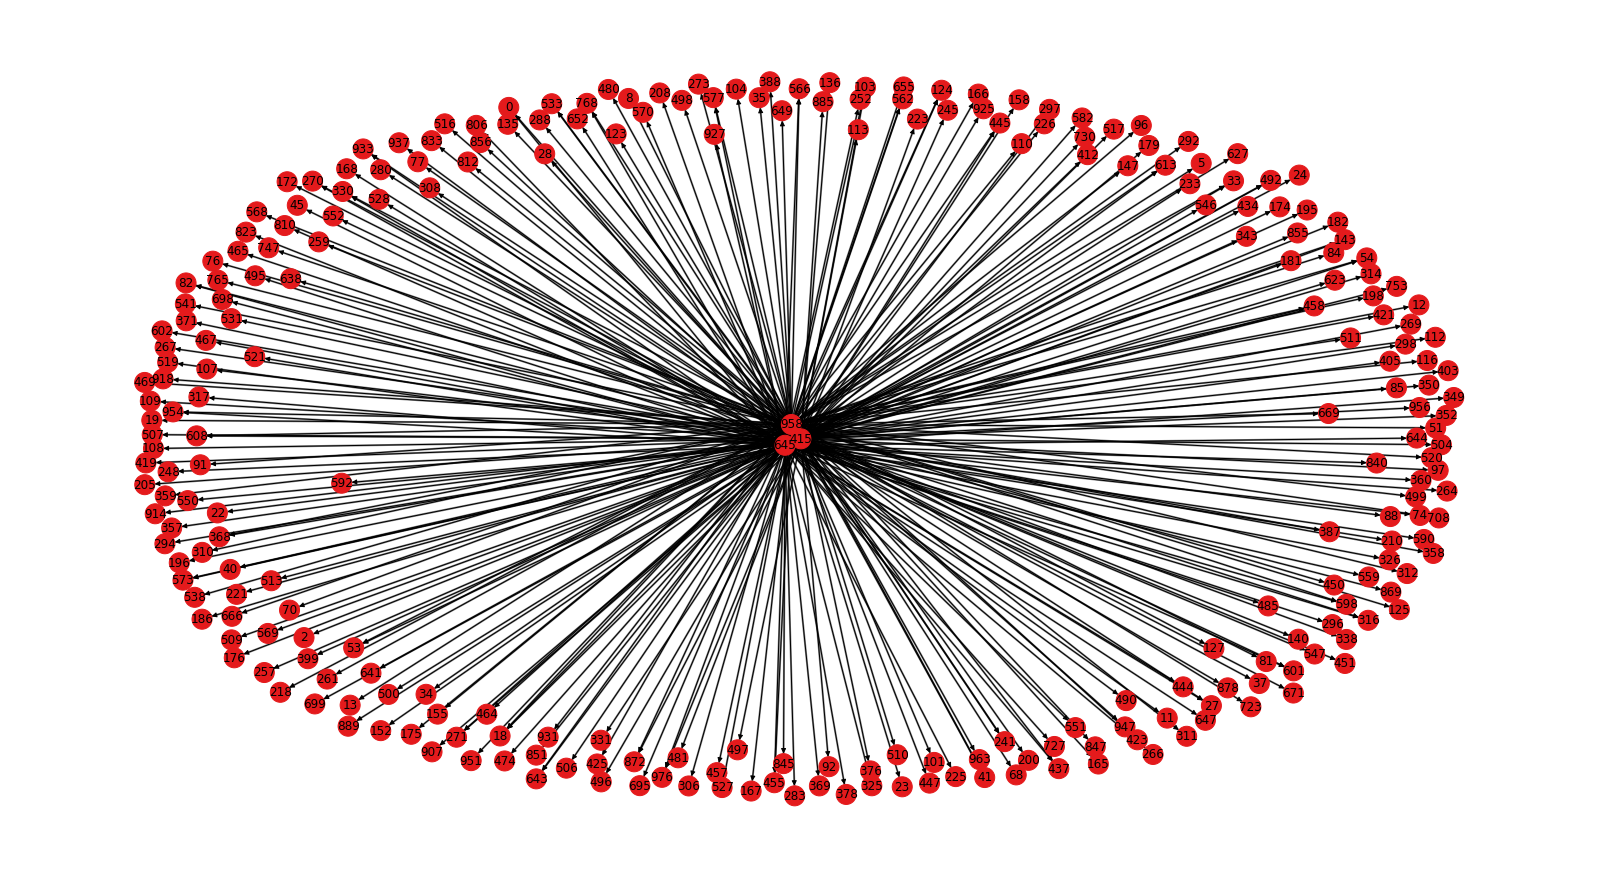

In [115]:
# umax=np.argmax(theta['u'],1)#max of each u

# plt.figure(figsize=(14,10))
nodelist = nodes
N = len(list(nodes))
K = 42
# for k in range(K+1):
# for k in [0, 1]:
#     nodelist.extend([i for i in range(N) if umax[i]==k])

pos = nx.spring_layout(G3)      
fig = plt.figure(figsize=(22,12))
kk = G3
nx.draw(kk,pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1, node_size=400) 
nx.draw_networkx_edges(G3, pos, edgelist=edges, arrows=False, width = 2,alpha=0.25) 
# nx.draw_networkx_edges(G3, pos, edgelist=red_edges, edge_color='r', arrows=False, width=2,alpha=0.95) 
# ax[0].set_axis_off()

plt.show()
# fig.tight_layout()
fig.savefig(net+'_graph_anomaly.png', dpi=200)

In [62]:
import tools as tl
import importlib

In [63]:
importlib.reload(tl) 

<module 'tools' from '/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/data/input/tools.py'>

In [64]:
pwd!

'/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/data/input'

In [52]:
# dir1 = '../data/output/5-fold_cv/RDall/edge_anomalies/' 
dir1 = 'RD/' 
network = dir1+net+'_injected.dat'

A, B, B_T, data_T_vals = tl.import_data(network,header=0)
nodes = A[0].nodes()
pos = nx.spring_layout(A[0]) 
N = len(nodes)
L = B.shape[0] 
print(N)

RD/email-Eu-core_injected.dat shape: (25729, 3)
Number of nodes = 986
Number of layers = 1
Number of edges and average degree in each layer:
E[0] = 25729 - <k> = 52.189
M[0] = 25729 - <k_weighted> = 52.189
Reciprocity (networkX) = 0.689
Reciprocity (intended as the proportion of bi-directional edges over the unordered pairs) = 0.526
Reciprocity (considering the weights of the edges) = 0.689
986


In [208]:
# outfile = 'RD/adjacency_highschool_T1_1_injected.dat'
# # nx.write_weighted_edgelist(G, '../data/input/'+outnet+'.dat')
# nx.write_weighted_edgelist(G2, 'RD/adjacency_highschool_T1_1_injected.dat') 
# print(outfile)

In [65]:
dir1 = '../output/5-fold_cv/RDall/edge_anomalies/' 
network =  'RD/'+net+ '.dat' 
print(network)
A, B, B_T, data_T_vals = tl.import_data(network,header=0)
nodes = A[0].nodes()
pos = nx.spring_layout(A[0]) 
N = len(nodes)
L = B.shape[0] 
print(N)

RD/email-Eu-core.dat
RD/email-Eu-core.dat shape: (23467, 3)
Number of nodes = 708
Number of layers = 1
Number of edges and average degree in each layer:
E[0] = 23467 - <k> = 66.291
M[0] = 23467 - <k_weighted> = 66.291
Reciprocity (networkX) = 0.748
Reciprocity (intended as the proportion of bi-directional edges over the unordered pairs) = 0.597
Reciprocity (considering the weights of the edges) = 0.748
708


In [67]:
pwd

'/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/data/input'

In [68]:
dir0 = '../output/5-fold_cv/'
dir1 = dir0 + 'RDall/edge_anomalies/'

outnet_gt = net+'.dat'  
outnet_i  = net+'_injected.dat' 

theta_gt = np.load(dir1+'theta_inf_False_'+outnet_gt+'_0K8.npz',allow_pickle=True)
theta_i  = np.load(dir1+'theta_inf_True_' +outnet_i+'_0K8.npz',allow_pickle=True)


# outnet_o = 'adjacency_highschool_T1_1_injected.dat' 
# theta_i = np.load(dir0+'theta_inf_True_'+outnet_i+'_0K2.npz',allow_pickle=True)  
u, cs_u = cvfun.cosine_similarity(theta_i['u'],theta_gt['u']) 
v, cs_v = cvfun.cosine_similarity(theta_i['v'],theta_gt['v'])
print('cs_u, cs_v:', cs_u, cs_v)


u1 = cvfun.normalize_nonzero_membership(u)
v1 = cvfun.normalize_nonzero_membership(v)
    
f1_u = cvfun.evalu(u1,theta_i['u'], 'f1')
f1_v = cvfun.evalu(v1,theta_i['v'], 'f1')
print('f1_u,f1_v:', f1_u,f1_v, theta_i['u'].shape, theta_i['v'].shape)

cs_u, cs_v: 0.5570773194989441 0.5510754402135796
f1_u,f1_v: 0.029 0.0433 (708, 8) (708, 8)


In [66]:
import tools as tl
import cv_functions as cvfun
import importlib

# BPTF

In [67]:
dir1 = '../output/5-fold_cv/RDall/bptf/'
# dir1 = dir0 + 'RDall/edge_anomalies/'
dir_o = '../data/input/RD/'
outnet_i = 'email-Eu-core' 
K = 42
theta_bptf = np.load(dir1+'theta_K'+str(K)+'_'+outnet_i+'.npz',allow_pickle=True)


# MT

In [71]:
dir1 = '../output/5-fold_cv/RDall/mt/'
# dir1 = dir0 + 'RDall/edge_anomalies/'
dir_o = '../data/input/RD/'
outnet_i = 'email-Eu-core' 

theta_mt = np.load(dir1+'theta_K'+str(K)+'_'+outnet_i+'.npz',allow_pickle=True)  

# Anomaly

In [111]:
dir1 = '../output/5-fold_cv/RDall/edge_anomalies/'
# dir1 = dir0 + 'RDall/edge_anomalies/'
dir_o = 'RD/'
outnet_i = 'email-Eu-core' 

theta_an = np.load(dir1+'theta_inf_True_email-Eu-core_injected.dat_0K42.npz',allow_pickle=True)
# theta_an = np.load(dir1+'theta_inf_False_email-Eu-core.dat_0K42.npz',allow_pickle=True)
# theta_an = np.load(dir1+'theta_inf_False_email-Eu-core_injected.dat_0K42.npz',allow_pickle=True)
# theta_an = np.load(dir1+'theta_inf_True_email-Eu-core.dat_0K42.npz',allow_pickle=True)
theta_an['u'].shape


(708, 42)

# CRep

In [68]:
dir1 = '../output/5-fold_cv/RDall/edge_anomalies/'
# dir1 = dir0 + 'RDall/edge_anomalies/'
dir_o = 'RD/'
outnet_i = 'email-Eu-core' 
theta_crep = np.load('../output/5-fold_cv/RD/edge_anomalies/theta_email-Eu-core_K42_CRep0.npz',allow_pickle=True)
# theta_crep = np.load('../output/5-fold_cv/RDall/CRep0theta_CRep0K'+str(K)+'_email-Eu-core.npz',allow_pickle=True)


In [239]:
pwd

'/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/data/input'

In [158]:
# algo = 'mt'
# umax=np.argmax(theta_mt['u'],1)#max of each u
# # plt.figure(figsize=(14,10))
# nodelist = []
# for k in range(K+1):
#     nodelist.extend([i for i in range(N) if umax[i]==k])

# # pos = nx.spring_layout(A[0], seed = 10)
# # fig = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
# fig = plt.figure(figsize=(20,8))
# nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1, node_size=200) 
# nx.draw_networkx_edges(A[0], pos, edgelist=A[0].edges(), arrows=False, width = 2,alpha=0.25) 

# fig.savefig('../../code_RD/'+outnet_i+algo+'.png', dpi=300)
# # fig.savefig('../../code/pok_month6_bptf.png', dpi=300)

In [157]:
# algo = 'bptf'
# umax=np.argmax(theta_bptf['u'],1)#max of each u
# # plt.figure(figsize=(14,10))
# nodelist = []
# for k in range(K+1):
#     nodelist.extend([i for i in range(N) if umax[i]==k])


# fig = plt.figure(figsize=(20,8))


# nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1, node_size=200) 
# # nx.draw_networkx_edges(A[0], pos, edgelist=A[0].edges(), arrows=False, width = 2,alpha=0.25) 

# # fig.savefig('../../code/'+outnet_i+algo+'.png', dpi=300)
# fig.savefig('../../code_RD/'+outnet_i+algo+'.png', dpi=300)

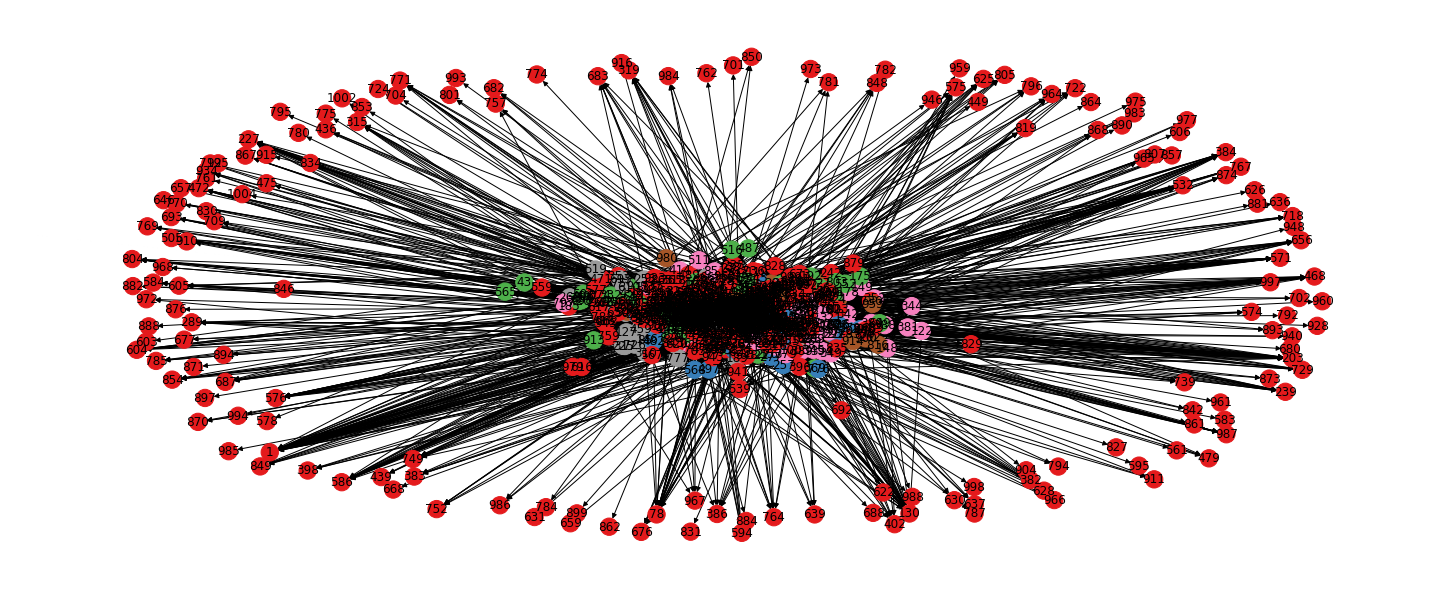

In [154]:
algo = 'anomaly'
umax=np.argmax(theta_an['u'],1)#max of each u
# plt.figure(figsize=(14,10))
nodelist = []
for k in range(K+1):
    nodelist.extend([i for i in range(N) if umax[i]==k])
    
fig = plt.figure(figsize=(20,8))

nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1)

plt.show()
fig.savefig('../../code_RD/'+outnet_i+algo+'.png', dpi=300)

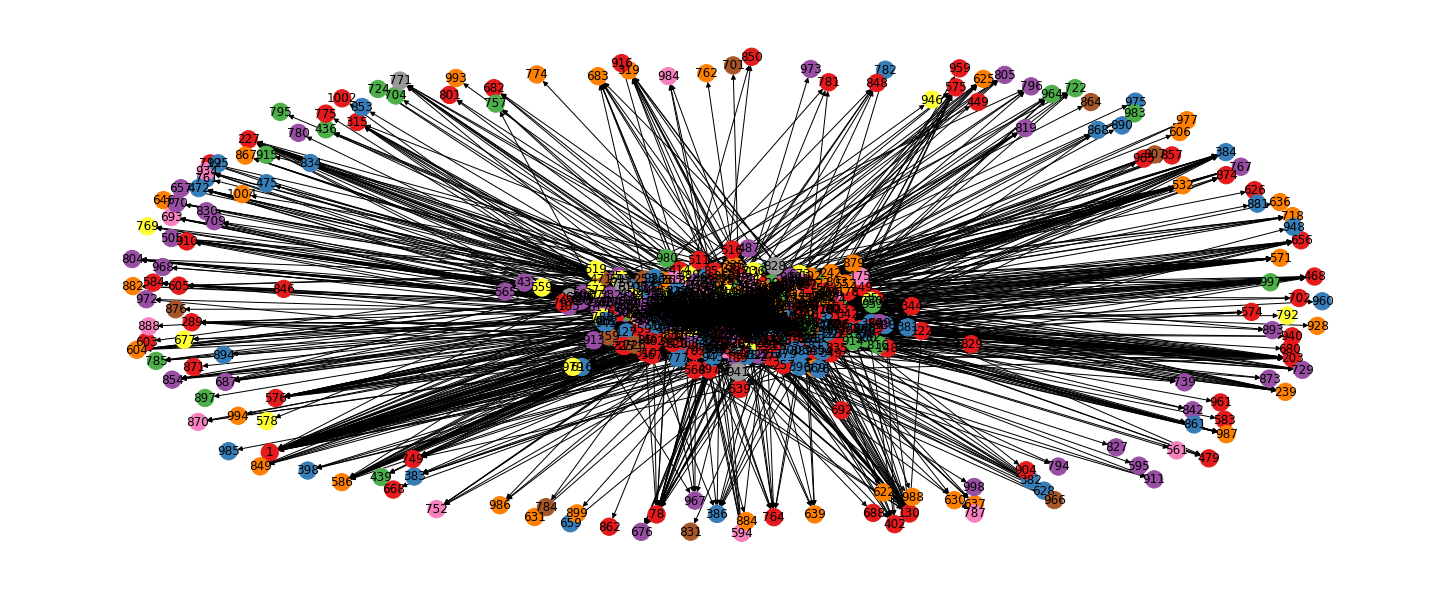

In [159]:
algo = 'anomaly'
umax=np.argmax(theta_gt,1)#max of each u
# plt.figure(figsize=(14,10))
nodelist = []
for k in range(K+1):
    nodelist.extend([i for i in range(N) if umax[i]==k])
    
fig = plt.figure(figsize=(20,8))

nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1)

plt.show()
fig.savefig('../../code_RD/'+outnet_i+algo+'_gt.png', dpi=300)

<IPython.core.display.Javascript object>


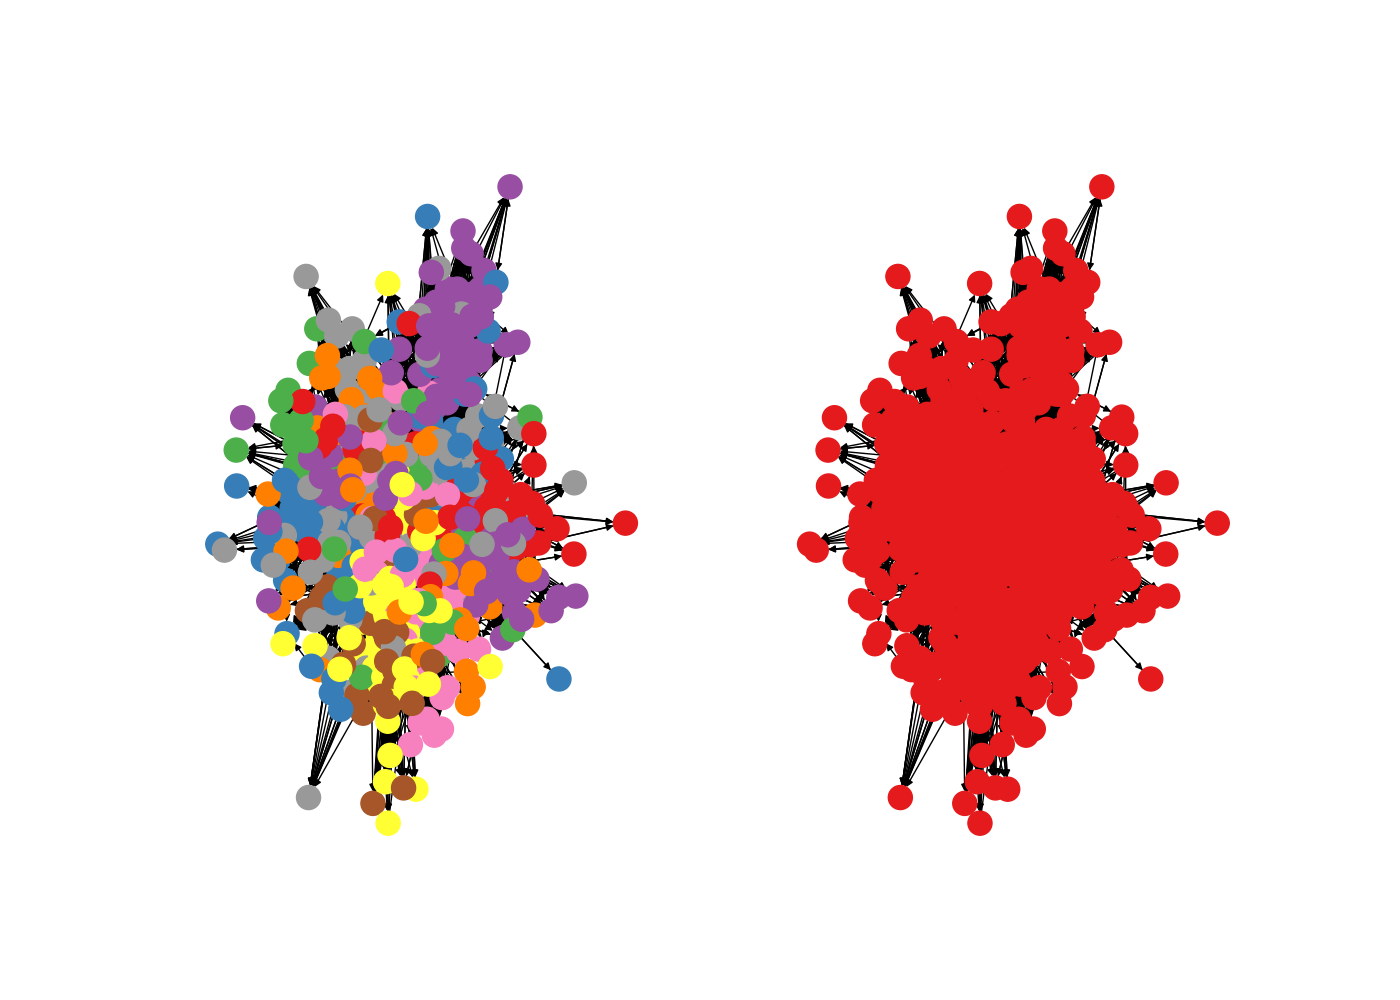

In [119]:
umax=np.argmax(theta_mt['u'],1)#max of each u
# plt.figure(figsize=(14,10))
nodelist = []
for k in range(K+1):
    nodelist.extend([i for i in range(N) if umax[i]==k])
    
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,10))
ax = axes.flatten()

nx.draw(A[0],pos=pos, with_labels=False,node_color = umax,cmap = plt.cm.Set1,ax=ax[0])
ax[0].set_axis_off()

umax=np.argmax(theta_an['u'],1)#max of each u

nx.draw(A[0],pos=pos, with_labels=False,node_color = umax,cmap = plt.cm.Set1,ax=ax[1])

plt.show()

<IPython.core.display.Javascript object>


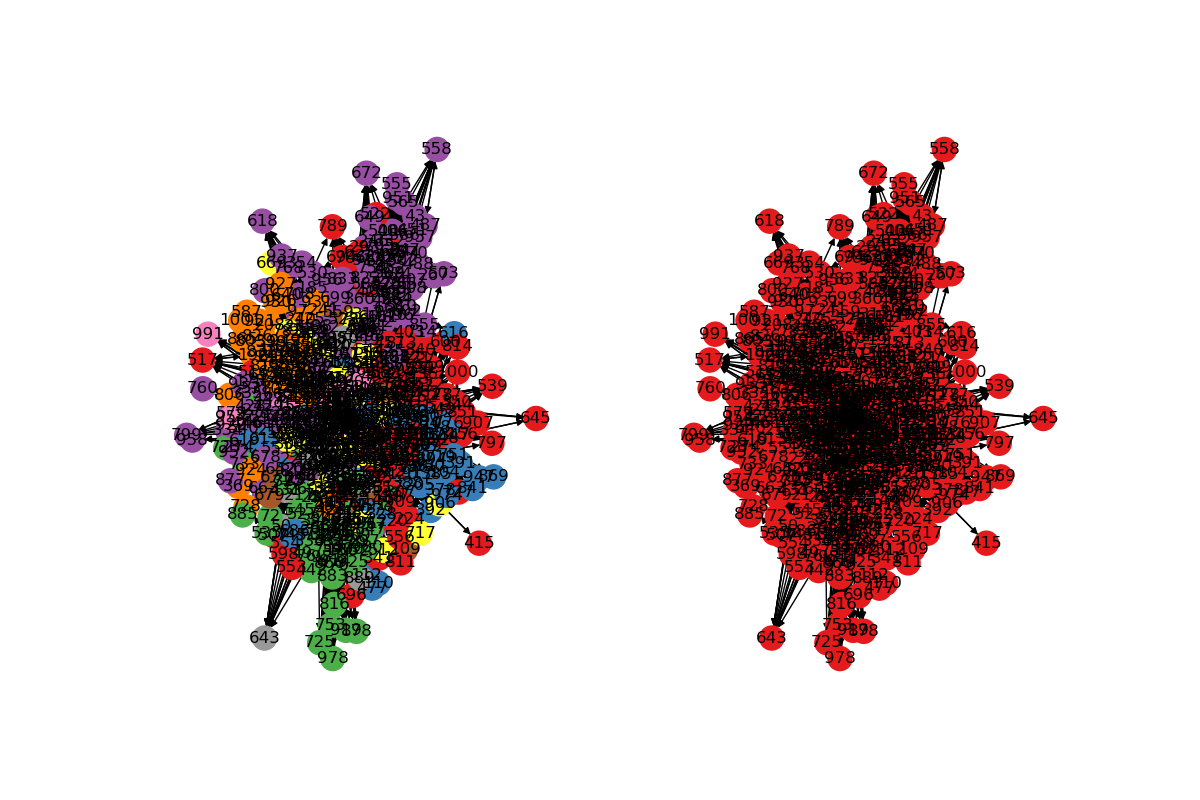

In [118]:
umax=np.argmax(theta_gt,1)#max of each u
# plt.figure(figsize=(14,10))
nodelist = []
for k in range(K+1):
    nodelist.extend([i for i in range(N) if umax[i]==k])
    
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,8))
ax = axes.flatten()

nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1,ax=ax[0])
ax[0].set_axis_off()

umax=np.argmax(theta_an['u'],1)#max of each u

nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1,ax=ax[1])

plt.show()

In [112]:
u, cs_u = cvfun.cosine_similarity(theta_crep['u'], theta_bptf['u']) 
v, cs_v = cvfun.cosine_similarity(theta_crep['v'], theta_bptf['v']) 
print(cs_u, cs_v)

u1 = cvfun.normalize_nonzero_membership(u)
v1 = cvfun.normalize_nonzero_membership(v)

f1_u = cvfun.evalu(theta_crep['u'], theta_bptf['u'], 'f1')
f1_v = cvfun.evalu(theta_crep['v'], theta_bptf['v'], 'f1')
print(f1_u, f1_v)

0.4223557189128357 0.44495250213878185
0.2914 0.2885


In [113]:
u, cs_u = cvfun.cosine_similarity(theta_mt['u'], theta_crep['u']) 
v, cs_v = cvfun.cosine_similarity(theta_mt['v'], theta_crep['v']) 
print(cs_u, cs_v)

u1 = cvfun.normalize_nonzero_membership(u)
v1 = cvfun.normalize_nonzero_membership(v)

f1_u = cvfun.evalu(theta_mt['u'], theta_crep['u'], 'f1')
f1_v = cvfun.evalu(theta_mt['v'], theta_crep['v'], 'f1')
print(f1_u, f1_v)

0.6403688409539136 0.6850740945302809
0.6417 0.6237


In [114]:
u, cs_u = cvfun.cosine_similarity(theta_crep['u'], theta_an['u']) 
v, cs_v = cvfun.cosine_similarity(theta_crep['v'], theta_an['v']) 
print(cs_u, cs_v)

u1 = cvfun.normalize_nonzero_membership(u)
v1 = cvfun.normalize_nonzero_membership(v)

f1_u = cvfun.evalu(theta_crep['u'], theta_an['u'], 'f1')
f1_v = cvfun.evalu(theta_crep['v'], theta_an['v'], 'f1')
print(f1_u, f1_v)

0.0 0.0
0.0 0.0


In [115]:
u, cs_u = cvfun.cosine_similarity(theta_mt['u'], theta_an['u']) 
v, cs_v = cvfun.cosine_similarity(theta_mt['v'], theta_an['v']) 
print(cs_u, cs_v)

u1 = cvfun.normalize_nonzero_membership(u)
v1 = cvfun.normalize_nonzero_membership(v)

f1_u = cvfun.evalu(theta_mt['u'], theta_an['u'], 'f1')
f1_v = cvfun.evalu(theta_mt['v'], theta_an['v'], 'f1')
print(f1_u, f1_v)

0.0 0.0
0.0 0.0


In [116]:
# u, cs_u = cvfun.cosine_similarity(theta_crep['u'], theta_an['u']) 
# v, cs_v = cvfun.cosine_similarity(theta_crep['v'], theta_an['v']) 
print(cs_u, cs_v)

# u1 = cvfun.normalize_nonzero_membership(u)
# v1 = cvfun.normalize_nonzero_membership(v)

# f1_u = cvfun.evalu(theta_bptf['u'], theta_crep['u'], 'f1')
# f1_v = cvfun.evalu(theta_bptf['v'], theta_crep['v'], 'f1')
# print(f1_u, f1_v)

0.0 0.0


In [117]:
N = len(list(G1.nodes()))
K = 42

gt_com = list(G1.nodes('com')) 

theta_gt = np.zeros((N,K))
theta_gt.shape
for idx, nod in enumerate(gt_com):
    theta_gt[idx,nod[1]] = 1

In [103]:
u, cs_u = cvfun.cosine_similarity(theta_an['u'], theta_gt) 
u1 = cvfun.normalize_nonzero_membership(u)
f1_u = cvfun.evalu(theta_an['u'], theta_gt, 'f1')
print(cs_u, f1_u)

0.1601281538050871 0.1197


In [163]:
# np.argmax(theta_gt,1)

In [162]:
# for idx in range(len(G1.nodes())):
#     print(np.argmax(theta_an['u'][idx]),np.argmax(theta_gt[idx]))